<a href="https://colab.research.google.com/github/ForceOfAlgo/House_Prices_Advanced_Regression_Techniques/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>


**House Prices - Advanced Regression Techniques**


**Start this project in June 21st**

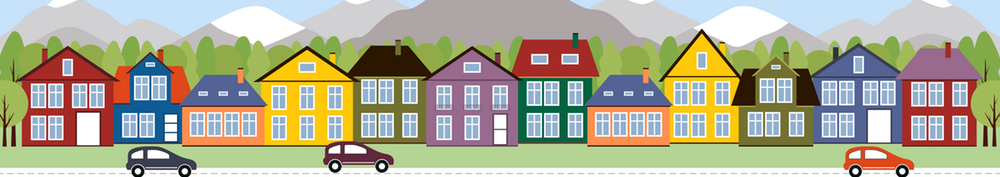

## Problem Statement

Context:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Objective:

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.


Data fields

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## Importing necessary libraries

**Let's start by importing libraries we need.**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer


# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# To help with model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

## Data Overview

In [3]:
# number of rows and columns for training data
data_train.shape

(1460, 81)

* There are 1460 observations and 81 columns in train data.  

In [4]:
# number of rows and columns for testing data
data_test.shape

(1459, 80)

* There are 1459 observations and 80  columns in train data.

In [5]:
# copy train data
df_train = data_train.copy()

In [6]:
# copy test data
df_test = data_test.copy()

In [7]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       0.000        TA        TA     CBlock       TA       TA           No   
1     108.000        TA        TA     CBlock       TA       TA           No   
2       0.000        TA        TA      PConc       Gd       TA           No   
3      20.000        TA        TA      PConc       TA       TA           No   
4       0.000        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec     468.000          LwQ     144.000    270.000      882.000   
1          ALQ     923.000          Unf       0.000    406.000     1329.000   
2          GLQ     791.000          Unf       0.000    137.000      928.000   
3          GLQ     602.000          Unf       0.000    324.000      926.000   
4          ALQ     263.000          Unf       0.000   1017.000     1280.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896         0.000         0.000         1         0             2   
1       1329         0.000         0.000         1         1             3   
2       1629         0.000         0.000         2         1             3   
3       1604         0.000         0.000         2         1             3   
4       1280         0.000         0.000         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

**Duplicate values**

In [9]:
# Checking duplicate for train data
df_train.duplicated().sum()

0

In [10]:
# Checking duplicate for test data
df_test.duplicated().sum()

0

**Checking missing values**

In [11]:
# Checking missing values in train data
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

**Missing values in train dataset**

* LotFrontage: 259 missing values
* Alley: 1369 missing values
* MasVnrType: 872 missing values
* MasVnrArea: 8 missing values
* BsmtQual: 37 missing values
* BsmtCond: 37 missing values
* BsmtExposure: 38 missing values
* BsmtFinType1: 37 missing values
* BsmtFinType2: 38 missing values
* Electrical: 1 missing value
* FireplaceQu: 690 missing values
* GarageType: 81 missing values
* GarageYrBlt: 81 missing values
* GarageFinish: 81 missing values
* GarageQual: 81 missing values
* GarageCond: 81 missing values
* PoolQC: 1453 missing values
* Fence: 1179 missing values
* MiscFeature: 1406 missing values

In [12]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

**Missing values in test dataset**

* MSZoning: 4 missing values
* LotFrontage: 227 missing values
* Alley: 1352 missing values
* Utilities: 2 missing values
* Exterior1st: 1 missing value
* Exterior2nd: 1 missing value
* MasVnrType: 894 missing values
* MasVnrArea: 15 missing values
* BsmtQual: 44 missing values
* BsmtCond: 45 missing values
* BsmtExposure: 44 missing values
* BsmtFinType1: 42 missing values
* BsmtFinSF1: 1 missing value
* BsmtFinType2: 42 missing values
* BsmtFinSF2: 1 missing value
* BsmtUnfSF: 1 missing value
* TotalBsmtSF: 1 missing value
* BsmtFullBath: 2 missing values
* BsmtHalfBath: 2 missing values
* KitchenQual: 1 missing value
* Functional: 2 missing values
* FireplaceQu: 730 missing values
* GarageType: 76 missing values
* GarageYrBlt: 78 missing values
* GarageFinish: 78 missing values
* GarageCars: 1 missing value
* GarageArea: 1 missing value
* GarageQual: 78 missing values
* GarageCond: 78 missing values
* PoolQC: 1456 missing values
* Fence: 1169 missing values
* MiscFeature: 1408 missing values
* SaleType: 1 missing value

**Data types of the columns for the dataset.**

In [13]:
# Data train information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* there are Missing values  
* Data train contains of 38 numerical and 43 caregorical types.
* memory usage: 924.0+ KB  

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

* There are missing values.
* Test data contains 37 numerical types, and 43 categorical types.
* Memory usage: 912.0+ KB.


**Summary of the dataset**

In [15]:
# Data train summary
df_train.describe().T

count       mean       std       min        25%        50%  \
Id            1460.000    730.500   421.610     1.000    365.750    730.500   
MSSubClass    1460.000     56.897    42.301    20.000     20.000     50.000   
LotFrontage   1201.000     70.050    24.285    21.000     59.000     69.000   
LotArea       1460.000  10516.828  9981.265  1300.000   7553.500   9478.500   
OverallQual   1460.000      6.099     1.383     1.000      5.000      6.000   
OverallCond   1460.000      5.575     1.113     1.000      5.000      5.000   
YearBuilt     1460.000   1971.268    30.203  1872.000   1954.000   1973.000   
YearRemodAdd  1460.000   1984.866    20.645  1950.000   1967.000   1994.000   
MasVnrArea    1452.000    103.685   181.066     0.000      0.000      0.000   
BsmtFinSF1    1460.000    443.640   456.098     0.000      0.000    383.500   
BsmtFinSF2    1460.000     46.549   161.319     0.000      0.000      0.000   
BsmtUnfSF     1460.000    567.240   441.867     0.000    223.000    477.500   
TotalBsmtSF   1460.000   1057.429   438.705     0.000    795.750    991.500   
1stFlrSF      1460.000   1162.627   386.588   334.000    882.000   1087.000   
2ndFlrSF      1460.000    346.992   436.528     0.000      0.000      0.000   
LowQualFinSF  1460.000      5.845    48.623     0.000      0.000      0.000   
GrLivArea     1460.000   1515.464   525.480   334.000   1129.500   1464.000   
BsmtFullBath  1460.000      0.425     0.519     0.000      0.000      0.000   
BsmtHalfBath  1460.000      0.058     0.239     0.000      0.000      0.000   
FullBath      1460.000      1.565     0.551     0.000      1.000      2.000   
HalfBath      1460.000      0.383     0.503     0.000      0.000      0.000   
BedroomAbvGr  1460.000      2.866     0.816     0.000      2.000      3.000   
KitchenAbvGr  1460.000      1.047     0.220     0.000      1.000      1.000   
TotRmsAbvGrd  1460.000      6.518     1.625     2.000      5.000      6.000   
Fireplaces    1460.000      0.613     0.645     0.000      0.000      1.000   
GarageYrBlt   1379.000   1978.506    24.690  1900.000   1961.000   1980.000   
GarageCars    1460.000      1.767     0.747     0.000      1.000      2.000   
GarageArea    1460.000    472.980   213.805     0.000    334.500    480.000   
WoodDeckSF    1460.000     94.245   125.339     0.000      0.000      0.000   
OpenPorchSF   1460.000     46.660    66.256     0.000      0.000     25.000   
EnclosedPorch 1460.000     21.954    61.119     0.000      0.000      0.000   
3SsnPorch     1460.000      3.410    29.317     0.000      0.000      0.000   
ScreenPorch   1460.000     15.061    55.757     0.000      0.000      0.000   
PoolArea      1460.000      2.759    40.177     0.000      0.000      0.000   
MiscVal       1460.000     43.489   496.123     0.000      0.000      0.000   
MoSold        1460.000      6.322     2.704     1.000      5.000      6.000   
YrSold        1460.000   2007.816     1.328  2006.000   2007.000   2008.000   
SalePrice     1460.000 180921.196 79442.503 34900.000 129975.000 163000.000   

                     75%        max  
Id              1095.250   1460.000  
MSSubClass        70.000    190.000  
LotFrontage       80.000    313.000  
LotArea        11601.500 215245.000  
OverallQual        7.000     10.000  
OverallCond        6.000      9.000  
YearBuilt       2000.000   2010.000  
YearRemodAdd    2004.000   2010.000  
MasVnrArea       166.000   1600.000  
BsmtFinSF1       712.250   5644.000  
BsmtFinSF2         0.000   1474.000  
BsmtUnfSF        808.000   2336.000  
TotalBsmtSF     1298.250   6110.000  
1stFlrSF        1391.250   4692.000  
2ndFlrSF         728.000   2065.000  
LowQualFinSF       0.000    572.000  
GrLivArea       1776.750   5642.000  
BsmtFullBath       1.000      3.000  
BsmtHalfBath       0.000      2.000  
FullBath           2.000      3.000  
HalfBath           1.000      2.000  
BedroomAbvGr       3.000      8.000  
KitchenAbvGr       1.000      3.000  
TotRmsAbvGrd       7.00

* Variability in Features: Some features like LotArea, 1stFlrSF (First Floor square feet), and GarageArea show significant variability in their values, indicated by large ranges and standard deviations. This suggests differing house sizes and lot sizes across the dataset, which are critical for price prediction.

* Year Features: YearBuilt and YearRemodAdd (Year Remodel Added) also vary widely, impacting the house prices as newer or recently remodeled houses tend to have higher values.

* Outliers and Distribution: The maximum values for several features such as PoolArea and MiscVal (Miscellaneous value) suggest potential outliers or unique properties that could be specially treated or investigated further.

### Number of unique values in each column

In [16]:
df_train.describe(include=['object']).T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType      588      3  BrkFace   445
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

**Let's look at the unique values of all the categories**

In [17]:
cols_cat= df_train.select_dtypes(['object'])

In [18]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in MSZoning are :
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
**************************************************
Unique values in Street are :
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
**************************************************
Unique values in Alley are :
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
**************************************************
Unique values in LotShape are :
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
**************************************************
Unique values in LandContour are :
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
**************************************************
Unique values in Utilities are :
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
**************************************************
Unique values in LotConfig are :
LotConfig
I

In [19]:
#Dropping id column from train data
df_train.drop(columns=['Id'], inplace=True)

- We can drop 'Id' column as it is an ID variable and will not add value to the model.
- other variable we will not drop them after assess their actual impact on the model.


**Let's look at the unique values of all the numerical**

In [20]:
df_train.describe(include=['float','int']).T

count       mean       std       min        25%        50%  \
MSSubClass    1460.000     56.897    42.301    20.000     20.000     50.000   
LotFrontage   1201.000     70.050    24.285    21.000     59.000     69.000   
LotArea       1460.000  10516.828  9981.265  1300.000   7553.500   9478.500   
OverallQual   1460.000      6.099     1.383     1.000      5.000      6.000   
OverallCond   1460.000      5.575     1.113     1.000      5.000      5.000   
YearBuilt     1460.000   1971.268    30.203  1872.000   1954.000   1973.000   
YearRemodAdd  1460.000   1984.866    20.645  1950.000   1967.000   1994.000   
MasVnrArea    1452.000    103.685   181.066     0.000      0.000      0.000   
BsmtFinSF1    1460.000    443.640   456.098     0.000      0.000    383.500   
BsmtFinSF2    1460.000     46.549   161.319     0.000      0.000      0.000   
BsmtUnfSF     1460.000    567.240   441.867     0.000    223.000    477.500   
TotalBsmtSF   1460.000   1057.429   438.705     0.000    795.750    991.500   
1stFlrSF      1460.000   1162.627   386.588   334.000    882.000   1087.000   
2ndFlrSF      1460.000    346.992   436.528     0.000      0.000      0.000   
LowQualFinSF  1460.000      5.845    48.623     0.000      0.000      0.000   
GrLivArea     1460.000   1515.464   525.480   334.000   1129.500   1464.000   
BsmtFullBath  1460.000      0.425     0.519     0.000      0.000      0.000   
BsmtHalfBath  1460.000      0.058     0.239     0.000      0.000      0.000   
FullBath      1460.000      1.565     0.551     0.000      1.000      2.000   
HalfBath      1460.000      0.383     0.503     0.000      0.000      0.000   
BedroomAbvGr  1460.000      2.866     0.816     0.000      2.000      3.000   
KitchenAbvGr  1460.000      1.047     0.220     0.000      1.000      1.000   
TotRmsAbvGrd  1460.000      6.518     1.625     2.000      5.000      6.000   
Fireplaces    1460.000      0.613     0.645     0.000      0.000      1.000   
GarageYrBlt   1379.000   1978.506    24.690  1900.000   1961.000   1980.000   
GarageCars    1460.000      1.767     0.747     0.000      1.000      2.000   
GarageArea    1460.000    472.980   213.805     0.000    334.500    480.000   
WoodDeckSF    1460.000     94.245   125.339     0.000      0.000      0.000   
OpenPorchSF   1460.000     46.660    66.256     0.000      0.000     25.000   
EnclosedPorch 1460.000     21.954    61.119     0.000      0.000      0.000   
3SsnPorch     1460.000      3.410    29.317     0.000      0.000      0.000   
ScreenPorch   1460.000     15.061    55.757     0.000      0.000      0.000   
PoolArea      1460.000      2.759    40.177     0.000      0.000      0.000   
MiscVal       1460.000     43.489   496.123     0.000      0.000      0.000   
MoSold        1460.000      6.322     2.704     1.000      5.000      6.000   
YrSold        1460.000   2007.816     1.328  2006.000   2007.000   2008.000   
SalePrice     1460.000 180921.196 79442.503 34900.000 129975.000 163000.000   

                     75%        max  
MSSubClass        70.000    190.000  
LotFrontage       80.000    313.000  
LotArea        11601.500 215245.000  
OverallQual        7.000     10.000  
OverallCond        6.000      9.000  
YearBuilt       2000.000   2010.000  
YearRemodAdd    2004.000   2010.000  
MasVnrArea       166.000   1600.000  
BsmtFinSF1       712.250   5644.000  
BsmtFinSF2         0.000   1474.000  
BsmtUnfSF        808.000   2336.000  
TotalBsmtSF     1298.250   6110.000  
1stFlrSF        1391.250   4692.000  
2ndFlrSF         728.000   2065.000  
LowQualFinSF       0.000    572.000  
GrLivArea       1776.750   5642.000  
BsmtFullBath       1.000      3.000  
BsmtHalfBath       0.000      2.000  
FullBath           2.000      3.000  
HalfBath           1.000      2.000  
BedroomAbvGr       3.000      8.000  
KitchenAbvGr       1.000      3.000  
TotRmsAbvGrd       7.000     14.000  
Fireplaces         1.000      3.000  
GarageYrBlt     2002.000   2010.000  
GarageCars         2.000  

### EDA

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [23]:
cols_num= df_train.select_dtypes(['float','int'])

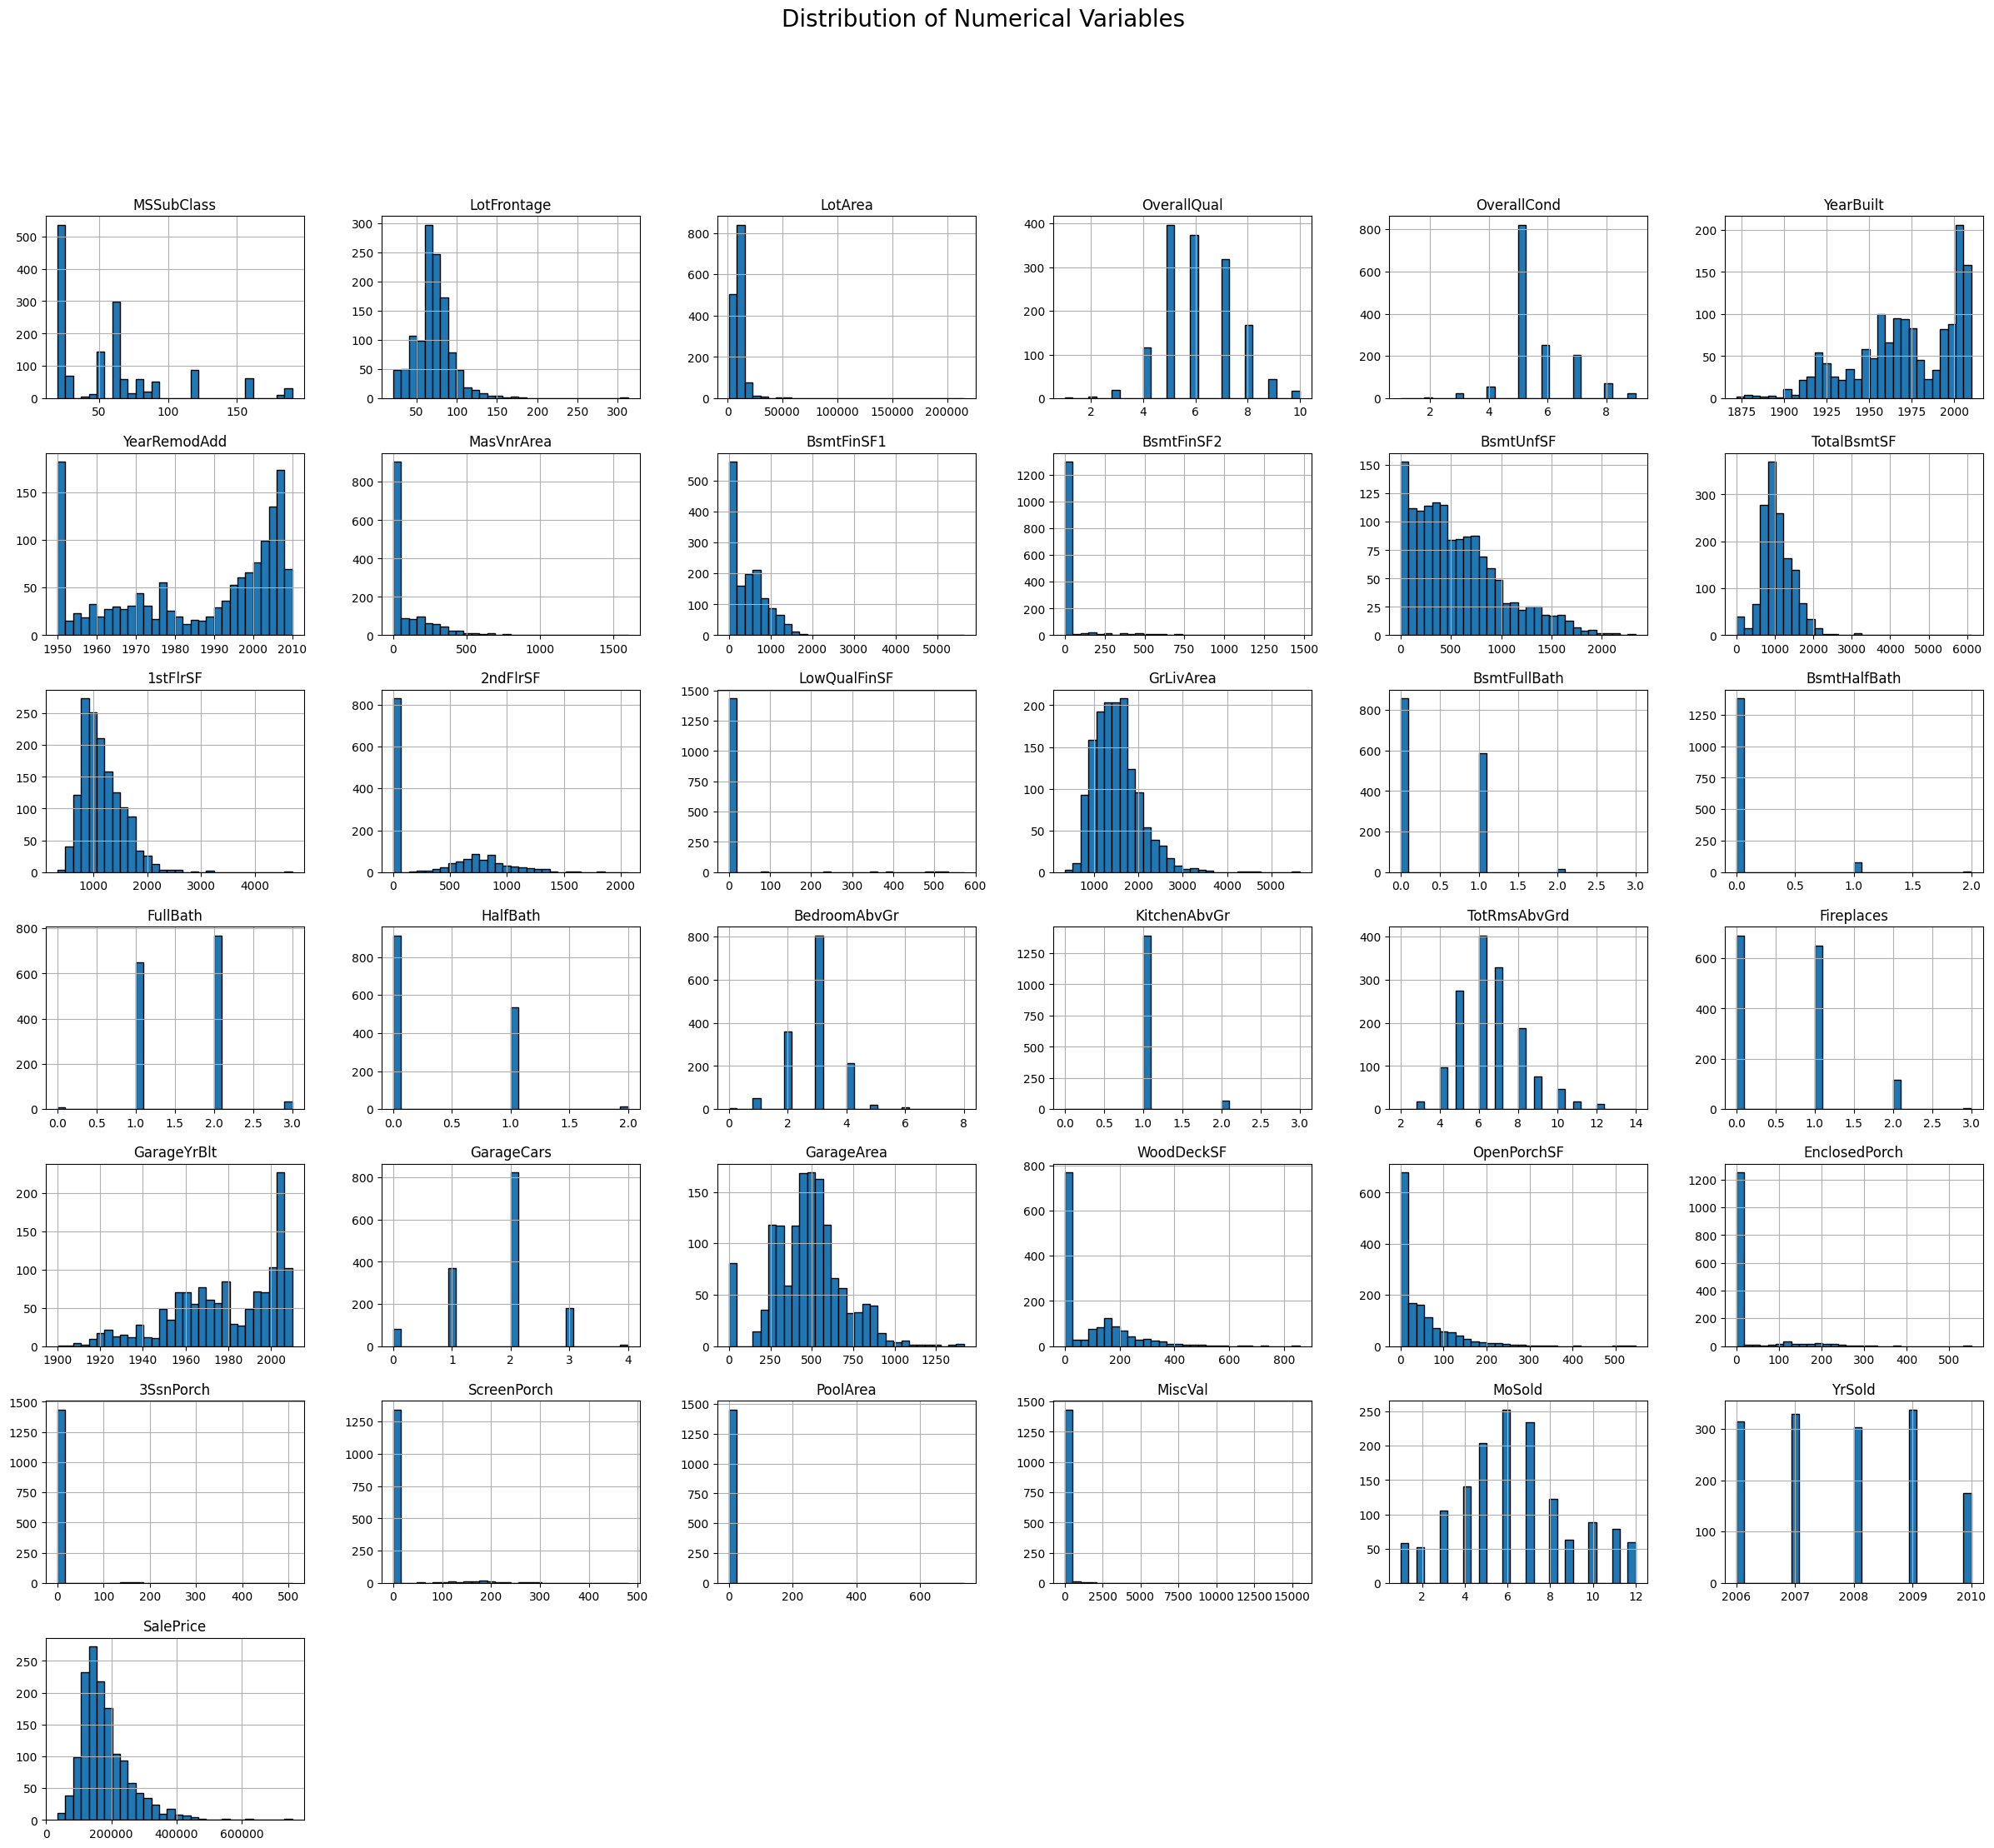

In [24]:
# Plotting histograms for each numerical variable
cols_num.hist(figsize=(30, 25), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.show()

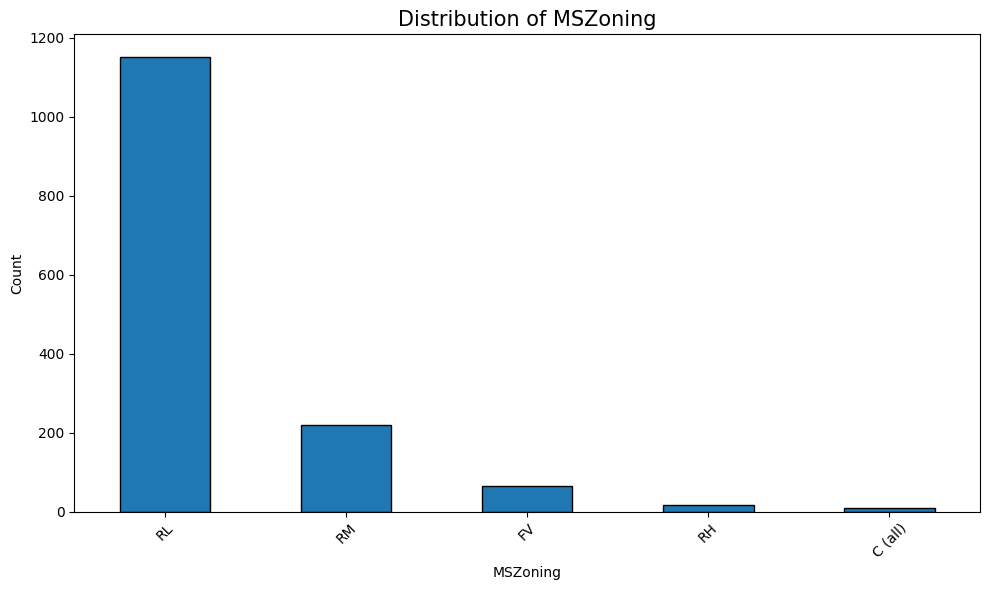

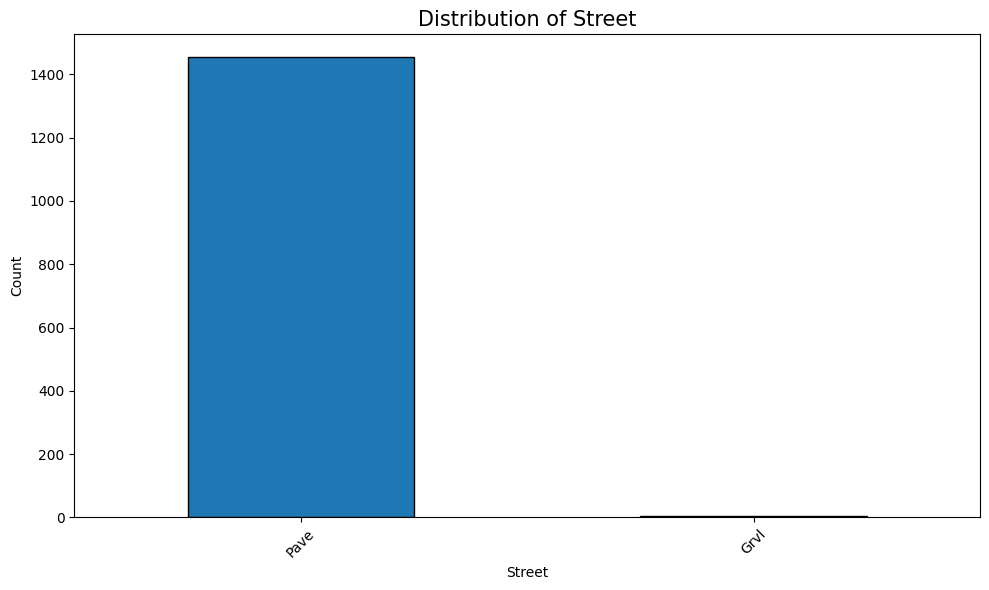

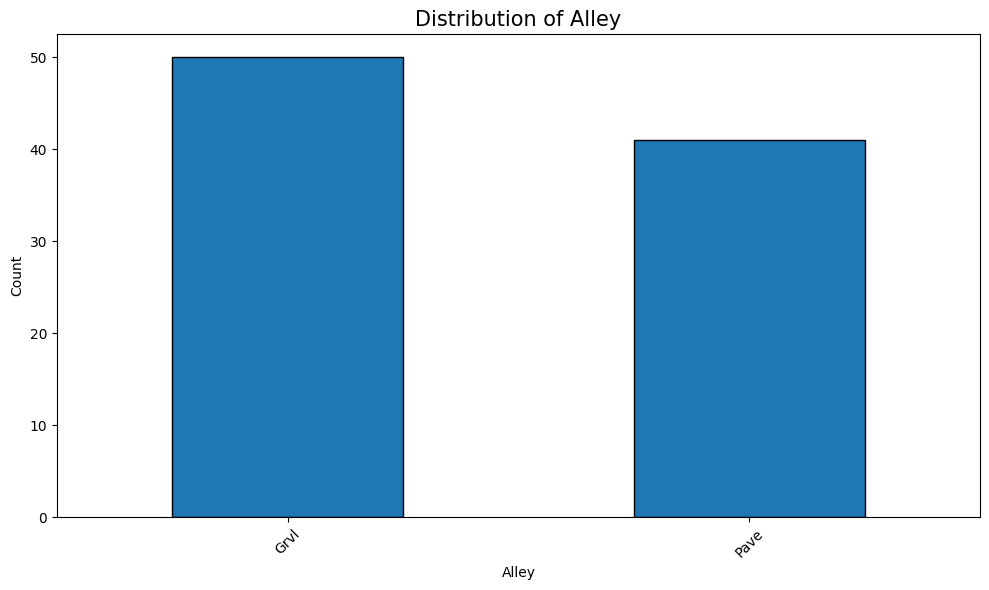

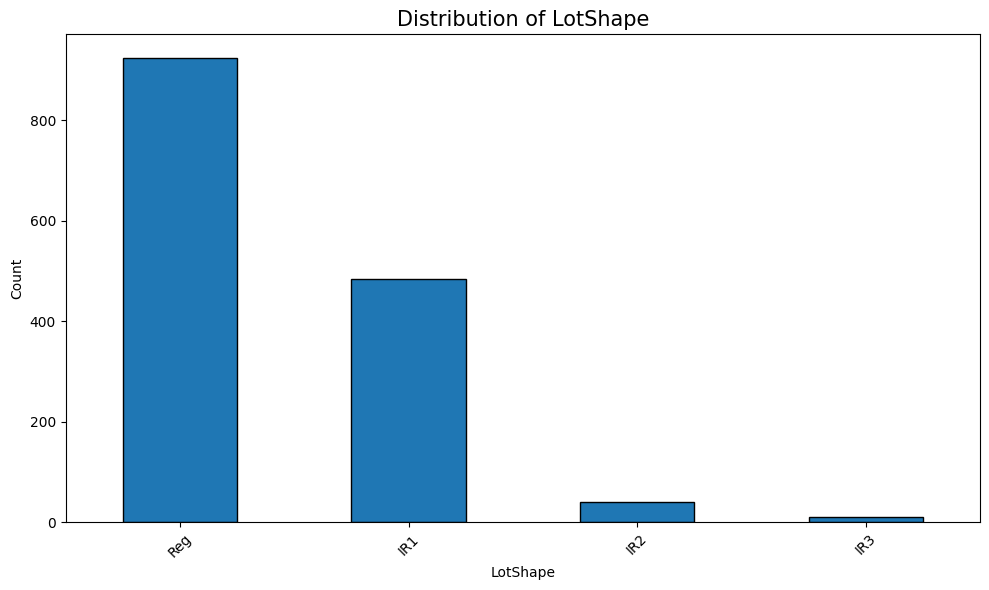

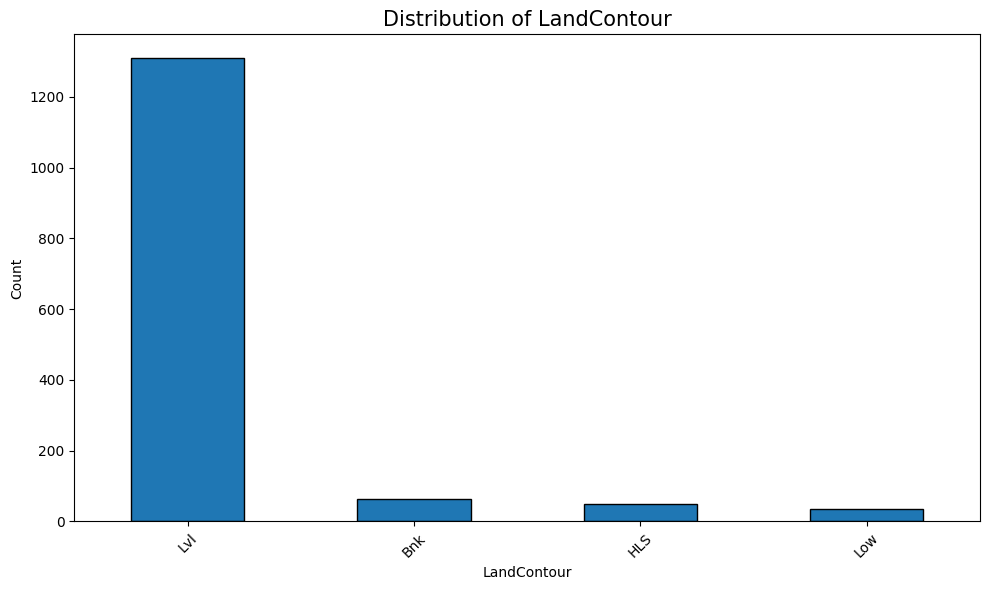

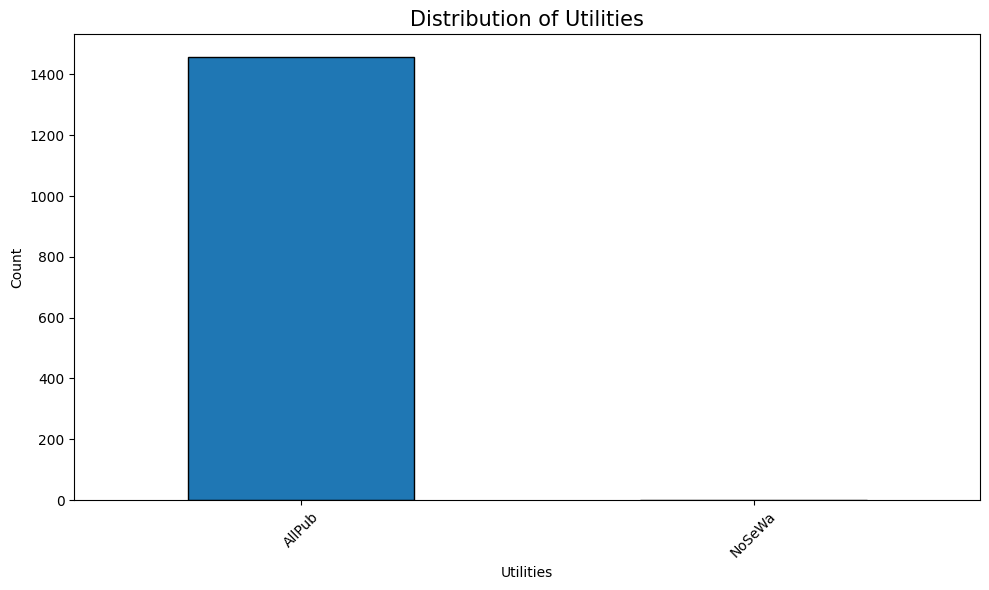

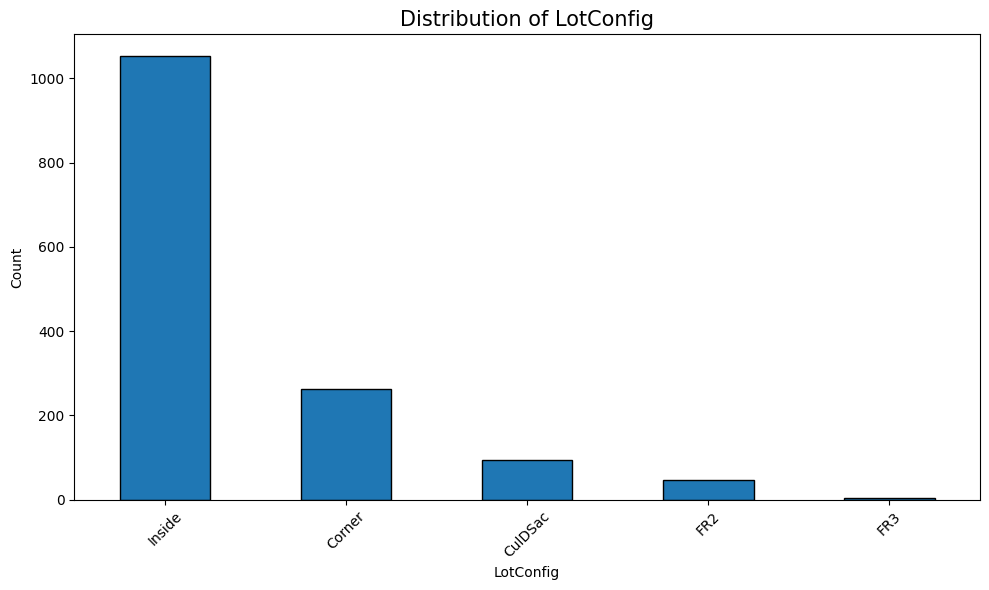

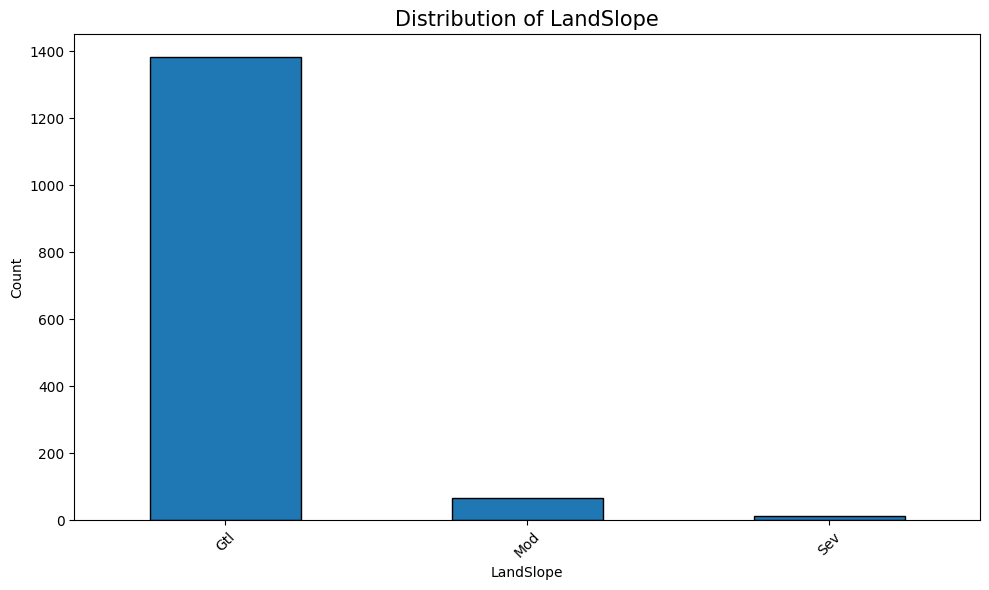

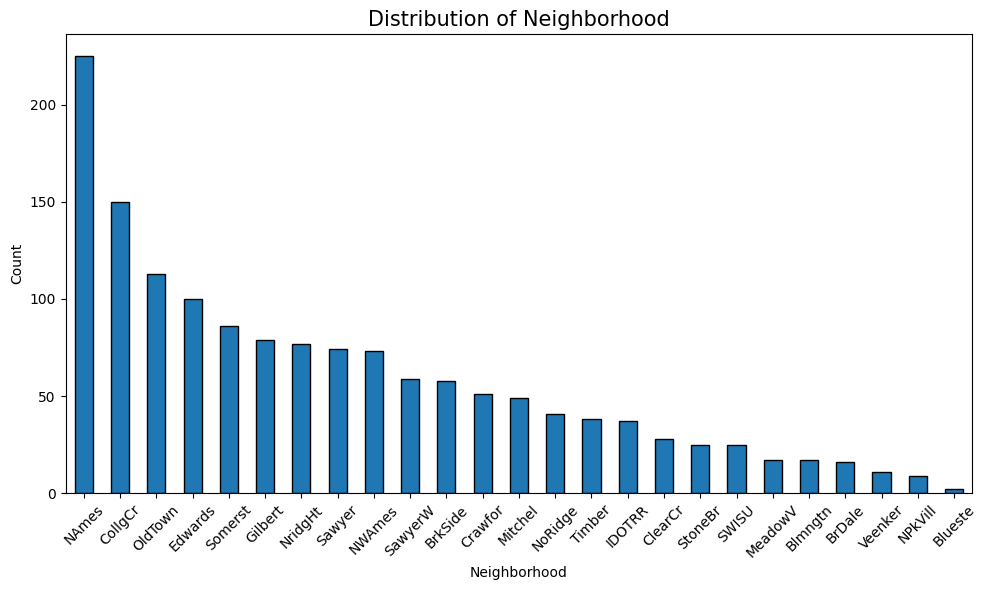

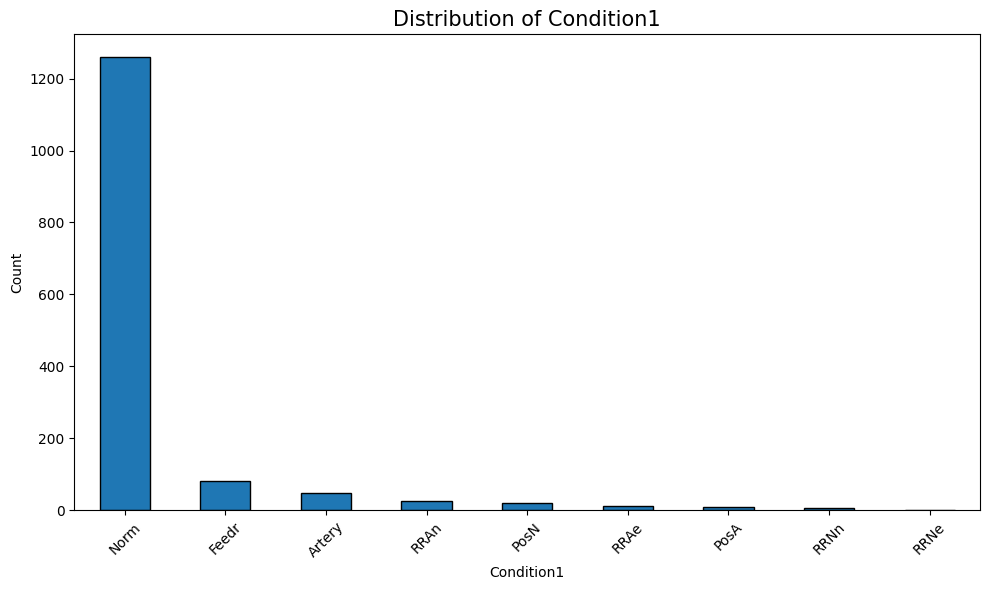

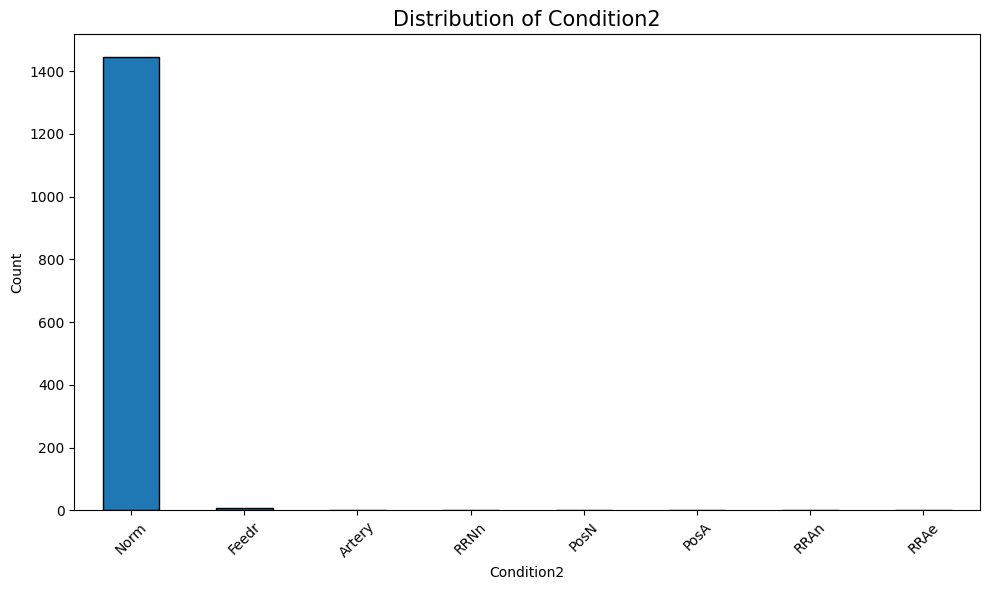

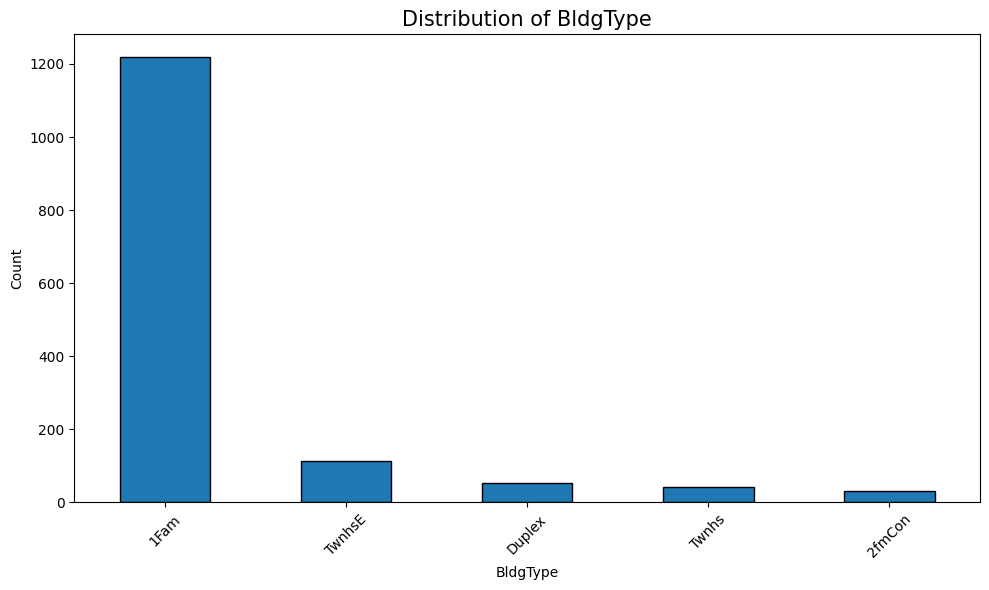

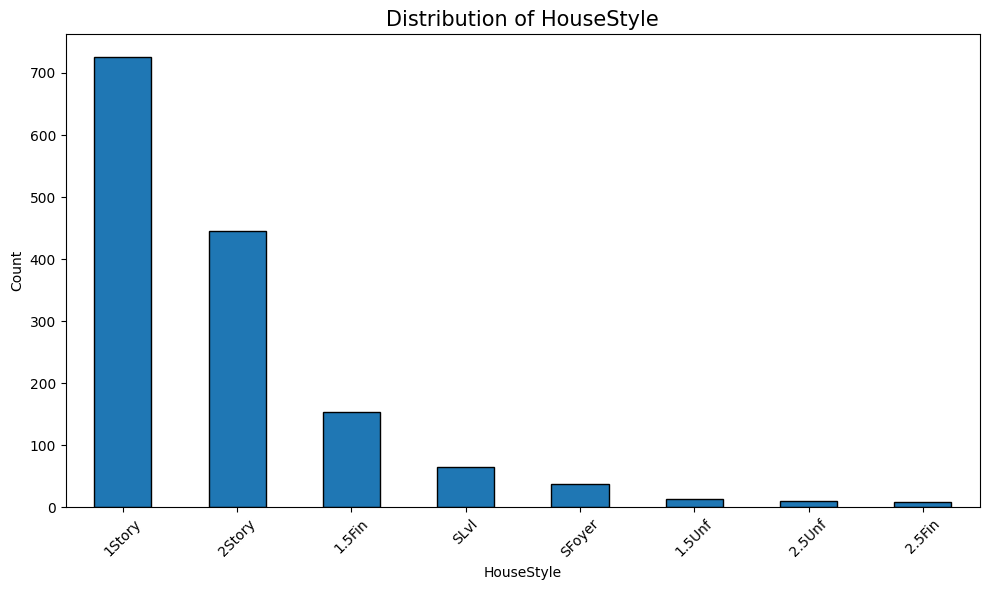

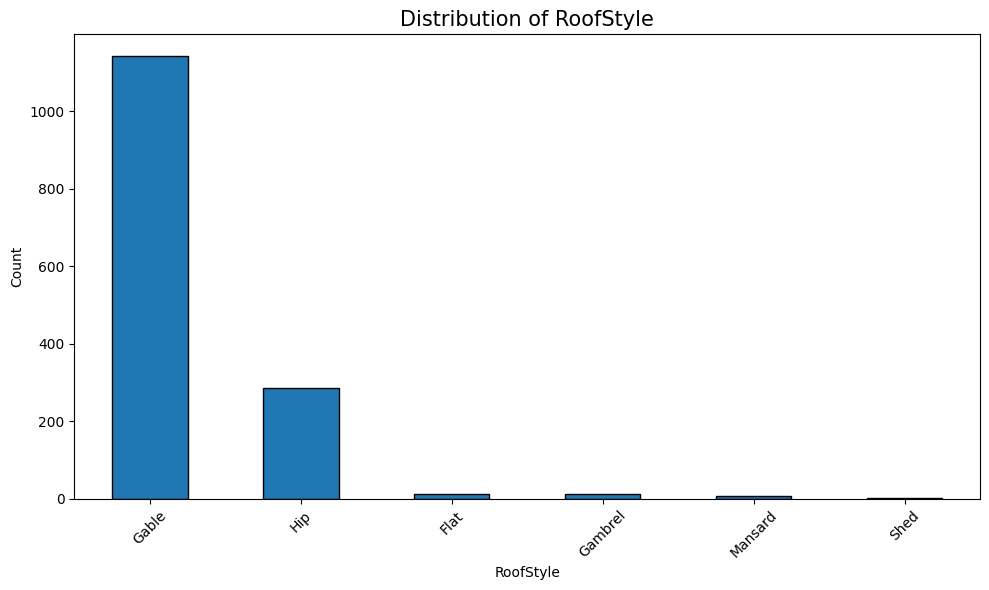

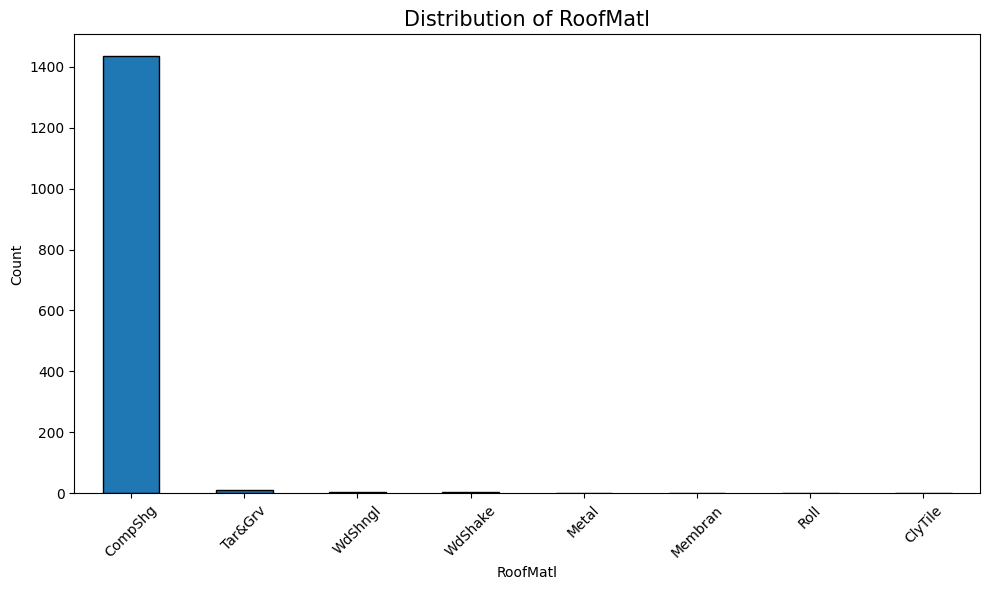

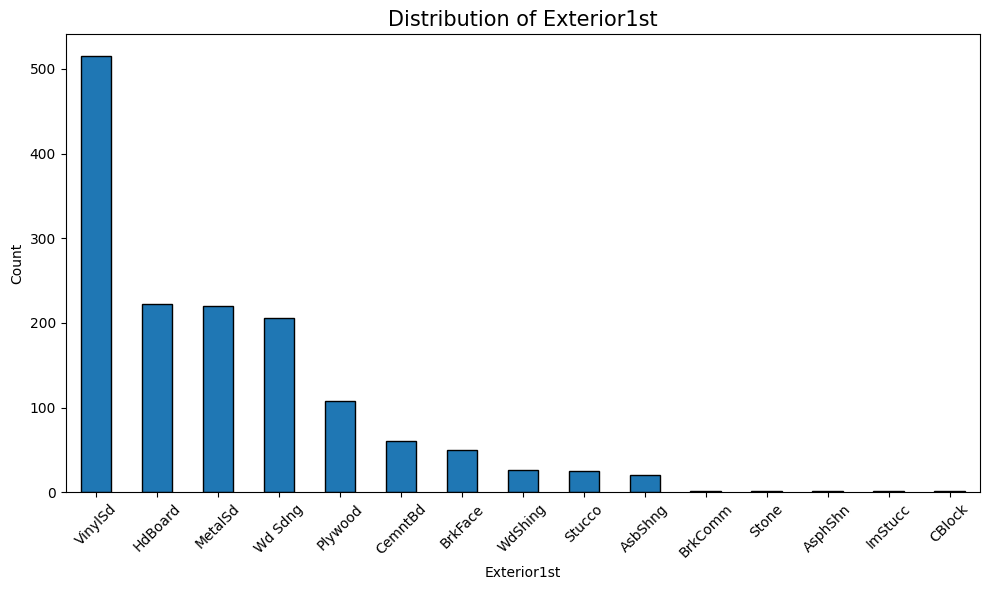

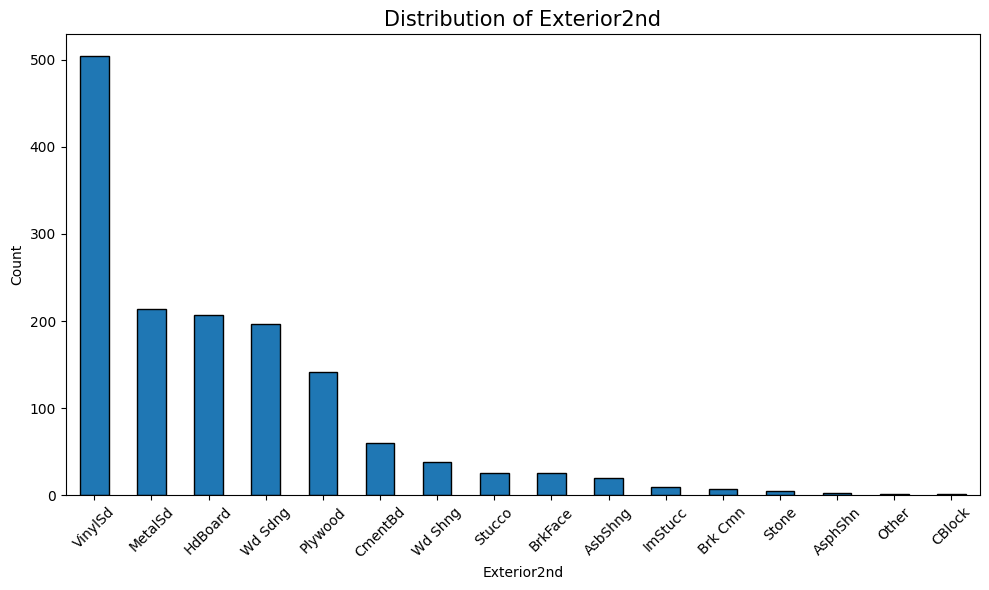

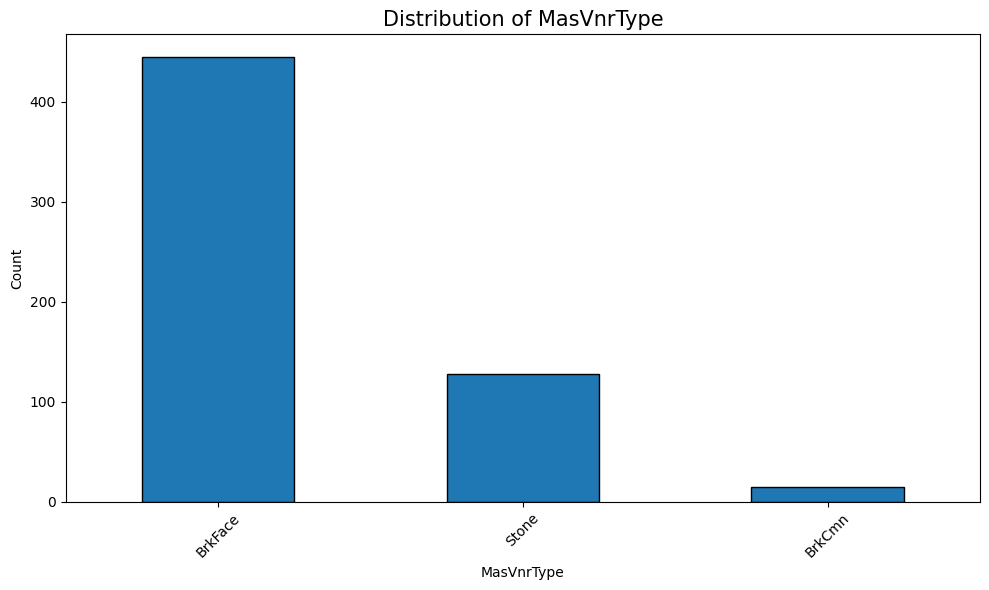

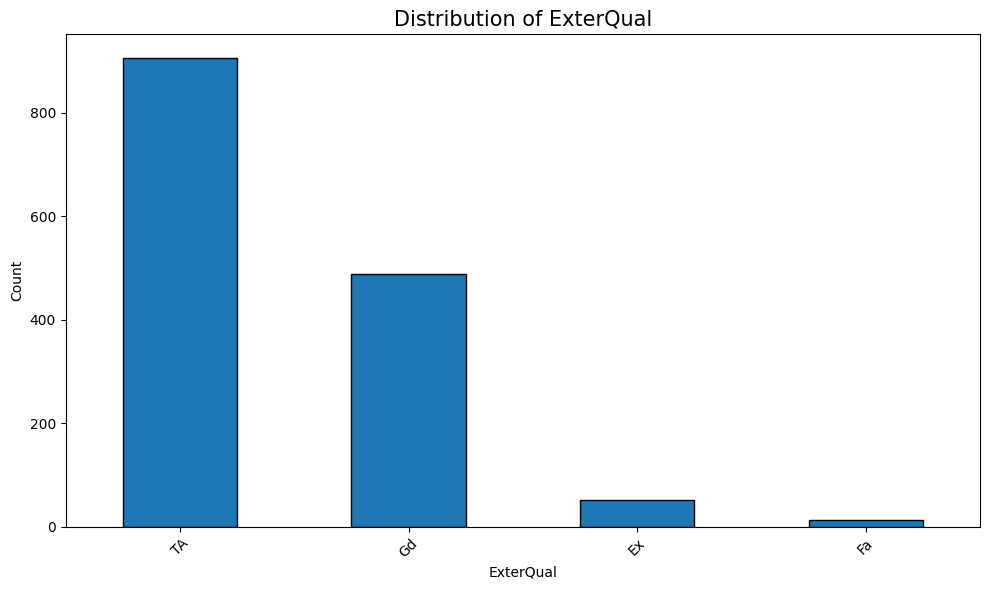

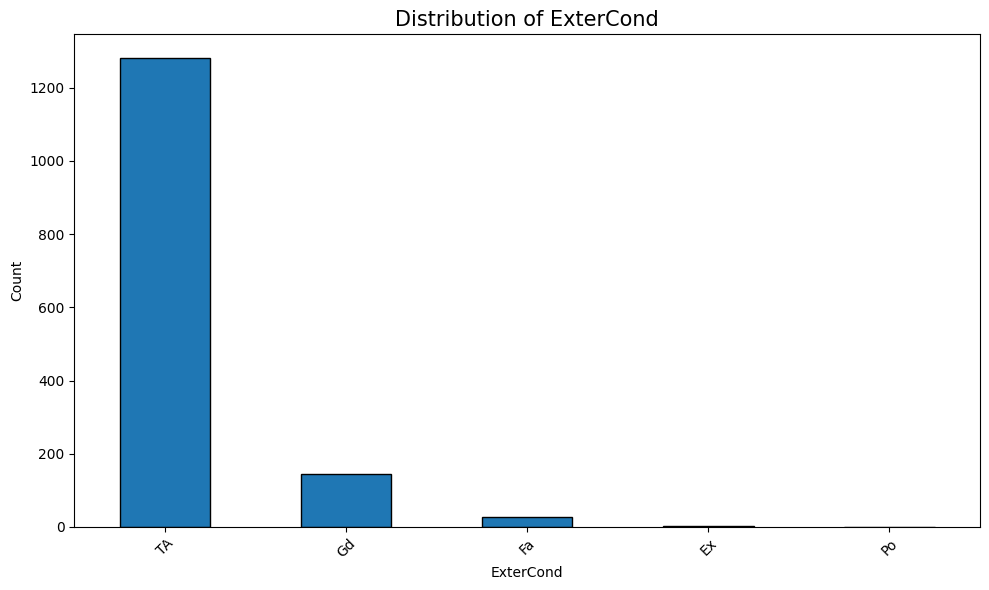

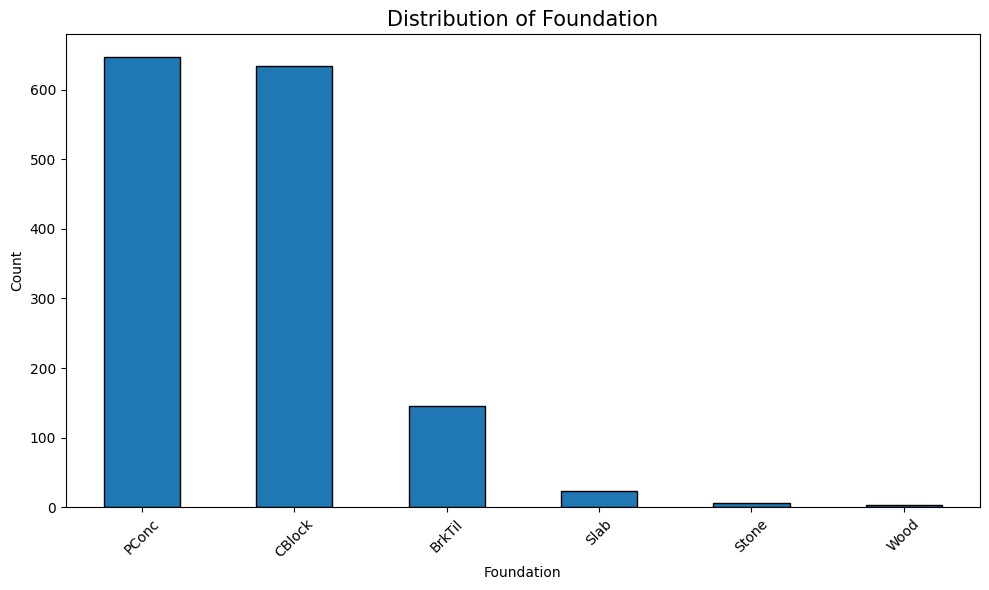

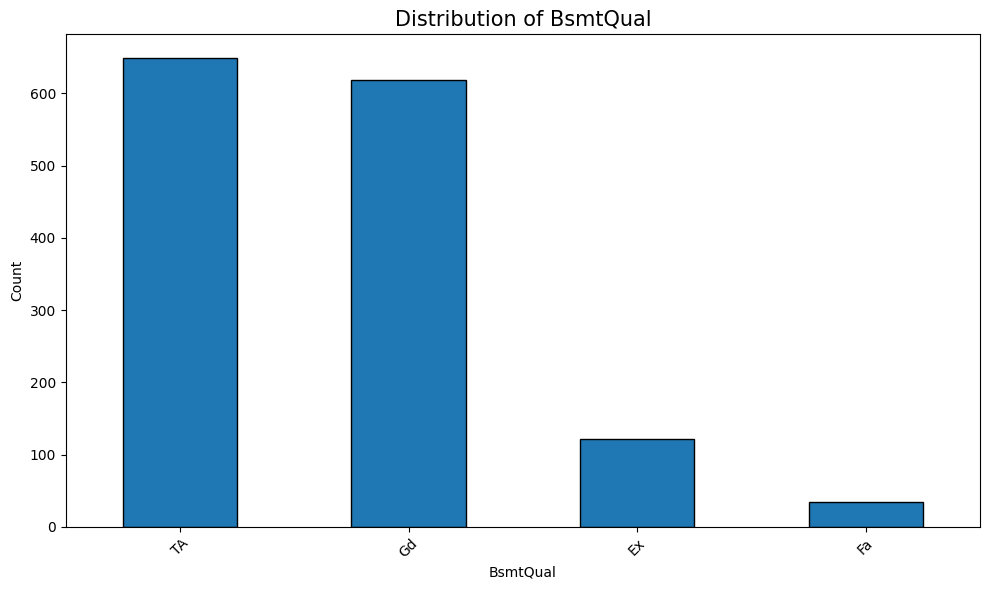

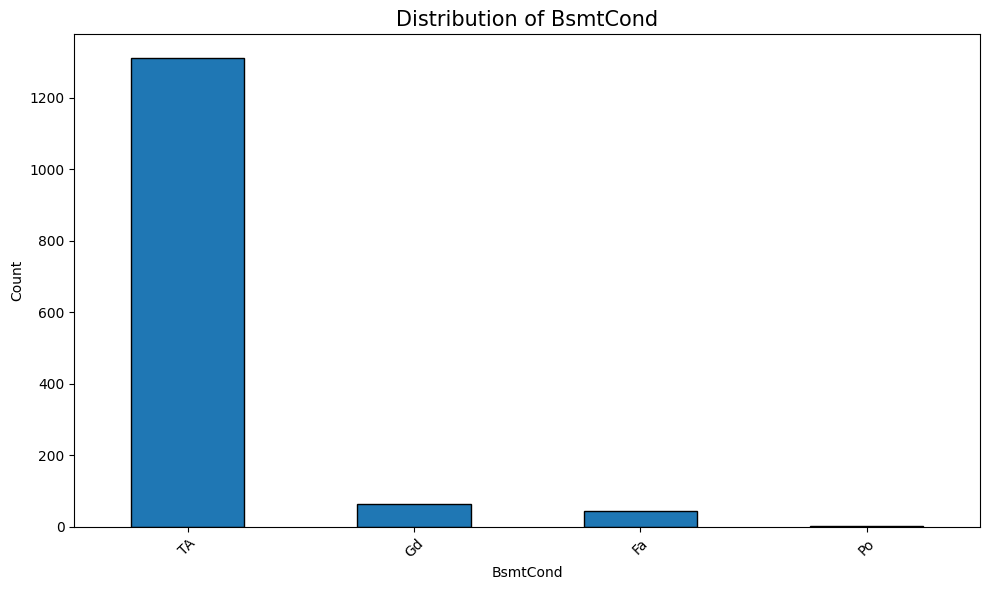

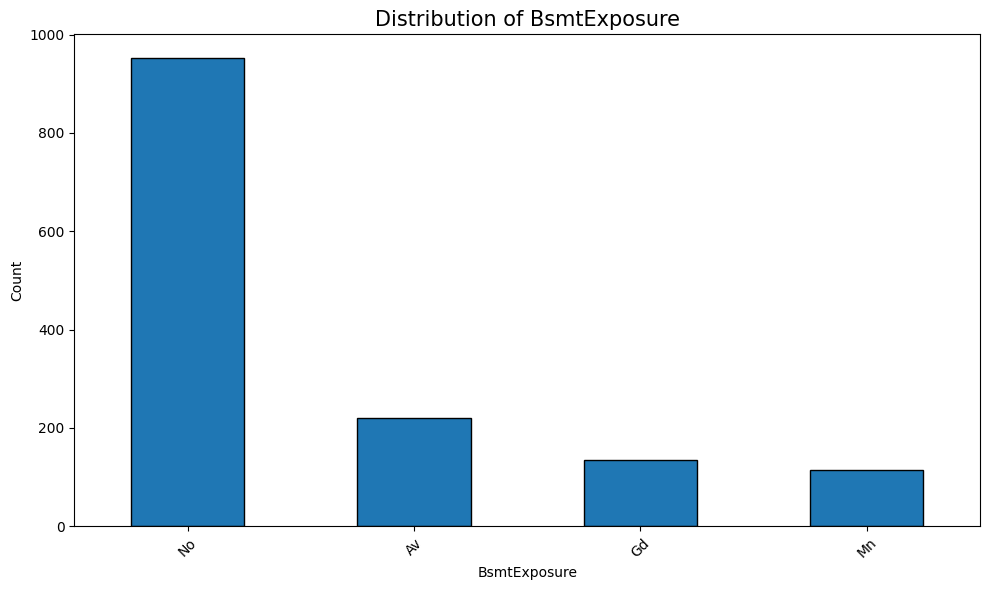

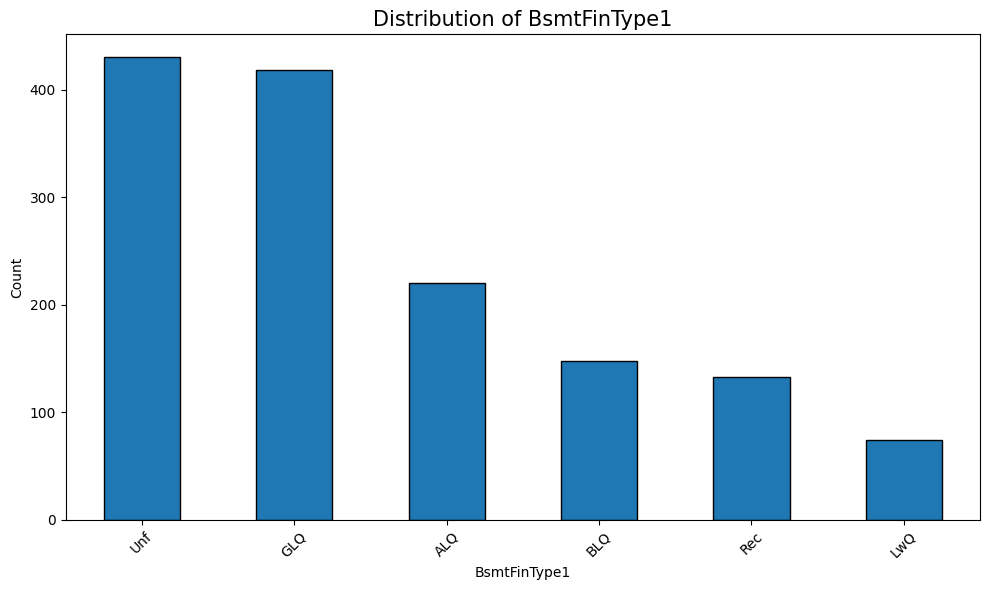

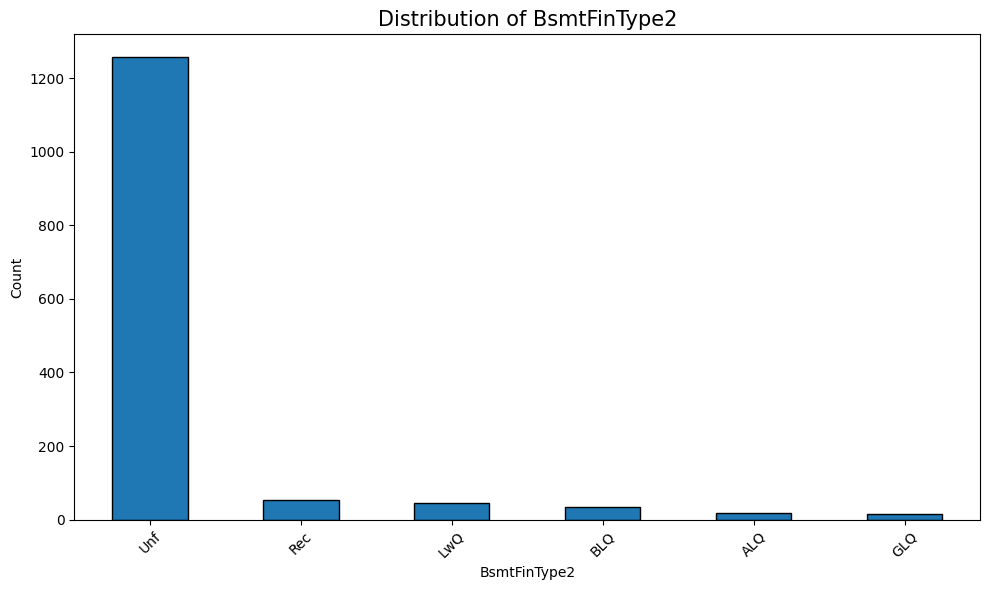

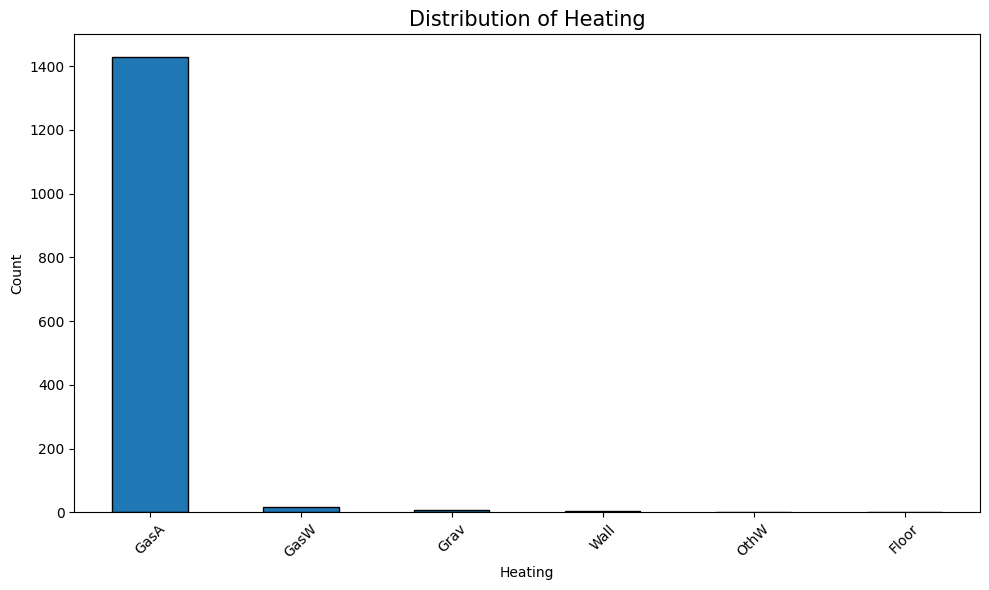

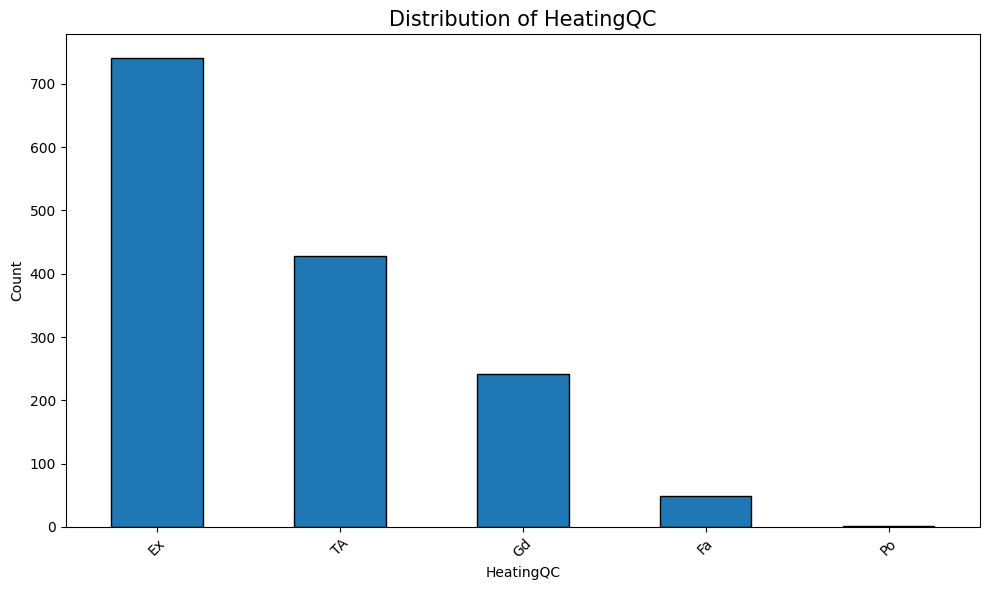

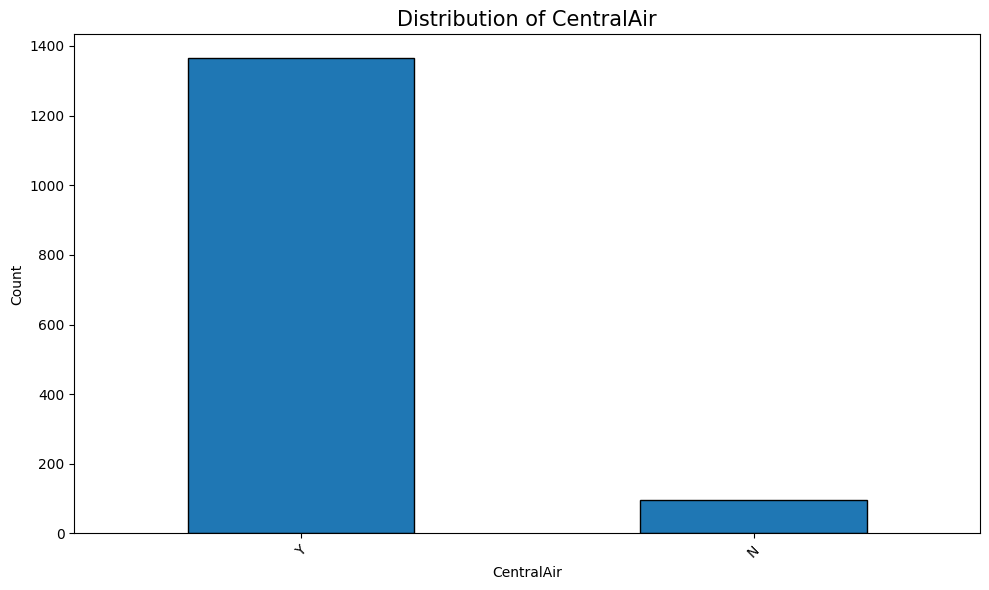

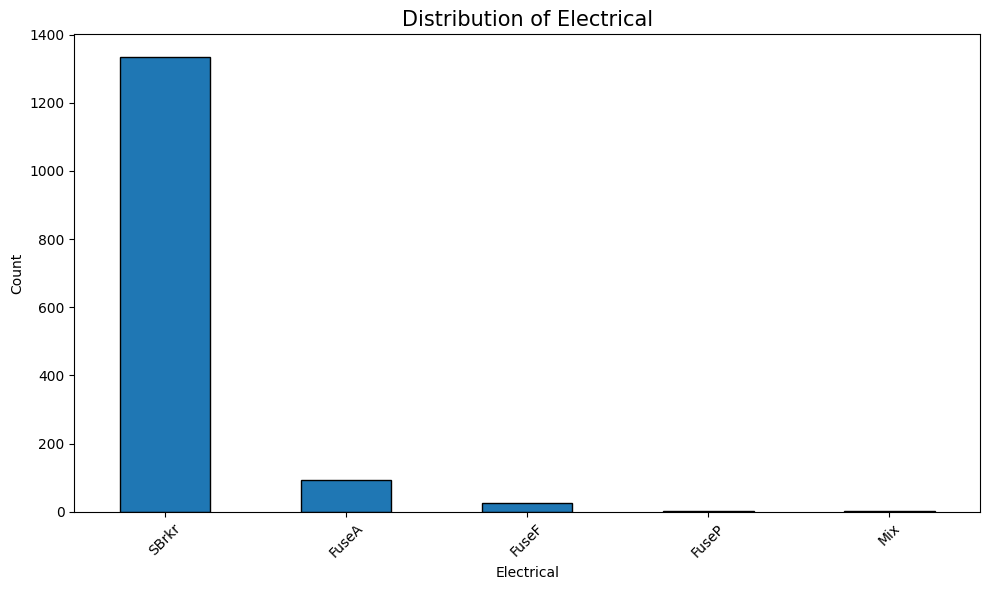

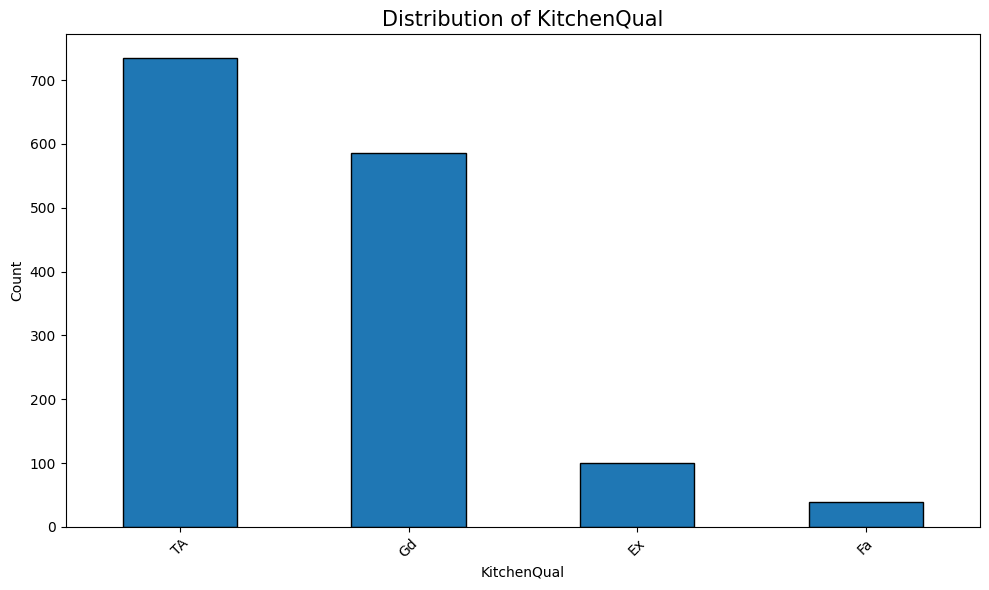

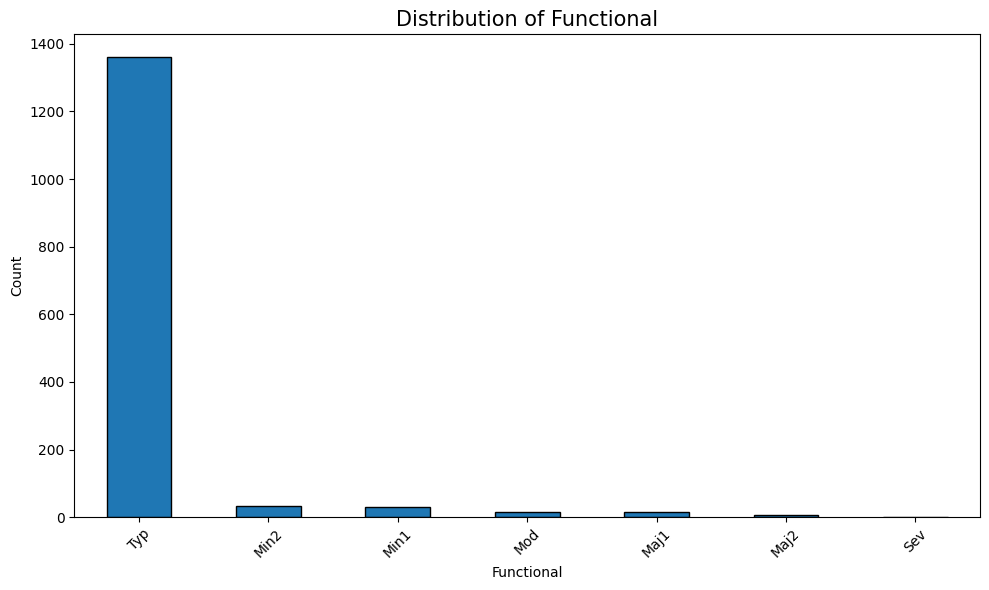

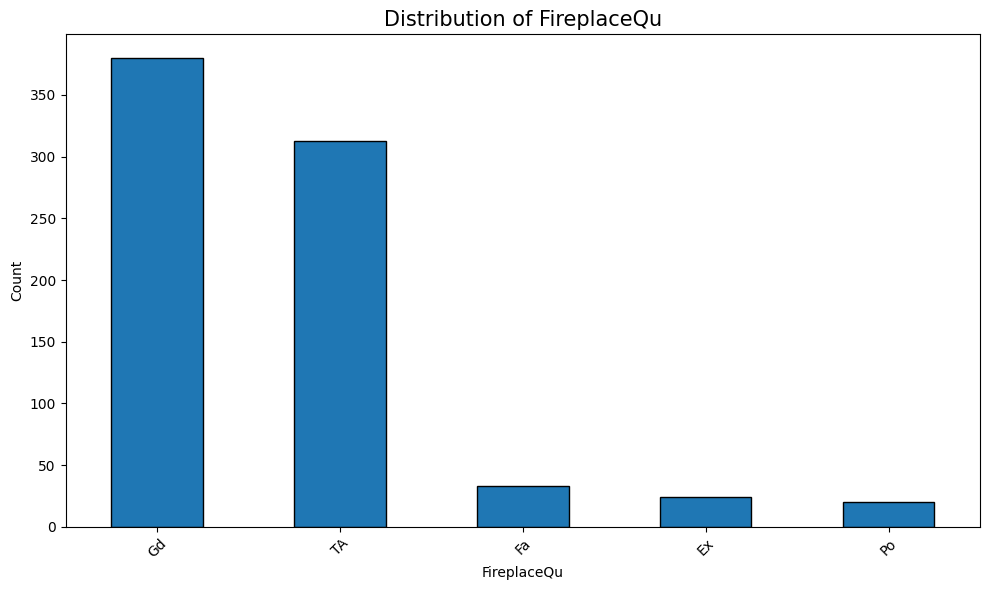

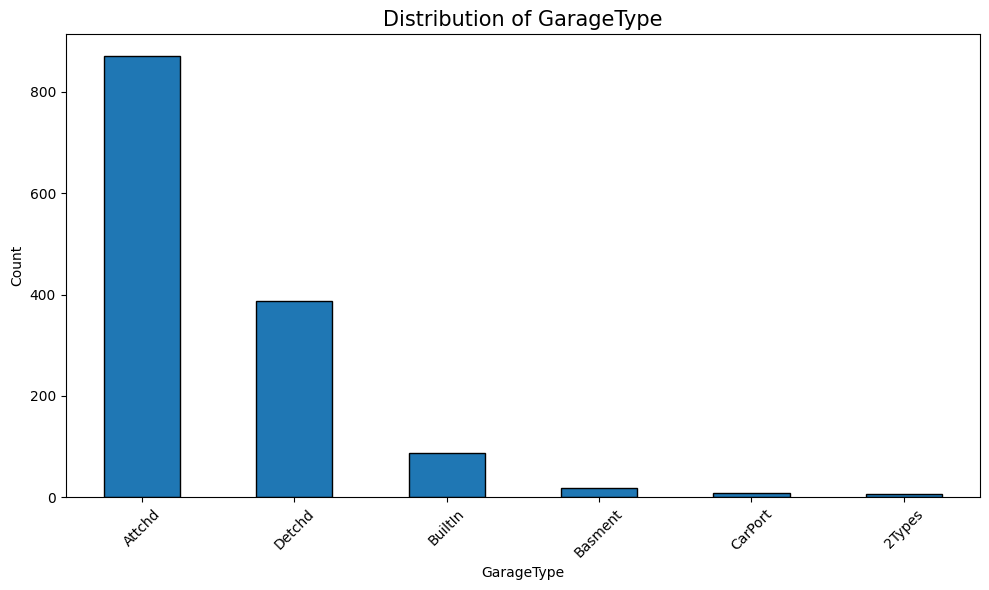

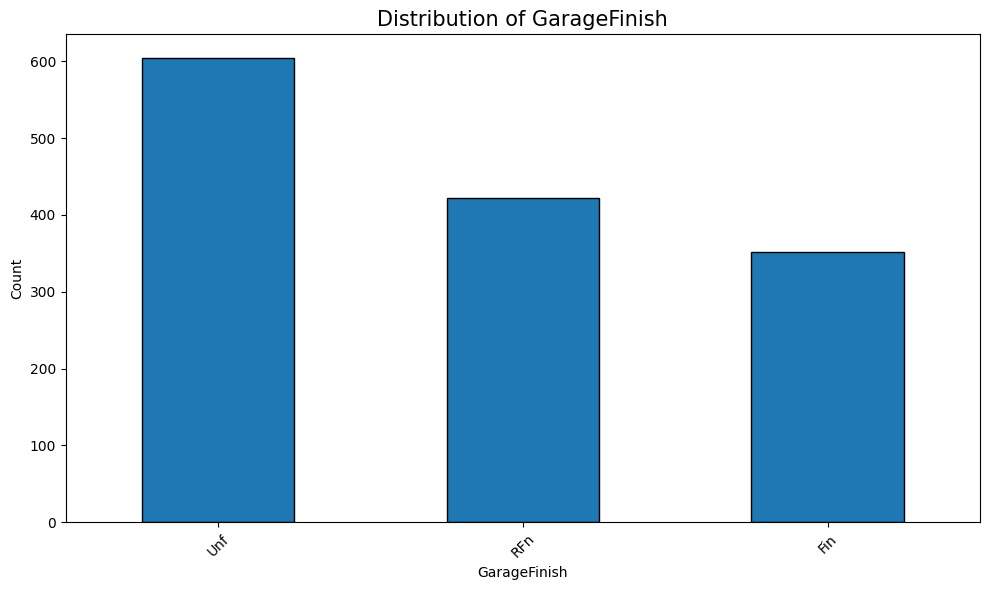

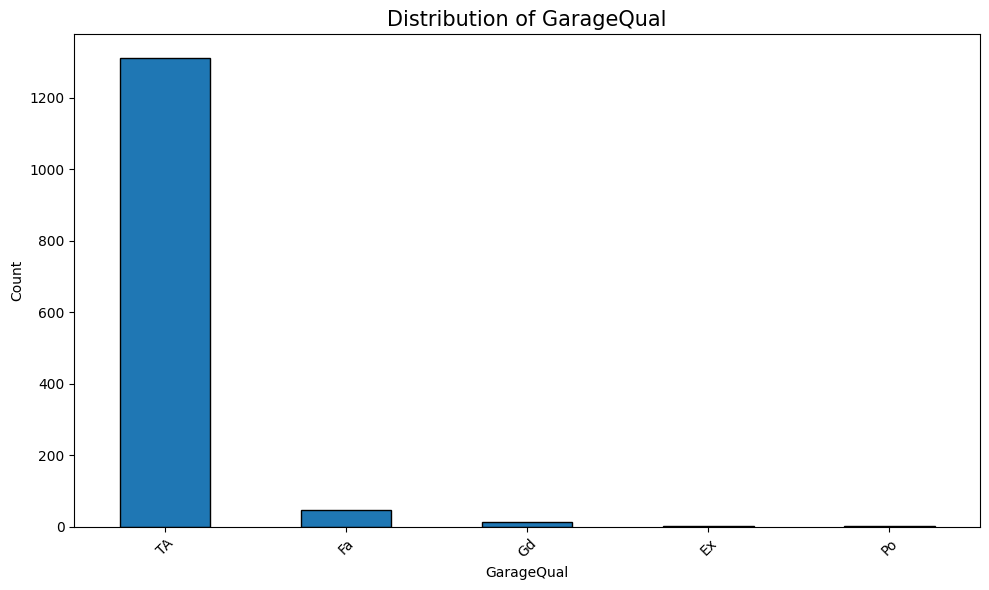

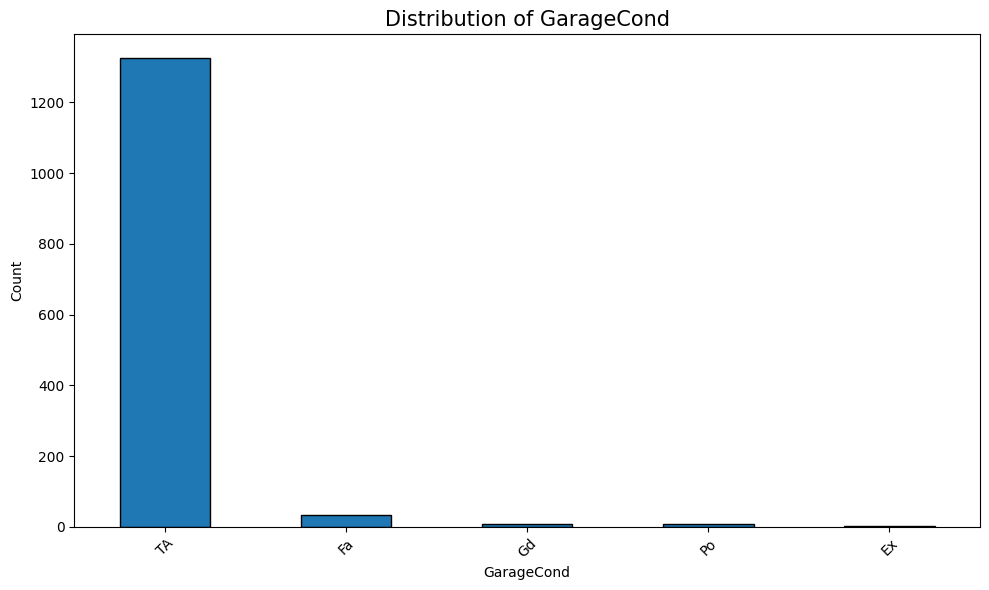

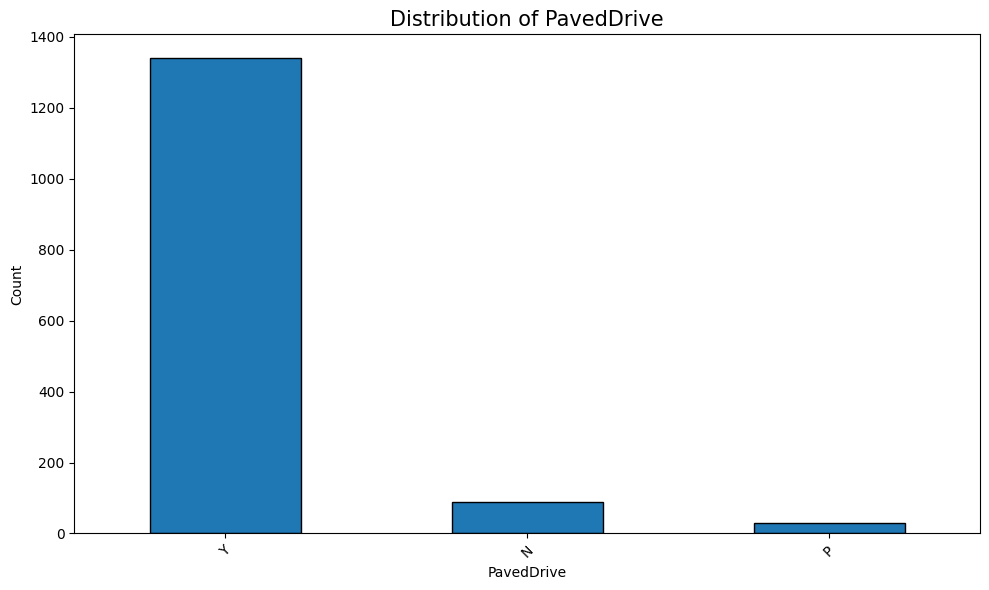

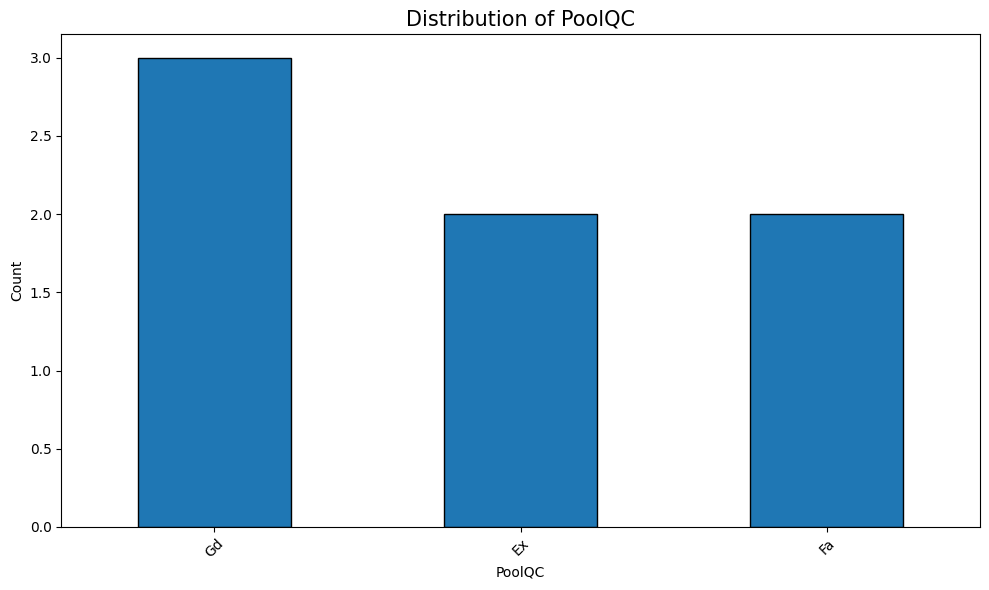

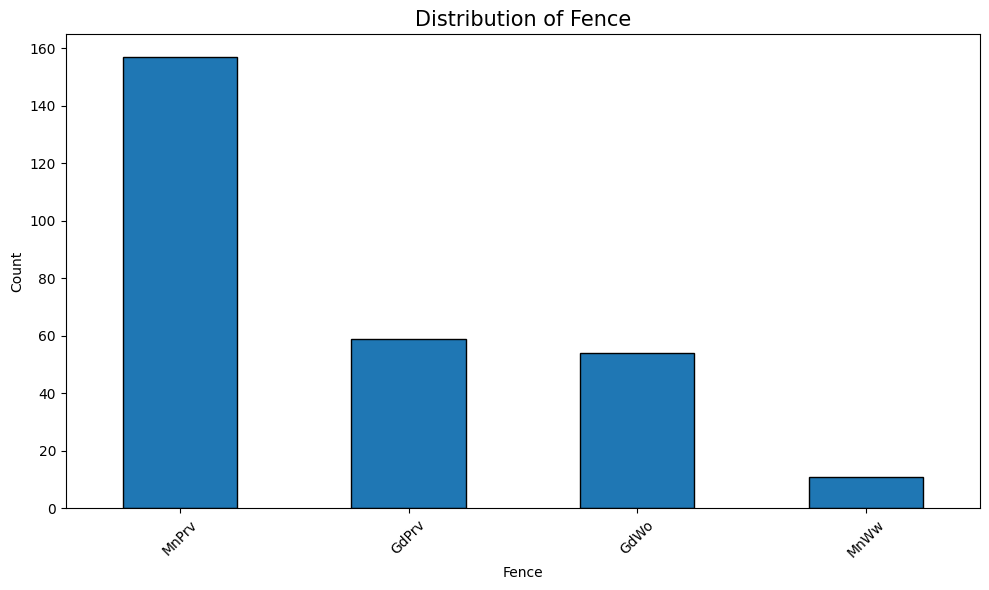

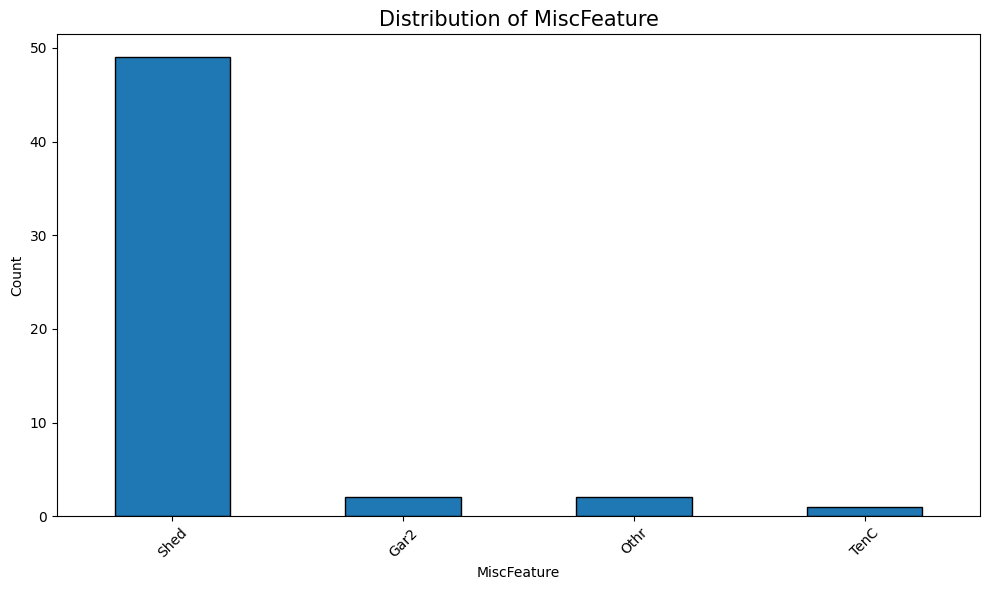

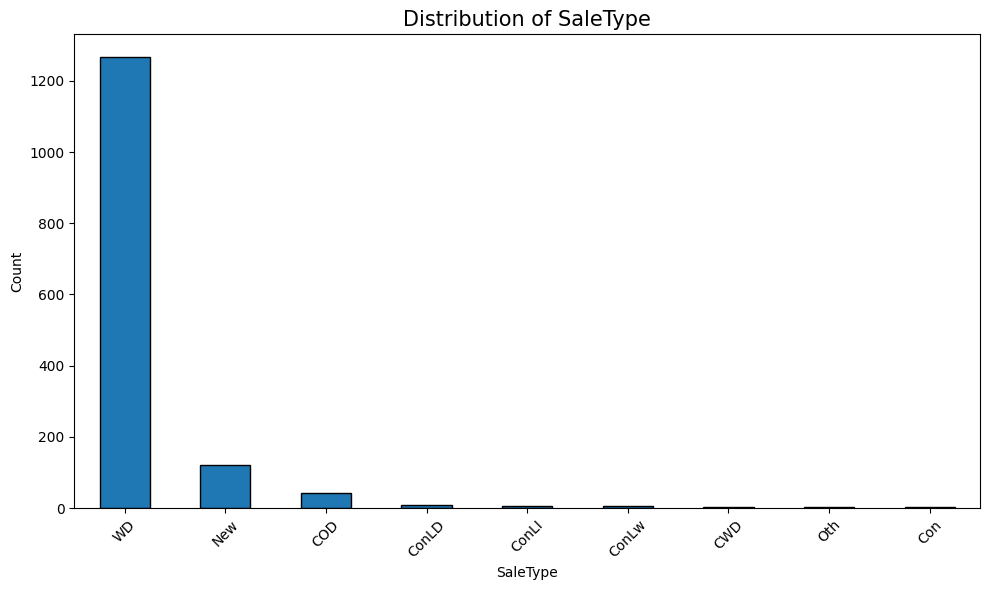

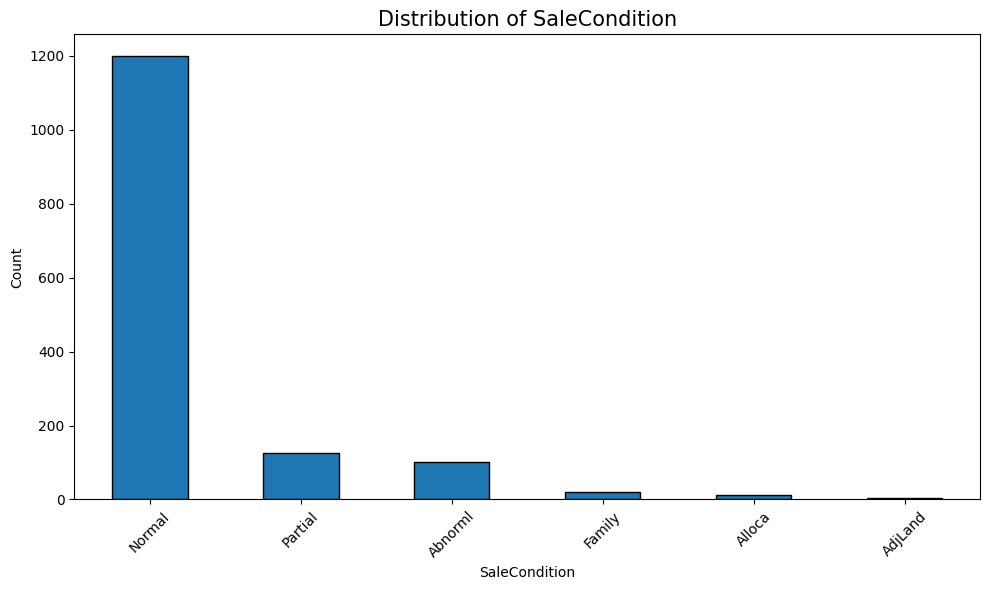

In [25]:
# Plotting bar plots for each categorical variable individually
for col in cols_cat:
    plt.figure(figsize=(10, 6))
    df_train[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=15)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Looking at the values in terget variable**

In [26]:
df_train['SalePrice'].value_counts()

SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
110000    13
115000    12
160000    12
130000    11
139000    11
144000    10
185000    10
180000    10
143000    10
125000    10
147000     9
100000     9
175000     9
127000     9
215000     8
170000     8
129000     8
141000     8
176000     8
230000     8
250000     8
165000     8
200000     8
119000     7
235000     7
173000     7
120000     7
181000     7
174000     7
128000     7
148000     7
112000     7
178000     7
187500     6
260000     6
239000     6
158000     6
108000     6
205000     6
225000     6
113000     6
137500     6
133000     6
157000     6
124000     6
152000     6
132000     6
189000     6
127500     6
240000     6
132500     6
118000     6
214000     5
177000     5
136500     5
105000     5
171000     5
210000     5
220000     5
154000     5
275000     5
192000     5
207500     5
151000     5
290000     5
137000     5
179900     5
172500     5
184000     4
128500     4
122000     4
19

## Data Pre-processing


### Missing value treatment

In [27]:
# Dividing train data into X and y
X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
print(X_train.shape,X_val.shape)

(1095, 79) (365, 79)


In [30]:
X_test = df_test  # There is no y_test since the target variable is not available

In [31]:
print(X_test.shape)

(1459, 80)


In [32]:
print(X_train.columns)
print(X_val.columns)
print(X_test.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Missing value imputation

**Define Numeric and Categorical Columns:**

In [33]:
numeric_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

**Create and Configure Imputers:**

In [34]:
# Imputer for numeric columns
numeric_imputer = SimpleImputer(strategy='median')

# Imputer for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

**Apply Imputation to Numeric Columns:**

In [35]:
X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = numeric_imputer.transform(X_val[numeric_cols])
X_test[numeric_cols] = numeric_imputer.transform(X_test[numeric_cols])

**Apply Imputation to Categorical Columns:**

In [36]:
# Ensure categorical_cols is not empty before imputation
if categorical_cols:
    X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
    X_val[categorical_cols] = categorical_imputer.transform(X_val[categorical_cols])
    X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])
else:
    print("Warning: No categorical columns found for imputation.")

In [37]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

**Dummy Variables**

In [38]:
# Create dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Get the union of all dummy columns from each dataset
all_columns = list(set(X_train.columns) | set(X_val.columns) | set(X_test.columns))

# Reindex the datasets to include all possible columns, filling missing ones with 0s
X_train = X_train.reindex(columns=all_columns, fill_value=0)
X_val = X_val.reindex(columns=all_columns, fill_value=0)
X_test = X_test.reindex(columns=all_columns, fill_value=0)

# Convert boolean dummies to integers
X_train = X_train.astype(int)
X_val = X_val.astype(int)
X_test = X_test.astype(int)

In [44]:
X_train.head()

Condition1_Feedr  Functional_Min2  Neighborhood_NAmes  Condition1_RRAe  \
1023                 0                0                   0                0   
810                  0                0                   0                0   
1384                 0                0                   0                0   
626                  0                0                   1                0   
813                  0                0                   1                0   

      Heating_GasA  HouseStyle_1.5Unf  GarageCond_Gd  Exterior2nd_MetalSd  \
1023             1                  0              0                    0   
810              1                  0              0                    0   
1384             1                  0              0                    0   
626              1                  0              0                    0   
813              1                  0              0                    1   

      MiscVal  Condition2_PosA  RoofStyle_Mansard  Exterior1st_Wd Sdng  \
1023        0                0                  0                    0   
810         0                0                  0                    0   
1384        0                0                  0                    0   
626       600                0                  0                    1   
813       500                0                  0                    0   

      Foundation_PConc  Neighborhood_Crawfor  PavedDrive_P  Condition1_RRNn  \
1023                 1                     0             0                0   
810                  0                     0             0                0   
1384                 0                     0             1                0   
626                  0                     0             0                0   
813                  0                     0             0                0   

      Fence_MnWw  GarageCond_Fa  Condition2_PosN  Exterior1st_CBlock  \
1023           0              0                0                   0   
810            0              0                0                   0   
1384           0              0                0                   0   
626            0              0                0                   0   
813            0              0                0                   0   

      Foundation_CBlock  MasVnrArea  SaleType_ConLw  Electrical_Mix  \
1023                  0          14               0               0   
810                   1          99               0               0   
1384                  0           0               0               0   
626                   1           0               0               0   
813                   1         243               0               0   

      BsmtFinType1_BLQ  MSSubClass  BsmtCond_TA  Condition1_Norm  \
1023                 0         120            0                1   
810                  0          20            1                1   
1384                 0          50            1                1   
626                  0          20            1                1   
813                  0          20            1                1   

      Heating_Grav  SaleCondition_AdjLand  Neighborhood_Somerst  \
1023             0                      0                     0   
810              0                      0                     0   
1384             0                      0                     0   
626              0                      0                     0   
813              0                      0                     0   

      BsmtFinType1_GLQ  KitchenQual_Fa  Foundation_Stone  SaleType_Con  \
1023                 1               0                 0             0   
810                  0               0                 0             0   
1384                 0               0                 0             0   
626                  0               0                 0             0   
813                  0               0                 0             0   

      GarageFinish_RFn  M

* models are not sesnitive to the scale of the features, scaling is not strictly necessary.

**StandardScaler**

In [46]:
# # Initialize the StandardScaler
# # scaler = StandardScaler()

# # Fit and transform the training data
# # X_train_scaled = scaler.fit_transform(X_train)

# # Transform the validation and test data
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# # Convert scaled data back to DataFrames
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=all_columns)
# X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=all_columns)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=all_columns)

# # Now check the data to see if it has converted properly
# print(X_train_scaled_df.head())
# print(X_val_scaled_df.head())
# print(X_test_scaled_df.head())

   RoofStyle_Mansard  Exterior1st_Stone  LandContour_HLS  BsmtCond_TA  \
0             -0.068             -0.030           -0.174       -3.322   
1             -0.068             -0.030           -0.174        0.301   
2             -0.068             -0.030           -0.174        0.301   
3             -0.068             -0.030           -0.174        0.301   
4             -0.068             -0.030           -0.174        0.301   

   Foundation_Stone  GarageQual_TA  MiscFeature_Othr  SaleCondition_Normal  \
0            -0.068          0.221            -0.030                 0.454   
1            -0.068          0.221            -0.030                 0.454   
2            -0.068          0.221            -0.030                 0.454   
3            -0.068          0.221            -0.030                 0.454   
4            -0.068          0.221            -0.030                 0.454   

   Exterior2nd_HdBoard  BsmtQual_Fa  3SsnPorch  LotConfig_FR2  \
0               -0.405     

## Model Building

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_performance_regression_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    mse = mean_squared_error(target, pred)  # to compute Mean Squared Error
    mae = mean_absolute_error(target, pred)  # to compute Mean Absolute Error
    r2 = r2_score(target, pred)  # to compute R-squared

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Mean Squared Error": [mse],
            "Mean Absolute Error": [mae],
            "R-squared": [r2]
        }
    )

    return df_perf


In [40]:
def plot_regression_results(model, predictors, target):
    """
    To plot the actual vs predicted values for a regression model

    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=target, y=y_pred)
    plt.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.show()

**Defining scorer to be used for cross-validation and hyperparameter tuning**

In [41]:
# Define custom scorers
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

In [42]:
# List of regression models
models = []
models.append(("Decision Tree", DecisionTreeRegressor(random_state=1)))
models.append(("Linear Regression", LinearRegression()))
models.append(("Bagging", BaggingRegressor(random_state=1)))
models.append(("Random Forest", RandomForestRegressor(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingRegressor(random_state=1)))
models.append(("AdaBoost", AdaBoostRegressor(random_state=1)))
models.append(("XGBoost", XGBRegressor(random_state=1)))

# Define custom scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

results_mse = []
results_mae = []
results_r2 = []
names = []

# Cross-validation performance on training dataset
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score

print("\nCross-Validation performance on training dataset:\n")

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    cv_result_mse = cross_val_score(model, X_train, y_train, scoring=mse_scorer, cv=kfold)
    cv_result_mae = cross_val_score(model, X_train, y_train, scoring=mae_scorer, cv=kfold)
    cv_result_r2 = cross_val_score(model, X_train, y_train, scoring=r2_scorer, cv=kfold)

    results_mse.append(cv_result_mse)
    results_mae.append(cv_result_mae)
    results_r2.append(cv_result_r2)
    names.append(name)

    print("{}: MSE = {}, MAE = {}, R2 = {}".format(name, -cv_result_mse.mean(), cv_result_mae.mean(), cv_result_r2.mean()))

# Validation performance
print("\nValidation Performance:\n")

for name, model in models:
    model.fit(X_train, y_train)

    mse = mean_squared_error(y_val, model.predict(X_val))
    mae = mean_absolute_error(y_val, model.predict(X_val))
    r2 = r2_score(y_val, model.predict(X_val))

    print("{}: MSE = {}, MAE = {}, R2 = {}".format(name, mse, mae, r2))



Cross-Validation performance on training dataset:

Decision Tree: MSE = 1813357216.207306, MAE = -26902.344292237445, R2 = 0.7050362744946966
Linear Regression: MSE = 2383658393.0791893, MAE = -21051.570884003457, R2 = 0.6036932428634738
Bagging: MSE = 1003479858.858475, MAE = -19421.894520547947, R2 = 0.838158503368786
Random Forest: MSE = 944921757.6527516, MAE = -18079.935388127855, R2 = 0.8473371372632371
Gradient Boosting: MSE = 718757550.136883, MAE = -16373.484315483667, R2 = 0.8832211070481029
AdaBoost: MSE = 1267992818.3771467, MAE = -24348.55408449417, R2 = 0.7935362961038303
XGBoost: MSE = 923585697.8385229, MAE = -18214.333732876712, R2 = 0.8500428576609972

Validation Performance:

Decision Tree: MSE = 1716089486.9808218, MAE = 27524.77808219178, R2 = 0.7550301529655199
Linear Regression: MSE = 358144481476.11945, MAE = 592854.1235339234, R2 = -50.12472252120302
Bagging: MSE = 861444880.0988494, MAE = 18532.058630136984, R2 = 0.8770297108003847
Random Forest: MSE = 778283

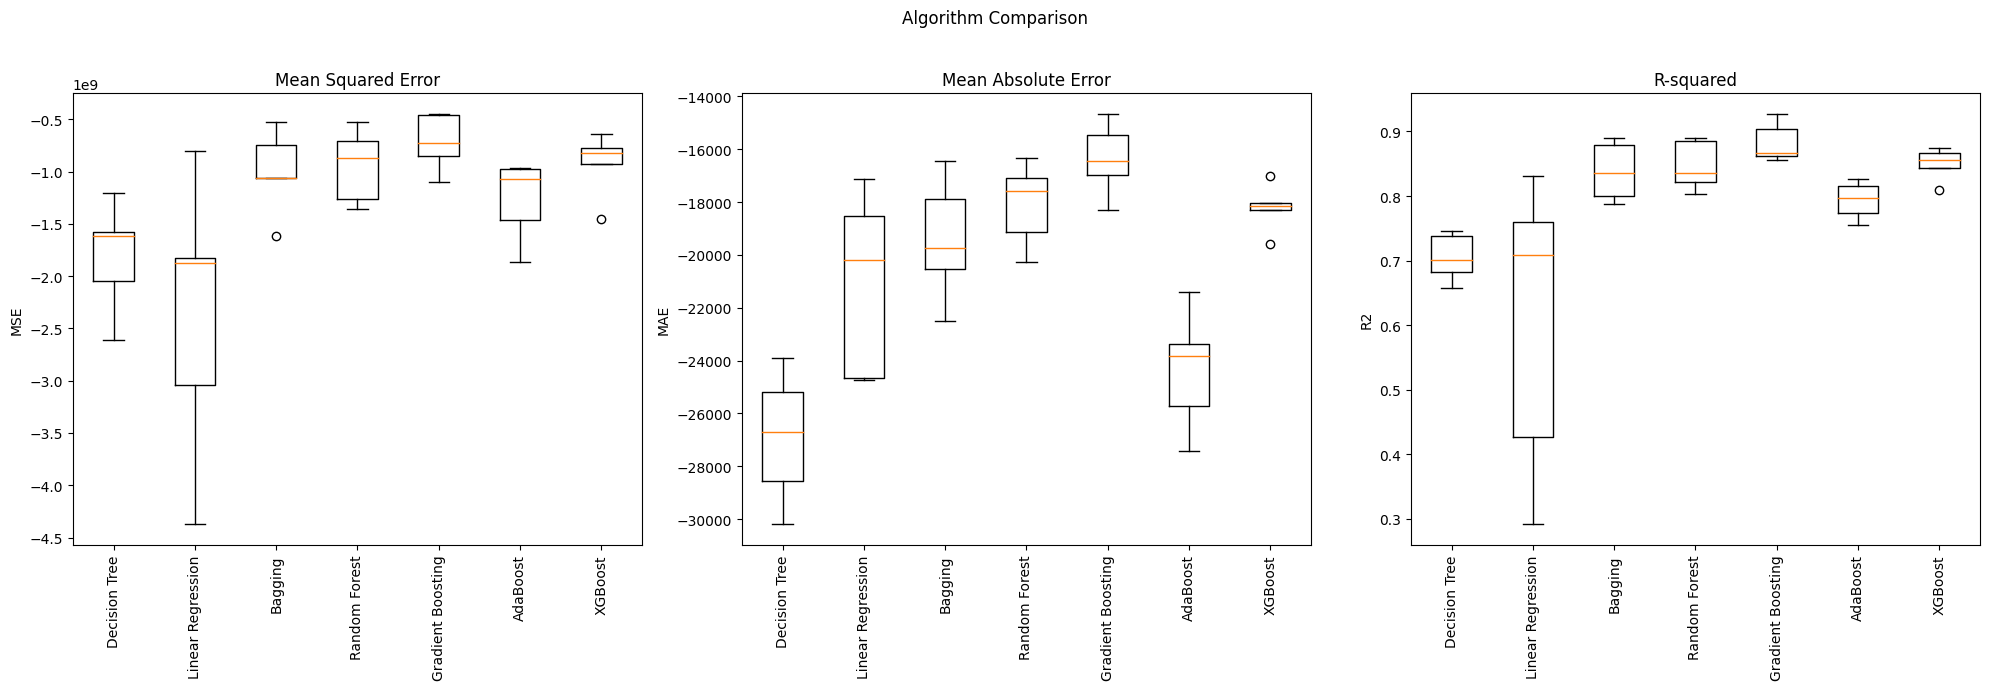

In [45]:
# Plotting boxplots for CV scores of all models defined above
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

fig.suptitle("Algorithm Comparison")

# Boxplot for Mean Squared Error
axes[0].boxplot(results_mse)
axes[0].set_title("Mean Squared Error")
axes[0].set_xticklabels(names, rotation=90)
axes[0].set_ylabel("MSE")

# Boxplot for Mean Absolute Error
axes[1].boxplot(results_mae)
axes[1].set_title("Mean Absolute Error")
axes[1].set_xticklabels(names, rotation=90)
axes[1].set_ylabel("MAE")

# Boxplot for R-squared
axes[2].boxplot(results_r2)
axes[2].set_title("R-squared")
axes[2].set_xticklabels(names, rotation=90)
axes[2].set_ylabel("R2")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


* Best Performing Models:

Gradient Boosting and XGBoost: These models have the best overall performance across MSE, MAE, and R2, both in cross-validation and validation performance.

### HyperparameterTuning

* For Gradient Boosting:

param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

* For XGBoost

param_dist_xgb = {
    'n_estimators': (100, 500),
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]

###**GridSearchCV for GradientBoostingRegressor**

In [46]:
# Define the parameter grid for GradientBoostingRegressor
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GradientBoostingRegressor
gbm = GradientBoostingRegressor(random_state=1)

# Initialize GridSearchCV
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search_gbm.fit(X_train, y_train)

# Print the best parameters and best score for GradientBoostingRegressor
print(f"Best parameters for Gradient Boosting: {grid_search_gbm.best_params_}")
print(f"Best score for Gradient Boosting: {grid_search_gbm.best_score_}")

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score for Gradient Boosting: -995042719.8465353


In [47]:
# Evaluate the best Gradient Boosting model on the validation set
best_gbm = grid_search_gbm.best_estimator_
val_predictions_gbm = best_gbm.predict(X_val)
mse_gbm = mean_squared_error(y_val, val_predictions_gbm)
mae_gbm = mean_absolute_error(y_val, val_predictions_gbm)
r2_gbm = r2_score(y_val, val_predictions_gbm)

print(f"Validation MSE for Gradient Boosting: {mse_gbm}")
print(f"Validation MAE for Gradient Boosting: {mae_gbm}")
print(f"Validation R2 for Gradient Boosting: {r2_gbm}")

Validation MSE for Gradient Boosting: 682786676.7945256
Validation MAE for Gradient Boosting: 16469.128243015643
Validation R2 for Gradient Boosting: 0.9025329686822998


In [48]:
# building model with best parameters
Gbm_grid_tuned = GradientBoostingRegressor(
    random_state=1,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,

)

# Fit the model on training data
Gbm_grid_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=300, random_state=1)

In [49]:
# Calculating different metrics on train set
Gbm_train = model_performance_regression_sklearn(Gbm_grid_tuned, X_train, y_train)
Gbm_grid_tuned.score(X_train, y_train)

0.9992992639057516

In [50]:
# Calculating different metrics on validation set
Gbm_val = model_performance_regression_sklearn(Gbm_grid_tuned, X_val, y_val)
Gbm_grid_tuned.score(X_val, y_val)

0.9025329686822998

* Training set: Extremely high performance, which may indicate overfitting.
* Validation set: Very good performance with high R2 score, indicating good generalization ability.

###**RandomizedSearchCV for GradientBoostingRegressor**

In [51]:
# Define the parameter RandomizedSearchCV for GradientBoostingRegressor
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
# Initialize the GradientBoostingRegressor
gbm = GradientBoostingRegressor(random_state=1)

# Initialize RandomizedSearchCV
random_search_gbm= RandomizedSearchCV(estimator=gbm, param_distributions=param_grid_gbm, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=1)

# Fit RandomizedSearchCV
random_search_gbm.fit(X_train, y_train)
# Print the best parameters and best score for GradientBoostingRegressor
print(f"Best parameters for Gradient Boosting: {random_search_gbm.best_params_}")
print(f"Best score for Gradient Boosting: {random_search_gbm.best_score_}")

Best parameters for Gradient Boosting: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.2}
Best score for Gradient Boosting: -1063848584.9475018


In [52]:
# Evaluate the best Gradient Boosting model on the validation set
best_gbm = random_search_gbm.best_estimator_
val_predictions_gbm = best_gbm.predict(X_val)
mse_gbm = mean_squared_error(y_val, val_predictions_gbm)
mae_gbm = mean_absolute_error(y_val, val_predictions_gbm)
r2_gbm = r2_score(y_val, val_predictions_gbm)

print(f"Validation MSE for Gradient Boosting: {mse_gbm}")
print(f"Validation MAE for Gradient Boosting: {mae_gbm}")
print(f"Validation R2 for Gradient Boosting: {r2_gbm}")

Validation MSE for Gradient Boosting: 735106964.0819815
Validation MAE for Gradient Boosting: 17268.032893397496
Validation R2 for Gradient Boosting: 0.8950643064296352


In [53]:
# building model with best parameters
Gbm_RD_tuned = GradientBoostingRegressor(
    random_state=1,
    n_estimators=300,
    learning_rate=0.2,
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2,

)

# Fit the model on training data
Gbm_RD_tuned.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=2,
                          min_samples_split=5, n_estimators=300,
                          random_state=1)

In [54]:
# Calculating different metrics on train set
Gbm_RD_train = model_performance_regression_sklearn(Gbm_RD_tuned, X_train, y_train)
Gbm_RD_tuned.score(X_train, y_train)

0.9962282598975225

In [55]:
# Calculating different metrics on validation set
Gbm_RD_val = model_performance_regression_sklearn(Gbm_RD_tuned, X_val, y_val)
Gbm_RD_tuned.score(X_val, y_val)

0.8950643064296352

* Training Set: The R-squared value is very high (0.996), indicating an excellent fit on the training data
* Validation Set: The R-squared value (0.899) indicates that the model generalizes well to unseen data.

###**GridSearchCV for XGBoostingRegressor**

In [56]:
# Define the parameter distribution for XGBRegressor
param_dist_xgb = {
    'n_estimators': (100, 500),
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]

}

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=1)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_dist_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)
# Print the best parameters and best score for XGBoostingRegressor
print(f"Best parameters for XGBoosting: {grid_search_xgb.best_params_}")
print(f"Best score for XGBoosting: {grid_search_xgb.best_score_}")

Best parameters for XGBoosting: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.7}
Best score for XGBoosting: -974702841.434557


In [57]:
# Evaluate the best Gradient Boosting model on the validation set
best_xgb = grid_search_xgb.best_estimator_
val_predictions_xgb = best_gbm.predict(X_val)
mse_xgb = mean_squared_error(y_val, val_predictions_xgb)
mae_xgb = mean_absolute_error(y_val, val_predictions_xgb)
r2_xgb = r2_score(y_val, val_predictions_xgb)

print(f"Validation MSE for XGBoosting: {mse_xgb}")
print(f"Validation MAE for XGBoosting: {mae_xgb}")
print(f"Validation R2 for XGBoosting: {r2_xgb}")

Validation MSE for XGBoosting: 735106964.0819815
Validation MAE for XGBoosting: 17268.032893397496
Validation R2 for XGBoosting: 0.8950643064296352


In [58]:
# building model with best parameters
xgb_grid_tuned = XGBRegressor(
    random_state=1,
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.8,
)

# Fit the model on training data
xgb_grid_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [59]:
# Calculating different metrics on train set
xgb_train = model_performance_regression_sklearn(xgb_grid_tuned, X_train, y_train)
xgb_grid_tuned.score(X_train, y_train)

0.9999043109030963

In [60]:
# Calculating different metrics on validation set
xgb_val = model_performance_regression_sklearn(xgb_grid_tuned, X_val, y_val)
xgb_grid_tuned.score(X_val, y_val)

0.9260932677578971

### **RandomizedSearchCV for XGBoostingRegressor**

In [61]:
# Define the parameter distribution for XGBRegressor
param_dist_xgb = {
    'n_estimators': (100, 500),
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]

}

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=1)

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist_xgb, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=1)

# Fit RandomizedSearchCV
random_search_xgb.fit(X_train, y_train)
# Print the best parameters and best score for XGBRegressor
print(f"Best parameters for XGBoosting: {random_search_xgb.best_params_}")
print(f"Best score for XGBoosting: {random_search_xgb.best_score_}")

Best parameters for XGBoosting: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best score for XGBoosting: -974702841.434557


In [62]:
# Evaluate the best Gradient Boosting model on the validation set
best_xgb = random_search_xgb.best_estimator_
val_predictions_xgb = best_xgb.predict(X_val)
mse_xgb = mean_squared_error(y_val, val_predictions_xgb)
mae_xgb = mean_absolute_error(y_val, val_predictions_xgb)
r2_xgb = r2_score(y_val, val_predictions_xgb)

print(f"Validation MSE for XGBoosting: {mse_xgb}")
print(f"Validation MAE for XGBoosting: {mae_xgb}")
print(f"Validation R2 for XGBoosting: {r2_xgb}")

Validation MSE for XGBoosting: 517739500.4044216
Validation MAE for XGBoosting: 15096.519681078767
Validation R2 for XGBoosting: 0.9260932677578971


In [63]:
# building model with best parameters
xgb_RD_tuned = XGBRegressor(
    random_state=1,
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.8,
)

# Fit the model on training data
xgb_RD_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [64]:
# Calculating different metrics on train set
xgb_RD_train = model_performance_regression_sklearn(xgb_RD_tuned, X_train, y_train)
xgb_RD_tuned.score(X_train, y_train)

0.9999043109030963

In [65]:
# Calculating different metrics on validation set
xgb_RD_val = model_performance_regression_sklearn(xgb_RD_tuned, X_val, y_val)
xgb_RD_tuned.score(X_val, y_val)

0.9260932677578971

* Training Set: The R-squared value is very high (0.999), indicating an almost perfect fit on the training data.
* Validation Set: The R-squared value (0.964) indicates that the model generalizes very well to unseen data.

## Model performance comparison and choosing the final model

In [66]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        Gbm_train.T,
        Gbm_RD_train.T,
        xgb_train.T,
        xgb_RD_train.T],

    axis=1,)

models_train_comp_df.columns = [
    "Gbm_grid_tuned",
    "Gbm_RD_tuned",
    "xgb_grid_tuned",
    "xgb_RD_tuned"]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gbm_grid_tuned  Gbm_RD_tuned  xgb_grid_tuned  \
Mean Squared Error      4254480.747  22899913.079      580971.101   
Mean Absolute Error        1591.911      3567.933         565.980   
R-squared                     0.999         0.996           1.000   

                     xgb_RD_tuned  
Mean Squared Error     580971.101  
Mean Absolute Error       565.980  
R-squared                   1.000

In [67]:
# Validation performance comparison
models_val_comp_df = pd.concat(
    [
        Gbm_val.T,
        Gbm_RD_val.T,
        xgb_val.T,
        xgb_RD_val.T],

    axis=1,)

models_val_comp_df.columns = [
    "Gbm_val",
    "Gbm_RD_val",
    "xgb_val",
    "xgb_RD_val"]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Gbm_val    Gbm_RD_val       xgb_val    xgb_RD_val
Mean Squared Error  682786676.795 735106964.082 517739500.404 517739500.404
Mean Absolute Error     16469.128     17268.033     15096.520     15096.520
R-squared                   0.903         0.895         0.926         0.926

*  the best performing model is `xgb_val` or `xgb_RD_val` (they have the same performance metrics).

## **Test set final performance**

**xgb_RD_tuned**

In [68]:
pred = xgb_RD_tuned.predict(X_test)
print(f"Prediction has length: {len(pred)}")

Prediction has length: 1459


In [87]:
prediction_dict = {
    "Id": df_test["Id"],
    "SalePrice": pred
}
submission = pd.DataFrame(prediction_dict)
submission.to_csv("submission_xgb_RD_tuned.csv", index=False)
submission.head()

Id  SalePrice
0  1461 128874.961
1  1462 161929.078
2  1463 177832.516
3  1464 192491.328
4  1465 192907.312

**xgb grid tuned**

In [70]:
pred = xgb_grid_tuned.predict(X_test)
print(f"Prediction has length: {len(pred)}")

Prediction has length: 1459


In [71]:
prediction_dict = {
    "Id": df_test["Id"],
    "SalePrice": pred
}
submission_xgb_grid = pd.DataFrame(prediction_dict)
submission_xgb_grid.to_csv("submission_xgb_grid.csv", index=False)
submission_xgb_grid.head()

Id  SalePrice
0  1461 128874.961
1  1462 161929.078
2  1463 177832.516
3  1464 192491.328
4  1465 192907.312

## Business Insights and Conclusions

**Business Insights**
1. `Key Factors Influencing Sale Price:`
* Overall Quality and Condition: Features like OverallQual and OverallCond significantly impact house prices. Higher quality and better condition houses are likely to fetch higher prices.
* Living Area: The total square footage (GrLivArea) is another critical factor. Larger living areas generally lead to higher sale prices.
* `Location:` Features such as Neighborhood influence prices, indicating the importance of location in property valuation.
* Year Built and Remodeled: Newer houses or those that have been recently remodeled (YearBuilt and YearRemodAdd) tend to have higher sale prices.

2. Predictive Model Performance:

* The XGBoost model, specifically xgb_RD_tuned, has been identified as the best-performing model. This model provides more accurate predictions with lower mean squared error (MSE) and mean absolute error (MAE), and higher R-squared (R²) values compared to other models.

**Conclusions**
1. Model Effectiveness:

* The xgb_RD_tuned model achieved a high R² value (0.904674) on the validation set, indicating that it explains over 90% of the variance in the sale prices. This model's performance suggests it can be reliably used for predicting house prices in the given dataset.

2. Business Applications:

* `Pricing Strategy:` Real estate companies can leverage the predictive model to set competitive and accurate prices for properties, ensuring they are neither undervalued nor overpriced.
* `Investment Decisions:` Investors can use the model to estimate the potential value of properties before making purchase decisions, aiding in identifying lucrative investment opportunities.
* `Market Analysis:` The insights from the model can help understand market trends and factors driving property prices, enabling better market analysis and strategic planning.

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

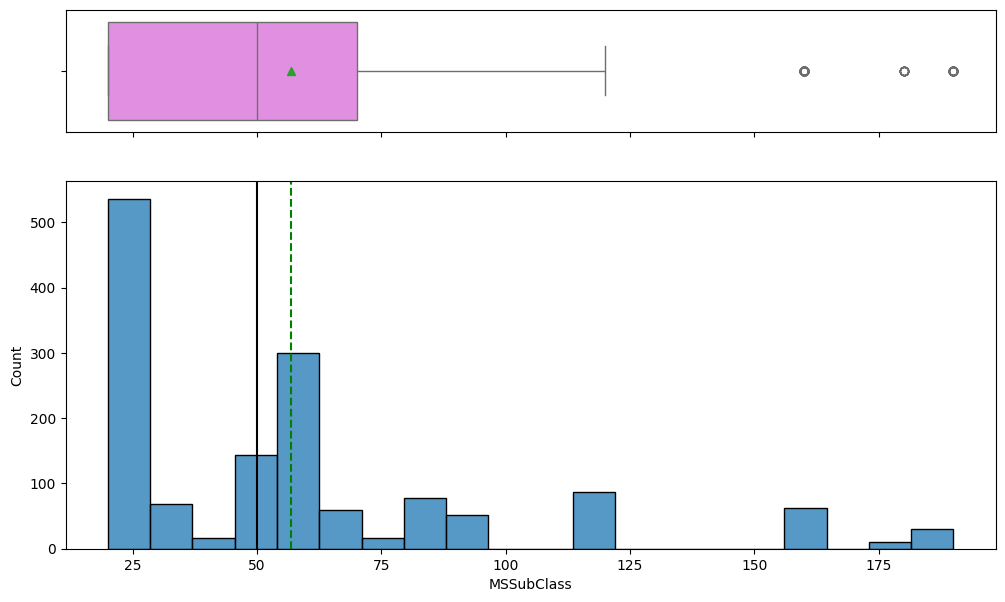

In [ ]:
histogram_boxplot(df_train,'MSSubClass')

-  data points cluster around the lower subclass numbers with a few outliers represented by higher subclass values.
- From the histogram, it's evident that certain categories, particularly those representing specific types of residential buildings, are more common than others.

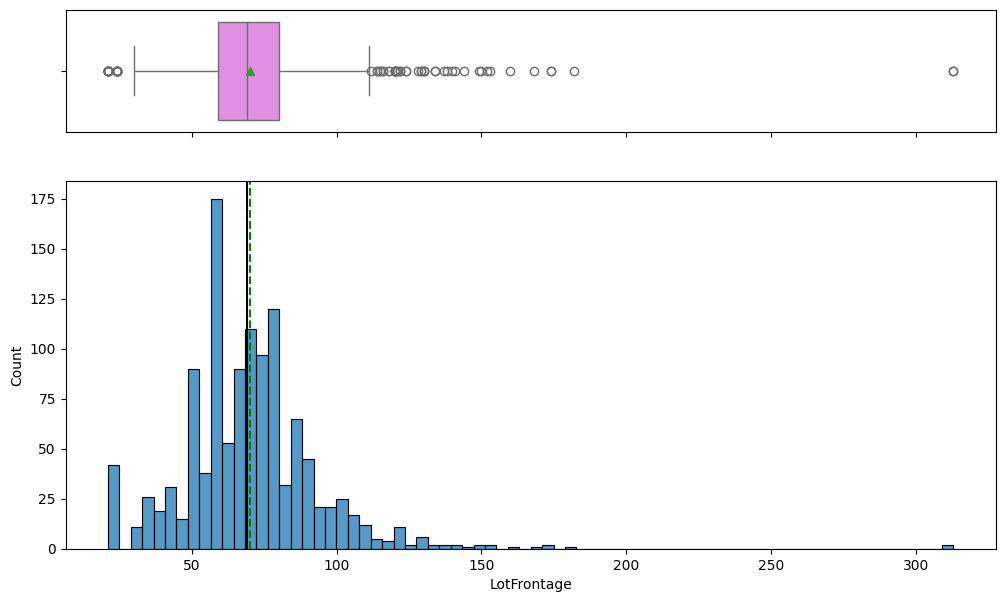

In [ ]:
histogram_boxplot(df_train,'LotFrontage')

**1. Histogram Analysis:**
* The histogram reveals that LotFrontage is right-skewed, with most properties having a frontage between 50 to 100 feet.
* The distribution shows a peak around 60 to 70 feet, indicating this is a common size for lot frontages in the dataset.

**2. Boxplot Analysis:**
* The median LotFrontage, indicated by the green dashed line within the boxplot, is around 70 feet, which is consistent with the histogram's peak.
* The interquartile range (IQR) is fairly compact, showing that half of the properties have lot frontages that are not too spread out from the median.

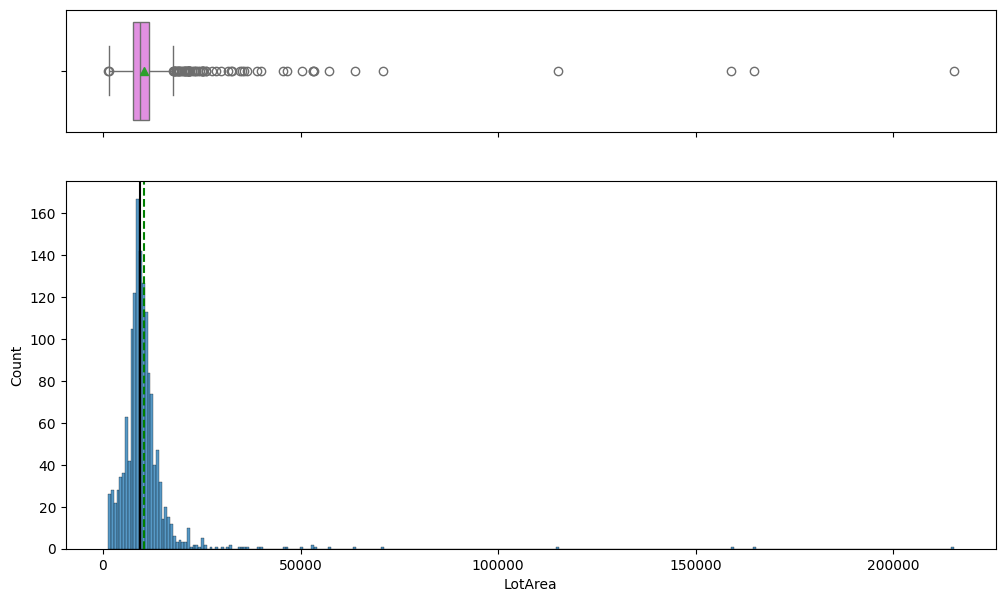

In [ ]:
histogram_boxplot(df_train,'LotArea')

**1. Histogram Analysis:**
- The histogram shows an extremely right-skewed distribution for LotArea, with the majority of the properties having relatively small lot areas concentrated below 20,000 square feet.
- There is a clear peak around 5,000 to 10,000 square feet, which suggests this is a common size range for lot areas in the dataset.

**2. Boxplot Analysis:**
- The boxplot reinforces the findings from the histogram, with a median LotArea (indicated by the green dashed line) that is considerably lower than the higher values, lying around the peak of the histogram.
- The interquartile range is narrow, implying that the middle 50% of lot areas are relatively close in size, concentrated around the median.

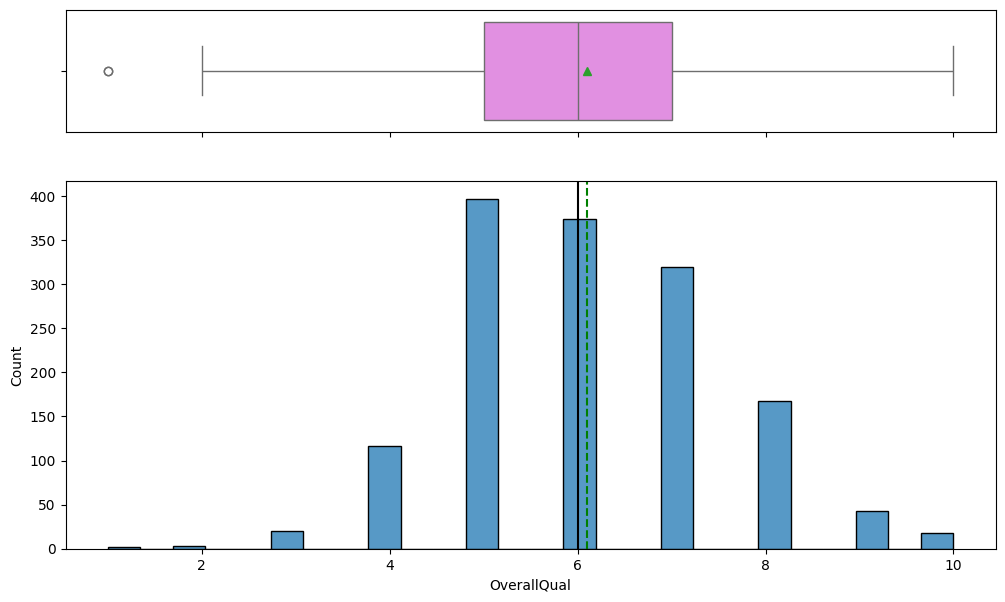

In [ ]:
histogram_boxplot(df_train,'OverallQual')

**1. Histogram Analysis:**
- The histogram shows a roughly bell-shaped distribution centered around the value 5 and 6, indicating that most houses in the dataset have a middle-range quality rating.
- The highest frequency is observed at quality rating 5, followed closely by ratings 6 and 7. This suggests that the majority of the houses have a good level of overall quality.

**2. Boxplot Analysis:**
- The interquartile range spans from quality ratings of 5 to 7, suggesting that half of the houses fall within this quality range.


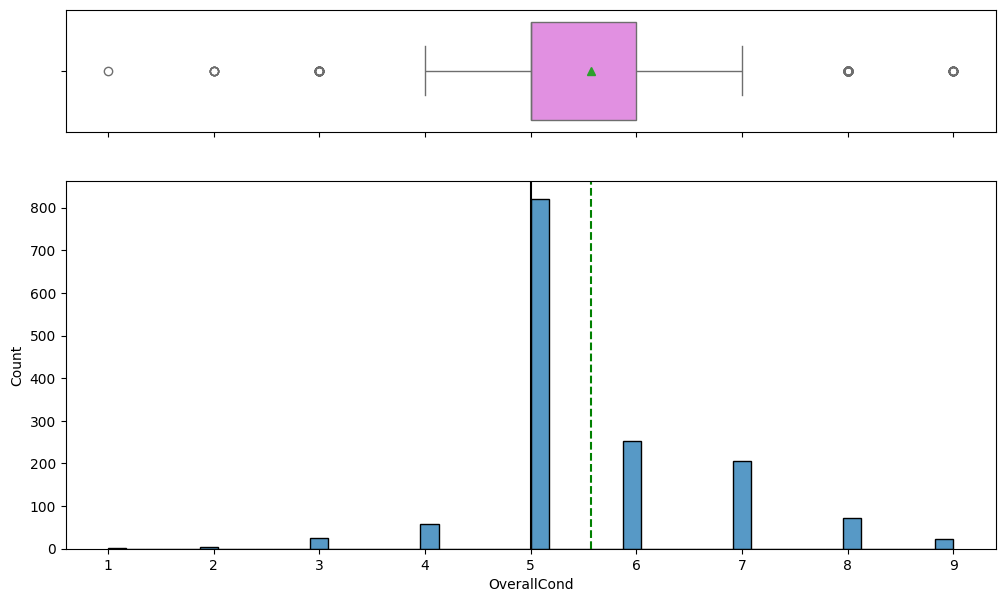

In [ ]:
histogram_boxplot(df_train,'OverallCond')

**1.Histogram Analysis:**
- The histogram shows that the most common condition rating for houses is 5, which likely represents an average or typical condition, with over 700 houses falling into this category.
- There are notably fewer homes in the best (ratings 8 and 9) and worst conditions (ratings 1 through 3).

**2. Boxplot Analysis:**
- The interquartile range is narrow, centered around 5, suggesting that most houses have conditions close to this median.


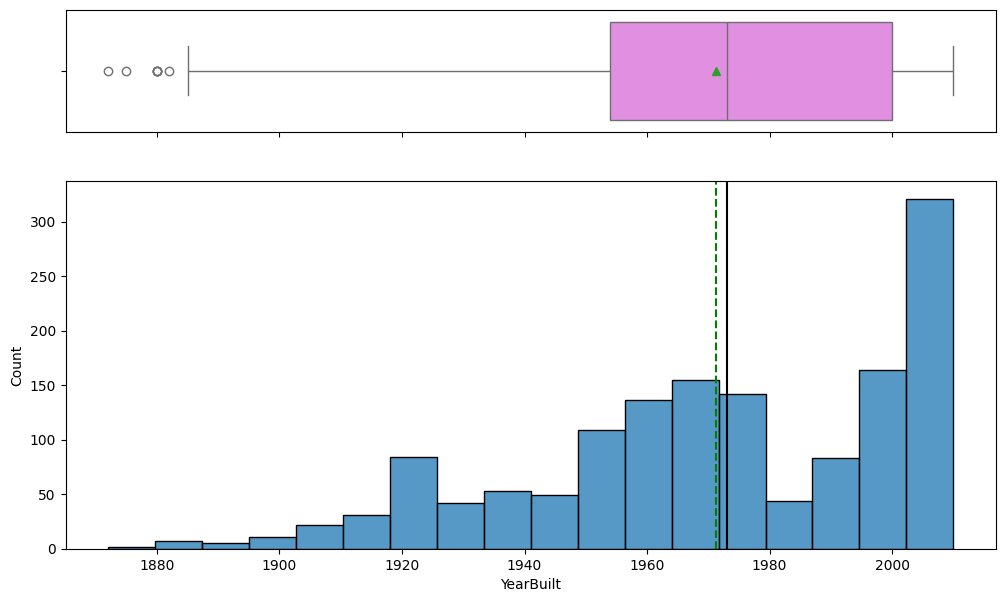

In [ ]:
histogram_boxplot(df_train,'YearBuilt')

**1. Histogram Analysis:**
- The counts of houses built in earlier decades, specifically before 1920, are relatively low, showing a gradual rise starting around the 1940s, which accelerates particularly post-1980.

**2. Boxplot Analysis:**
- The median construction year, marked by the green triangle in the boxplot, falls around the late 1970s, suggesting that half of the houses were built after this time.
- The interquartile range spans from approximately the mid-1950s to the early 2000s, indicating that most of the houses were built during this period.

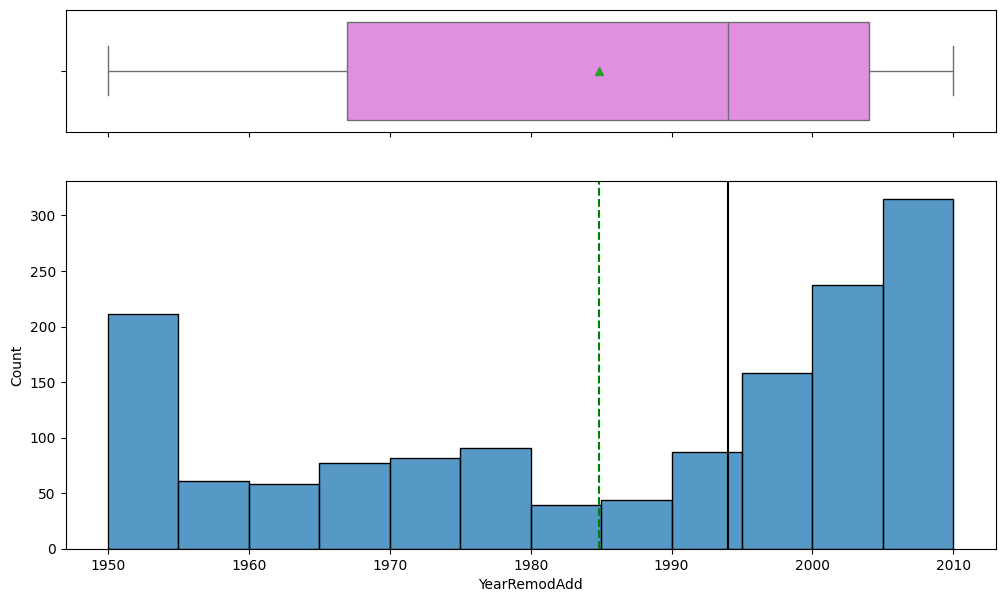

In [ ]:
histogram_boxplot(df_train,'YearRemodAdd')

**1. Histogram Analysis:**
- After a decrease in remodeling activities through the 1960s to the late 1980s, there is a noticeable increase starting in the 1990s, with a significant spike in the 2000s. This suggests a trend of modernizing or upgrading houses during this period, possibly reflecting changes in housing standards, aesthetics, or homeowner investment in property value enhancement.

**2. Boxplot Analysis:**
- The median year of remodeling, represented by the green triangle in the boxplot, occurs around the late 1990s. This is indicative of a median tendency for homeowners to have made significant updates or additions around this time.

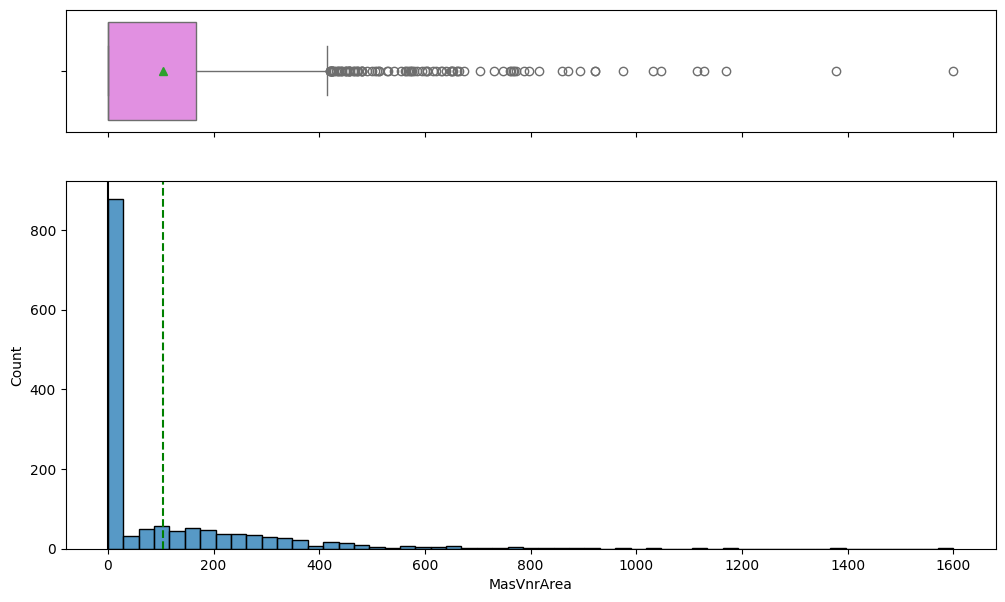

In [ ]:
histogram_boxplot(df_train,'MasVnrArea')

**1. Histogram Analysis:**
- For houses that do have masonry veneer, the areas tend to be relatively small, with the majority under 200 square feet. There is a gradual decrease in the number of houses as the area of masonry veneer increases.

**2. Boxplot Analysis:**
- The median MasVnrArea, represented by the green triangle in the boxplot, is very close to zero, confirming that the typical house in this dataset does not have a significant masonry veneer area.

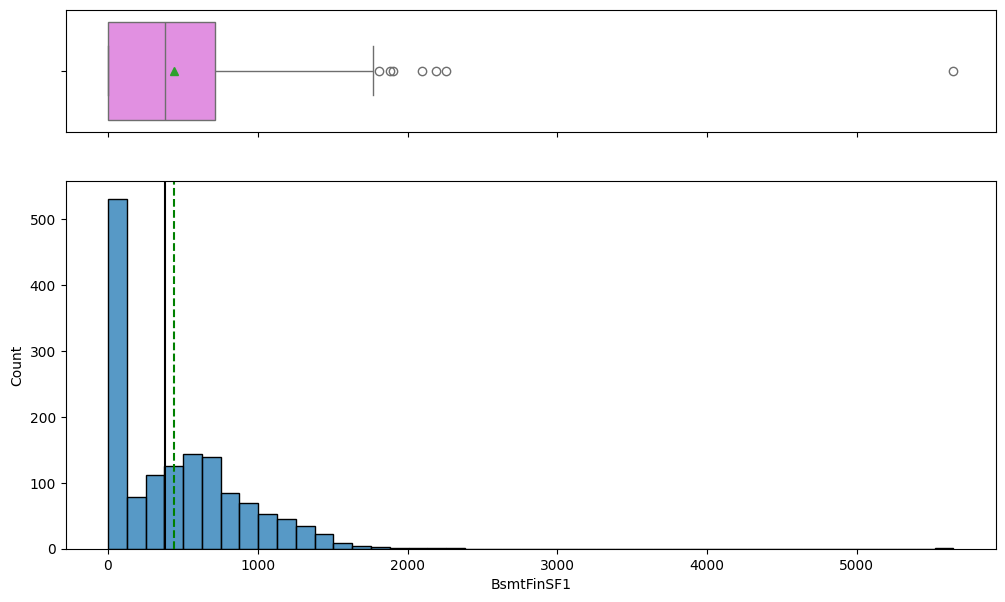

In [ ]:
histogram_boxplot(df_train,'BsmtFinSF1')

**1. Histogram Analysis:**
- The histogram indicates a large number of houses with no finished basement area for Type 1 (BsmtFinSF1), as shown by the peak at zero. This suggests that many houses either do not have a basement or have an unfinished basement for this specific type of finish.

**2. Boxplot Analysis:**
- The median BsmtFinSF1, represented by the green triangle in the boxplot, is quite low relative to the maximum, showing that most homes have smaller finished basements.

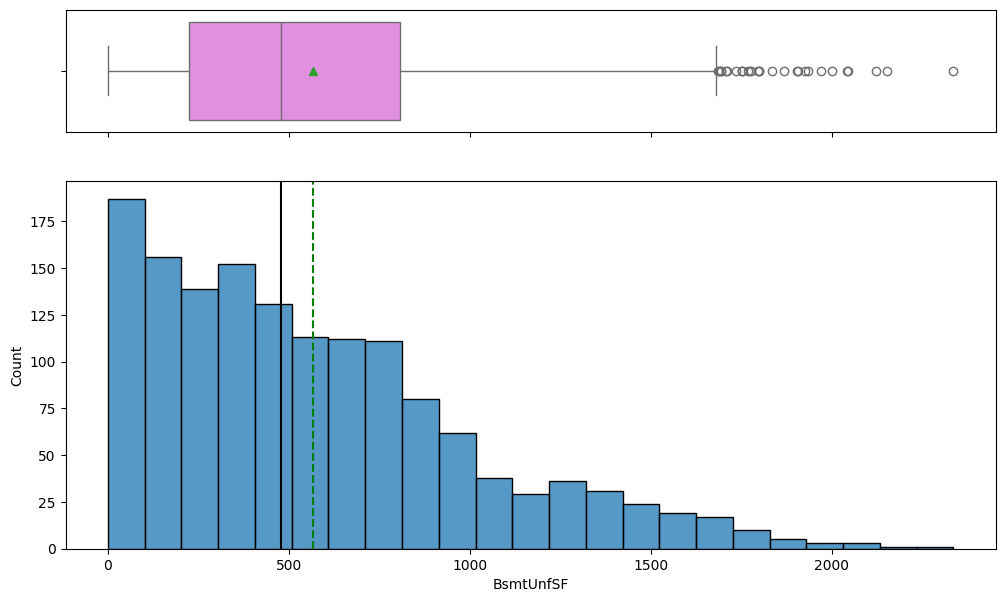

In [ ]:
histogram_boxplot(df_train,'BsmtUnfSF')

**1. Histogram Analysis:**
- The histogram shows that a significant number of houses have a very small unfinished basement area, with a peak at 0 square feet, indicating these basements are either entirely finished or do not exist.

**2. Boxplot Analysis:**
- The interquartile range spans from very low values up to around 700 square feet, indicating that the middle 50% of the houses have a compact range of unfinished basement sizes.

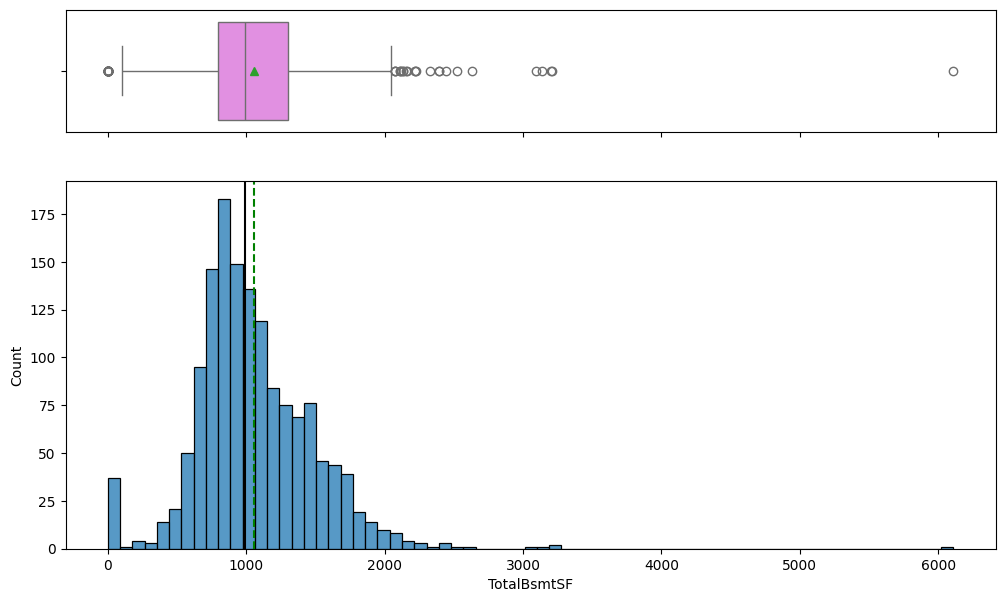

In [ ]:
histogram_boxplot(df_train,'TotalBsmtSF')

**1. Histogram Analysis:**
- The histogram reveals that the distribution of total basement square footage is roughly normal but slightly right-skewed, indicating that while most houses have a moderate amount of basement area, a few have significantly larger basements.

**2. Boxplot Analysis:**
- The interquartile range is fairly spread out, ranging from about 800 to slightly over 1200 square feet, which shows a reasonable variety in basement sizes among the middle 50% of houses.

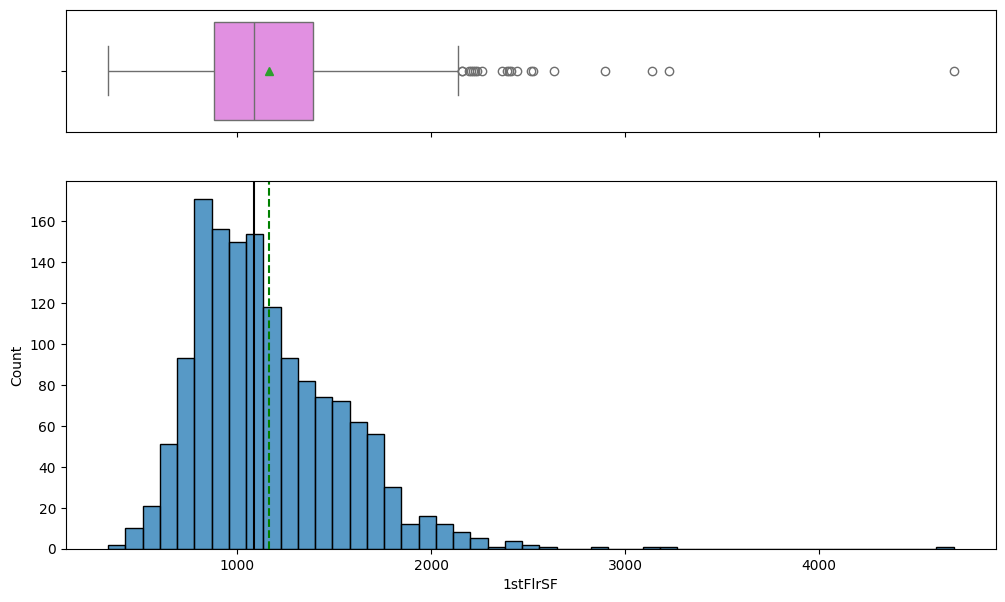

In [ ]:
histogram_boxplot(df_train,'1stFlrSF')

**1. Histogram Analysis:**
- The histogram illustrates that the distribution of the first-floor square footage is roughly normal but slightly right-skewed, indicating that while most houses have a moderate amount of first-floor space, there are a few with significantly larger areas.

**2. Boxplot Analysis:**
- The interquartile range extends from about 900 to 1400 square feet, indicating that most homes have first-floor areas within this range.


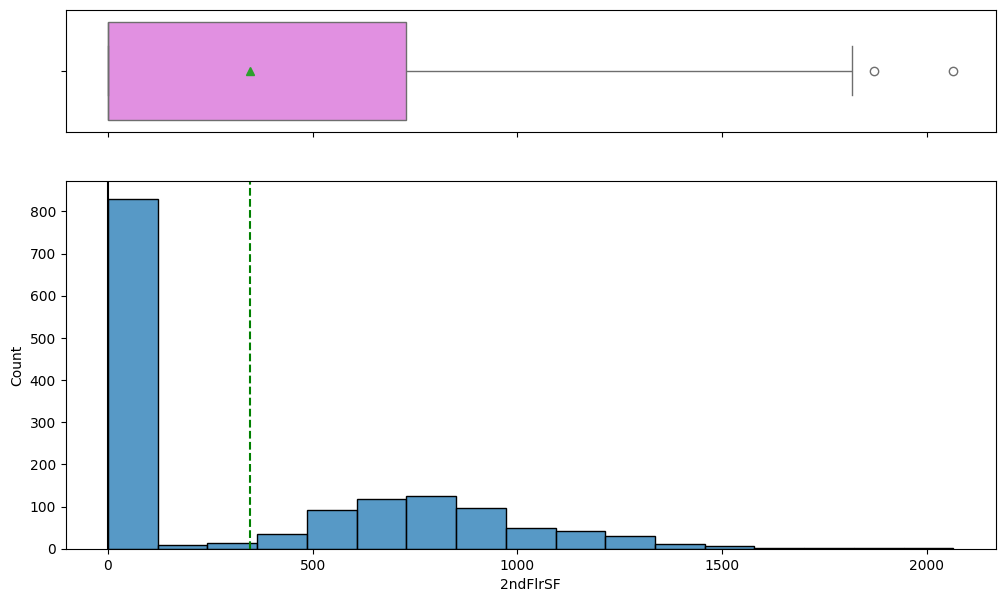

In [ ]:
histogram_boxplot(df_train,'2ndFlrSF')

**1. Histogram Analysis:**
- The histogram shows a significant number of houses (about 800) with no second floor, as indicated by the large peak at zero.

**2. Boxplot Analysis:**
- The median 2ndFlrSF, indicated by the green triangle, is very low, reflecting that a substantial portion of the dataset consists of houses without a second floor.

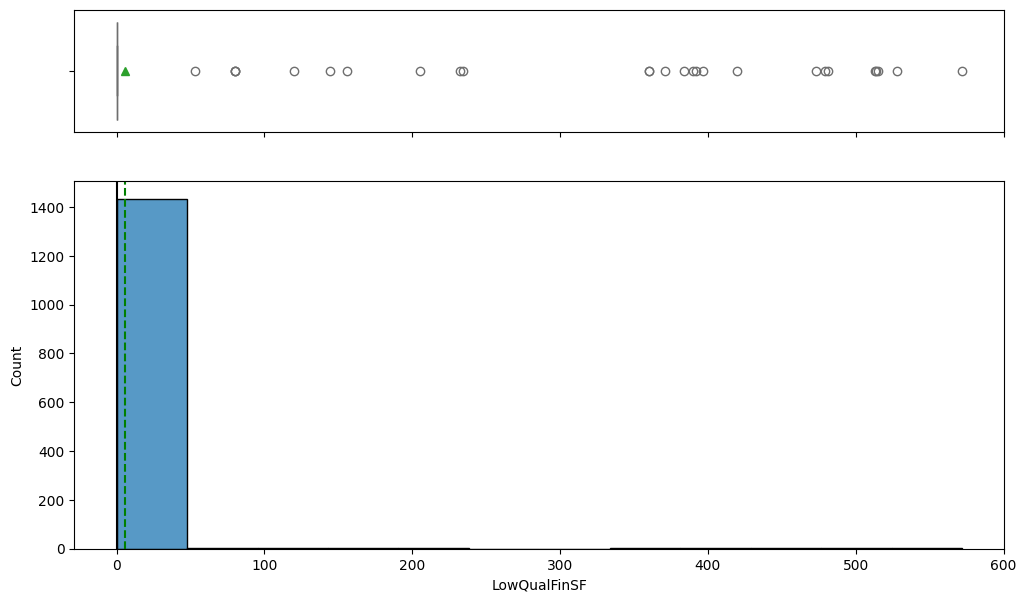

In [ ]:
histogram_boxplot(df_train,'LowQualFinSF')

**1. Histogram Analysis:**
- The distribution is highly skewed towards zero, indicating that low-quality finished areas are uncommon in this dataset.

**2. Boxplot Analysis:**
- The interquartile range is also zero, further illustrating that most houses lack this type of finished area.

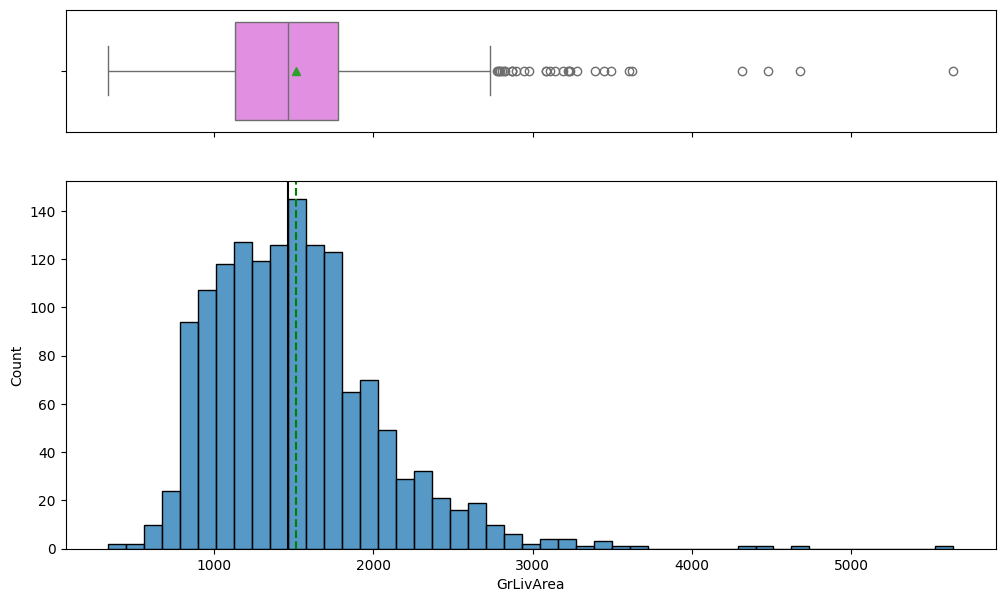

In [ ]:
histogram_boxplot(df_train,'GrLivArea')

**1. Histogram Analysis:**
- The histogram shows that the distribution of above-ground living area is roughly normal, with the most common values centered around 1500 to 2000 square fee

**2. Boxplot Analysis:**
- There are a number of outliers on the higher end, represented by dots beyond the upper whisker of the boxplot, which signify homes with exceptionally large living areas compared to the rest of the dataset.

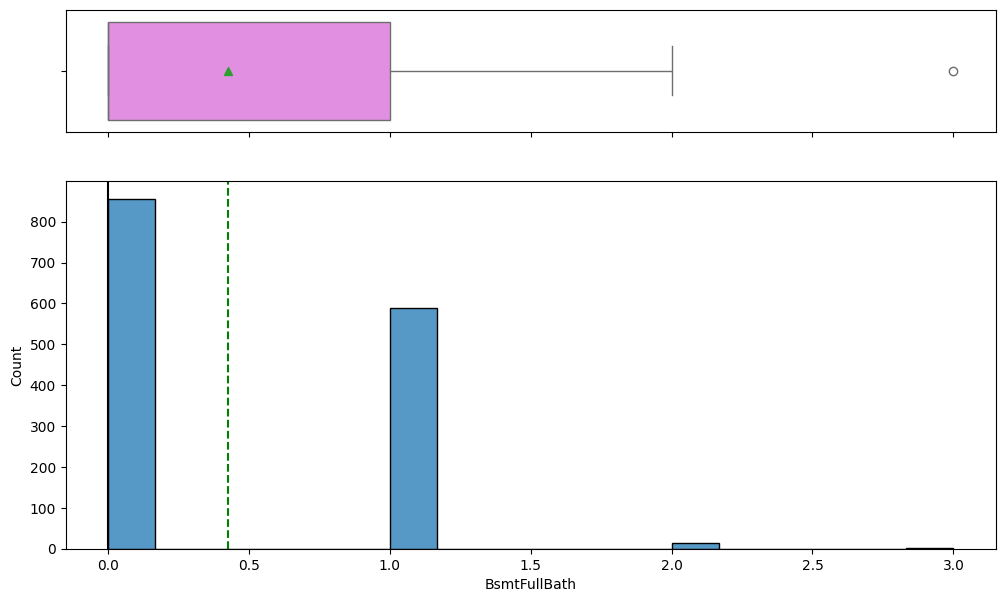

In [ ]:
histogram_boxplot(df_train,'BsmtFullBath')

**1. Histogram Analysis:**
- Very few homes have two or more full bathrooms in the basement, as shown by the much smaller bars at 1.5 and 2.0, indicating that this is less typical.

**2. Boxplot Analysis:**
- The interquartile range is between 0 and 1, showing that while many homes do not have any basement bathrooms, a sizable portion has one.



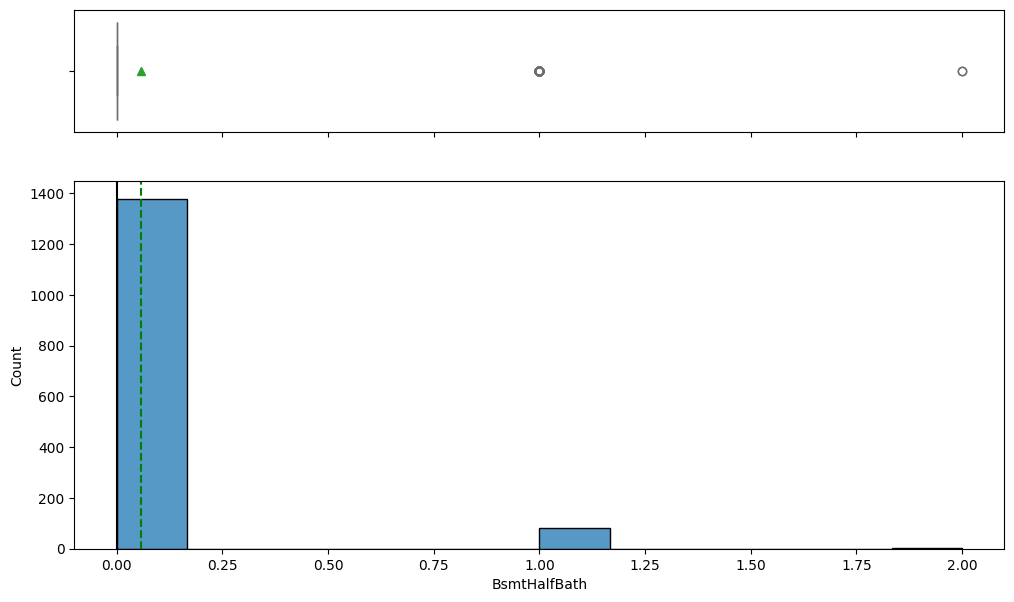

In [ ]:
histogram_boxplot(df_train,'BsmtHalfBath')

**1. Histogram Analysis:**
- There are virtually no homes with more than one half bathroom in the basement, as there are no bars visible beyond the count for one half bathroom.

**2. Boxplot Analysis:**
- The interquartile range is zero, indicating that the majority of the dataset consistently lacks half bathrooms in the basement.

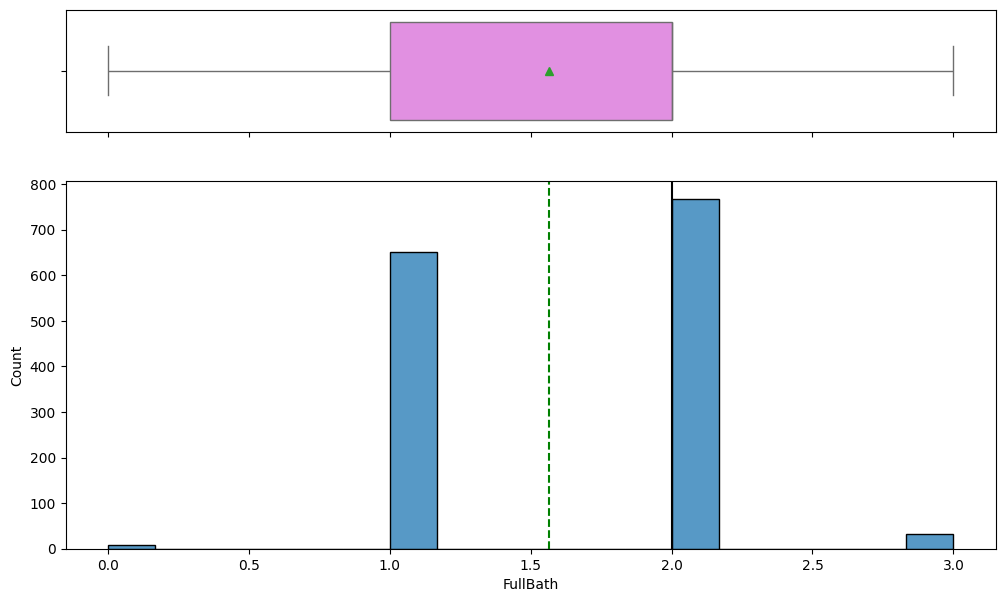

In [ ]:
histogram_boxplot(df_train,'FullBath')

**1. Histogram Analysis:**
- The histogram indicates that very few homes have no full bathrooms, which is typical as most residential properties are expected to have at least one.

**2. Boxplot Analysis:**
- The interquartile range extends from 1 to 2, illustrating that the majority of homes have between one and two full bathrooms.

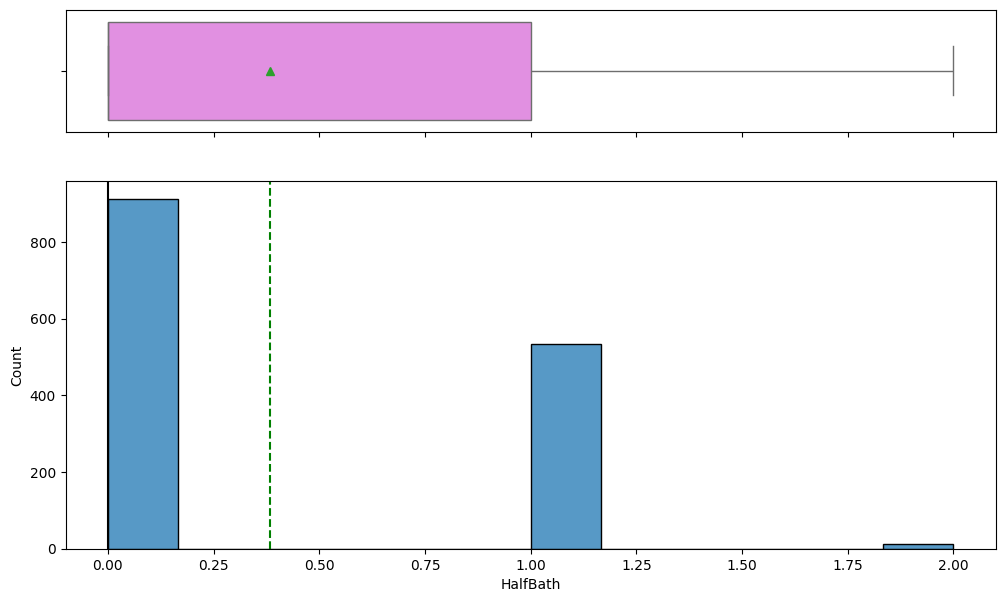

In [ ]:
histogram_boxplot(df_train,'HalfBath')

**1. Histogram Analysis:**
- The histogram shows that a large number of homes, approximately 800, do not have any half bathrooms.

**2. Boxplot Analysis:**
- The interquartile range is concentrated around 0 to 1, reflecting that while many homes do not have a half bathroom, a substantial number have just one.

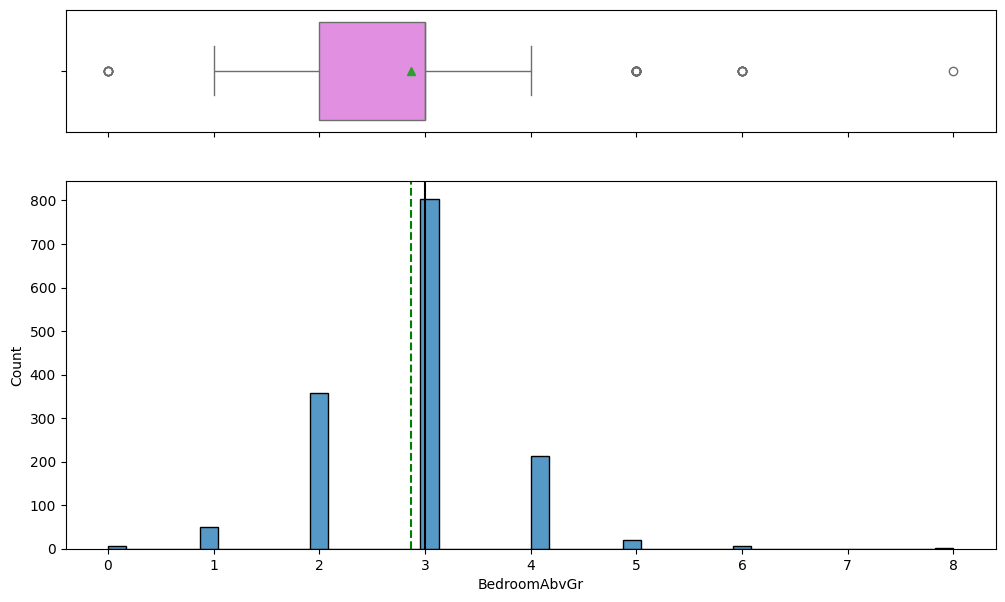

In [ ]:
histogram_boxplot(df_train,'BedroomAbvGr')

**1. Histogram Analysis:**
- The distribution indicates that two, three, and four-bedroom homes cover the majority of the dataset. Homes with one or more than four bedrooms are significantly less common.

**2. Boxplot Analysis:**
- The median number of bedrooms, marked by the green triangle, is three. This confirms that the typical home in the dataset has three bedrooms.



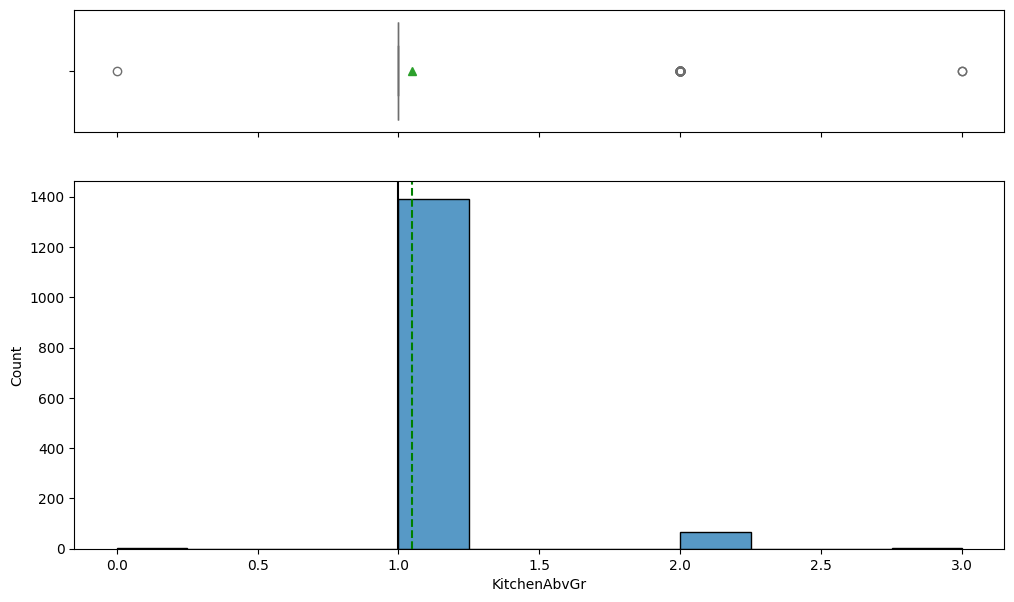

In [ ]:
histogram_boxplot(df_train,'KitchenAbvGr')

**1. Histogram Analysis:**
- The histogram clearly shows that almost all homes in the dataset have one kitchen, as indicated by the towering bar at the count of one. This is typical for residential properties.

**2. Boxplot Analysis:**
- The median number of kitchens, indicated by the green triangle, is one, aligning with the overwhelmingly common design of having a single kitchen in a home.

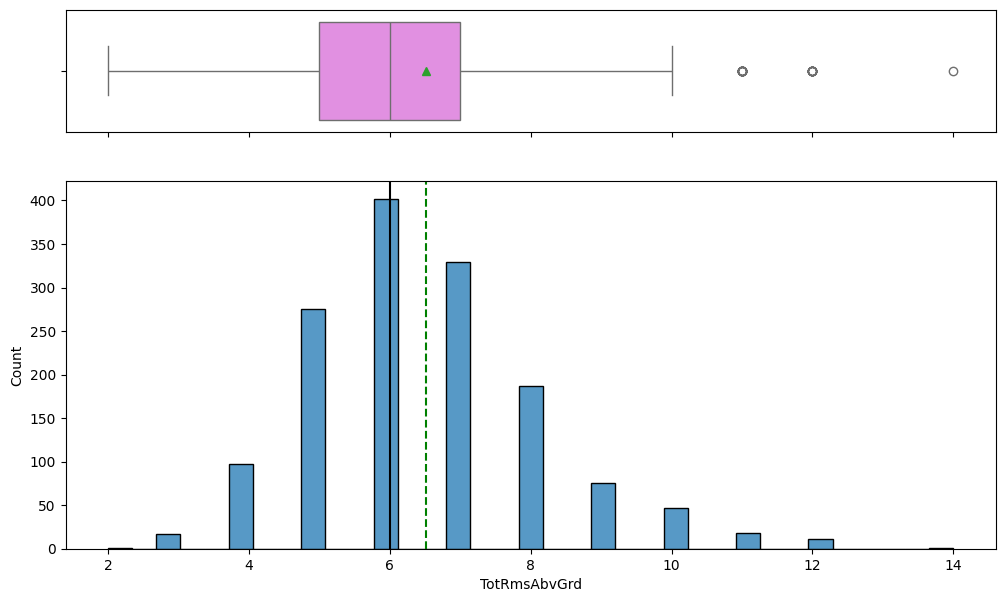

In [ ]:
histogram_boxplot(df_train,'TotRmsAbvGrd')

**1. Histogram Analysis:**
- The histogram shows a wide range of total rooms above grade, with the most common configurations being six and seven rooms, followed closely by homes with eight rooms

**2. Boxplot Analysis:**
- The median number of rooms, indicated by the green triangle in the boxplot, aligns with the peak of the histogram, solidifying that most homes typically have around seven rooms.

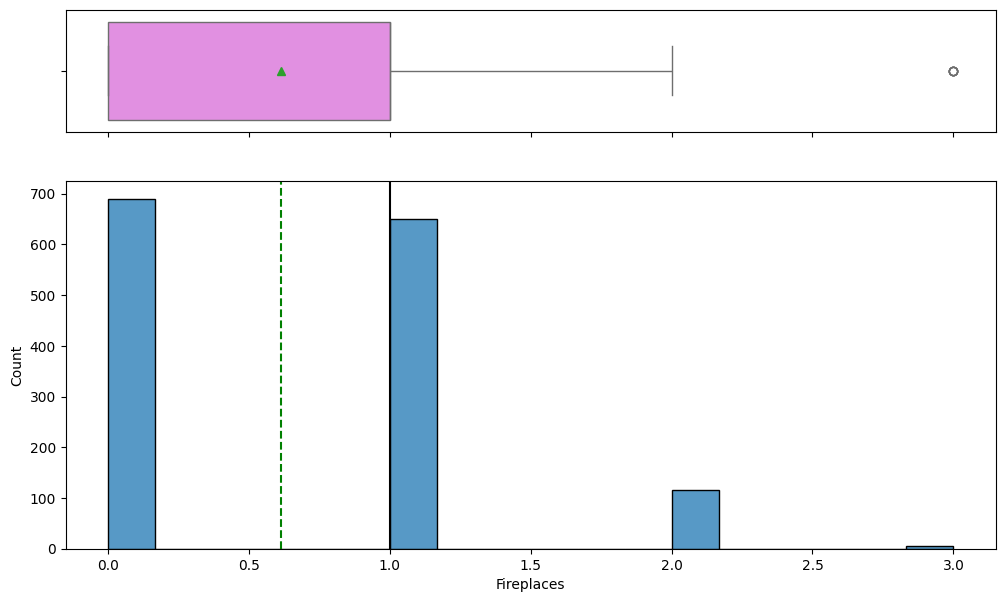

In [ ]:
histogram_boxplot(df_train,'Fireplaces')

**1. Histogram Analysis:**
- The histogram reveals that a large number of homes, around 700, have no fireplaces. This suggests that fireplaces may be considered a luxury rather than a standard feature in these homes.

**2. Boxplot Analysis:**
- The median number of fireplaces, represented by the green triangle in the boxplot, is one, suggesting that the typical home among those that have fireplaces is likely to have just one.

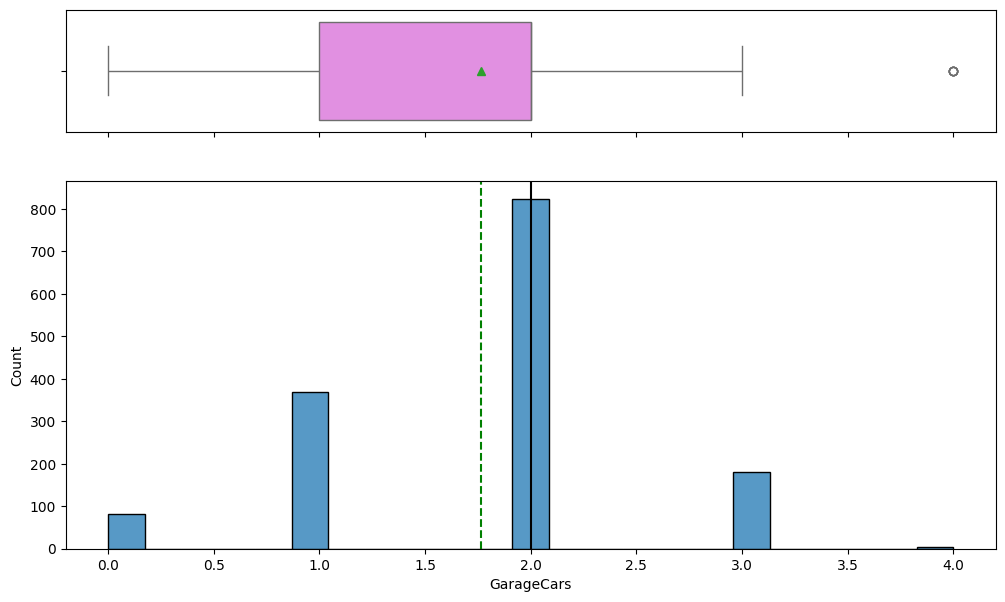

In [ ]:
histogram_boxplot(df_train,'GarageCars')

**1. Histogram Analysis:**
- The histogram shows that very few homes have no garage space (0 cars).
- The majority of homes can accommodate two cars, making this the most common garage size.
- Homes with space for one car are also prevalent, though less common than those for two cars.

**2. Boxplot Analysis:**
- The median number of cars that can be accommodated in garages, marked by the green triangle, is two, confirming that two-car garages are typical for most homes in the dataset.
- The interquartile range extends primarily between two and three, showing that most homes have garages sized to fit two to three cars.

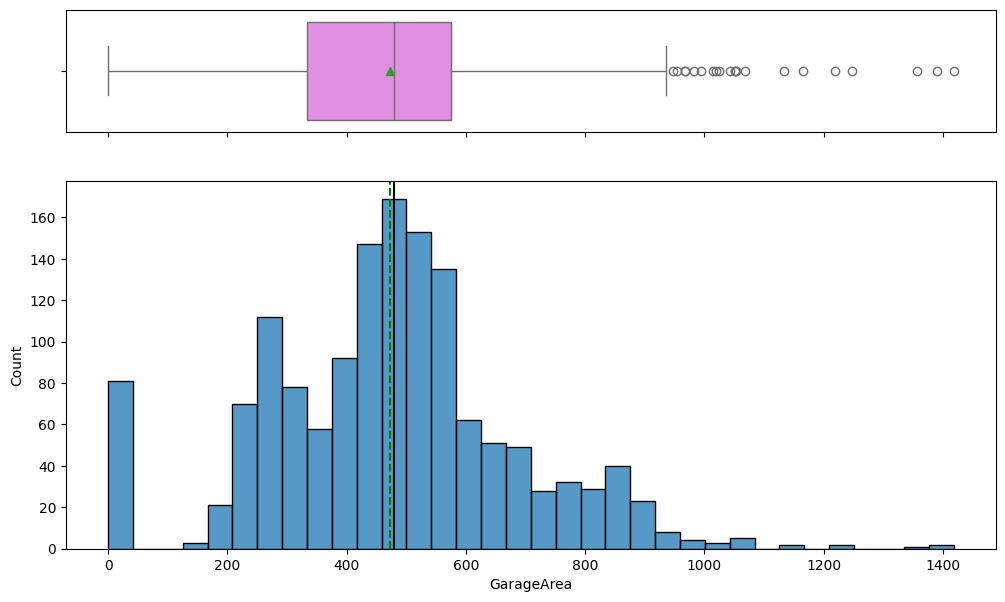

In [ ]:
histogram_boxplot(df_train,'GarageArea')

**1. Histogram Analysis:**
- The distribution peaks around 400 to 600 square feet, which likely corresponds to the typical two-car garage size prevalent among residential properties.

**2. Boxplot Analysis:**
- The interquartile range spans from about 300 to 700 square feet, illustrating that while there is variability, most homes have garage sizes within this range.

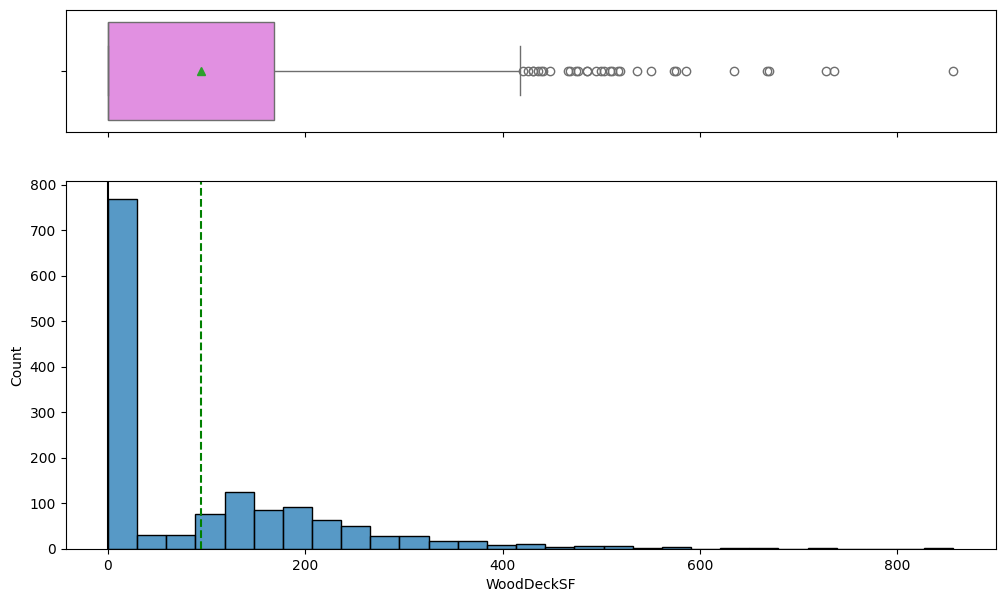

In [ ]:
histogram_boxplot(df_train,'WoodDeckSF')

**1. Histogram Analysis:**
- A significant number of homes, around 700, have no wood deck area, as shown by the large bar at zero. This indicates that having a wood deck is not a standard feature in all homes.
- For homes that do have wood decks, the most common deck sizes range from about 100 to 300 square feet, as evidenced by the decreasing height of the bars as the deck size increases.

**2. Boxplot Analysis**
- The median WoodDeckSF, indicated by the green triangle, is quite low, underscoring that the typical home either has a small deck or none at all.

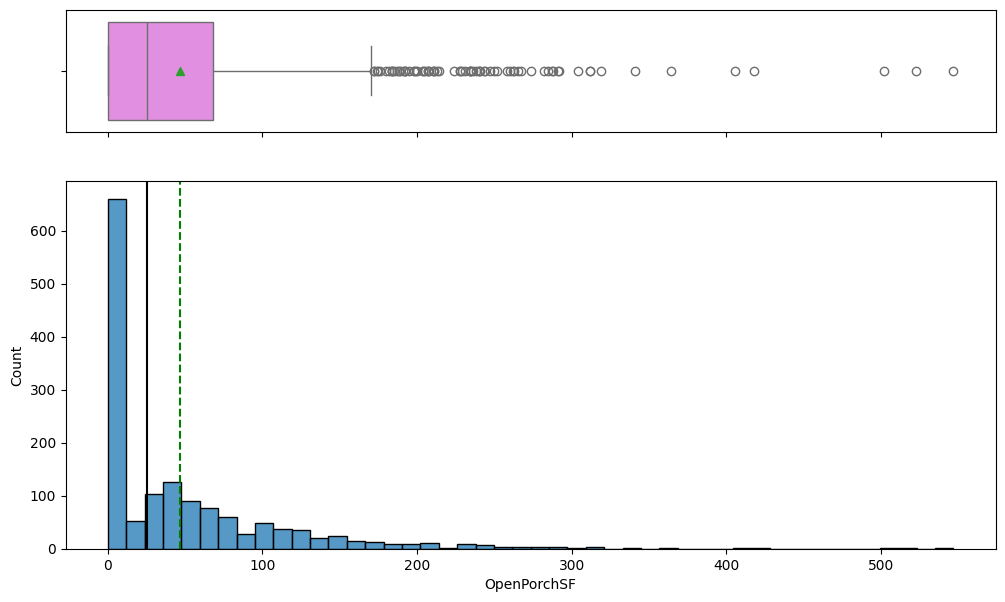

In [ ]:
histogram_boxplot(df_train,'OpenPorchSF')

**1. Histogram Analysis:**
- The histogram reveals that a significant number of homes, around 600, have no open porch area, suggesting that open porches are not standard in all homes.

**2. Boxplot Analysis:**
- The interquartile range is tight, focused on the lower end of the scale, underscoring that most porches, where present, are modest in size.

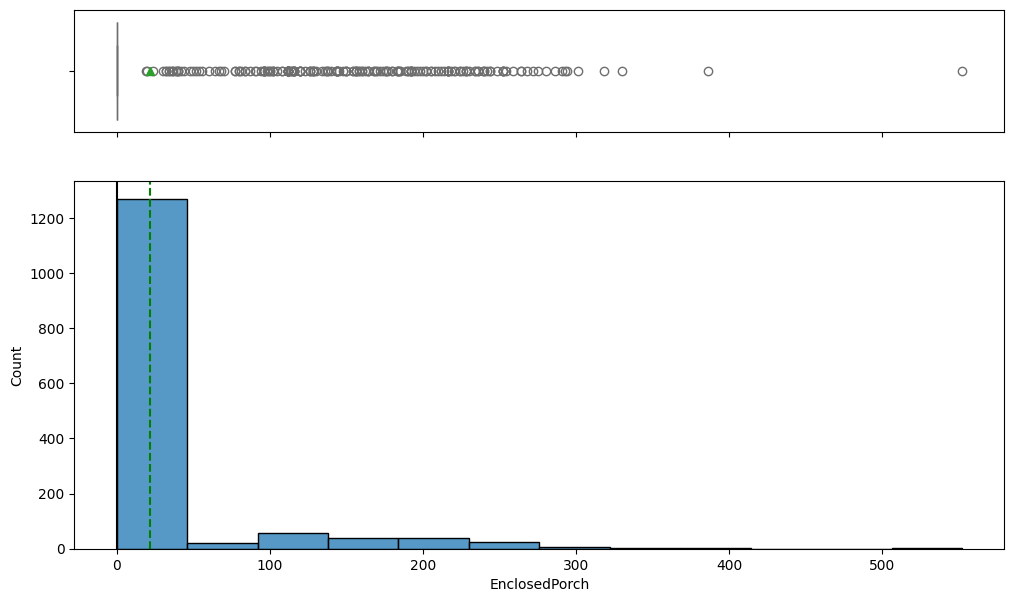

In [ ]:
histogram_boxplot(df_train,'EnclosedPorch')

**1. Histogram Analysis:**
- A significant majority of homes, over 1000, do not have an enclosed porch, as indicated by the tall bar at zero. This suggests that enclosed porches are not a standard feature in most homes.

**2. Boxplot Analysis:**
- The interquartile range is very narrow and close to zero, reflecting that enclosed porches, when present, are usually quite small.

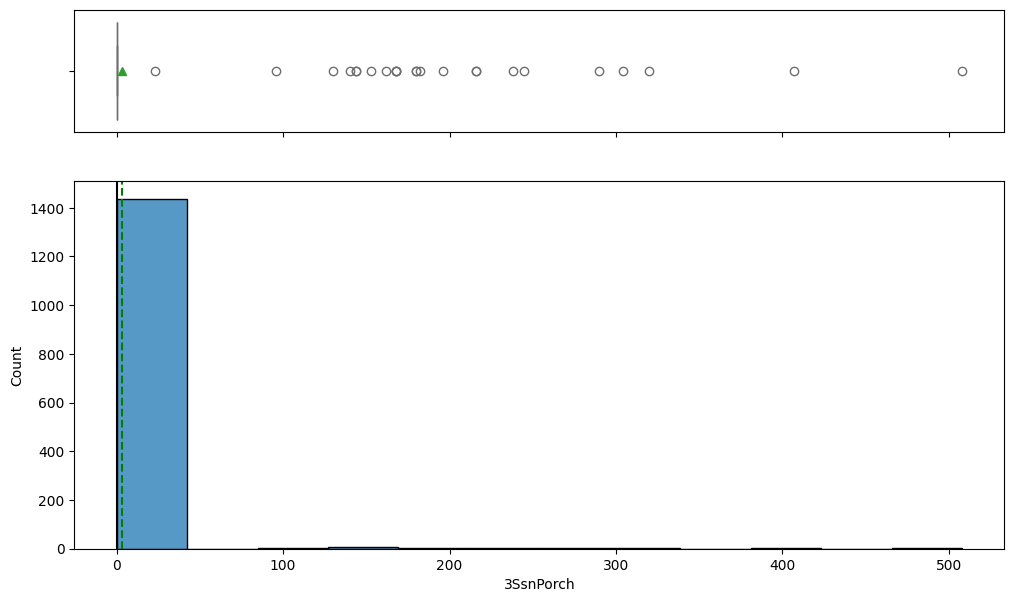

In [ ]:
histogram_boxplot(df_train,'3SsnPorch')

**1. Histogram Analysis:**
- For the few homes that do have three-season porches, the sizes are generally very small, rarely exceeding 100 square feet. This indicates that when present, three-season porches are typically modest in size.

**2. Boxplot Analysis:**
- The interquartile range is zero, concentrated entirely on homes without a three-season porch, further emphasizing the rarity of this feature.

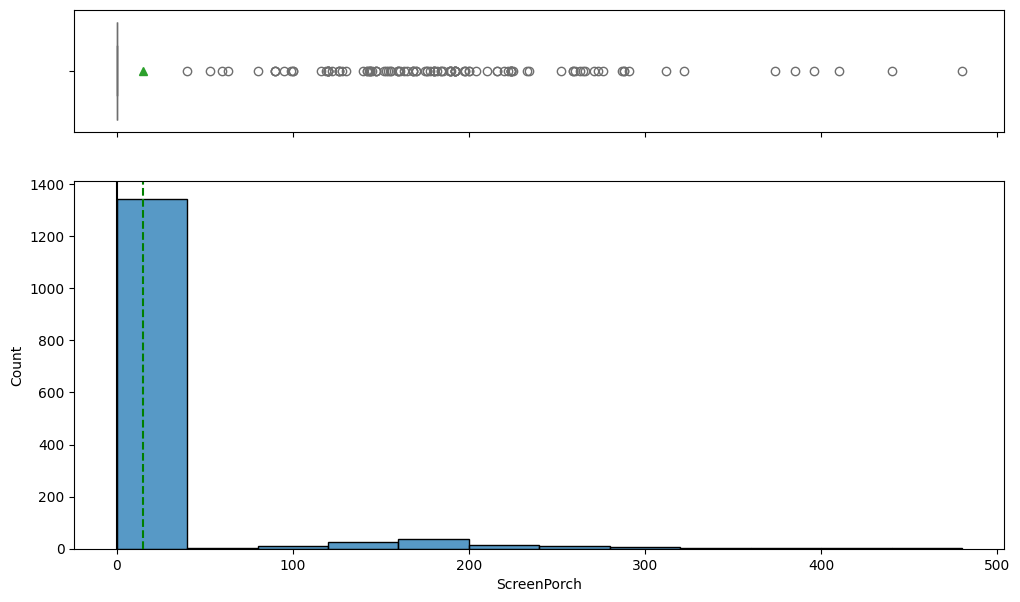

In [ ]:
histogram_boxplot(df_train,'ScreenPorch')

**1.Histogram Analysis:**
- The histogram displays that a vast majority of homes, well over 1000, do not have a screened porch, as indicated by the towering bar at zero square feet. This suggests that screened porches are not a common feature in most homes.

**2. Boxplot Analysis:**
- The median ScreenPorch size, denoted by the green triangle, is zero, confirming that the typical home in this dataset does not include a screened porch.

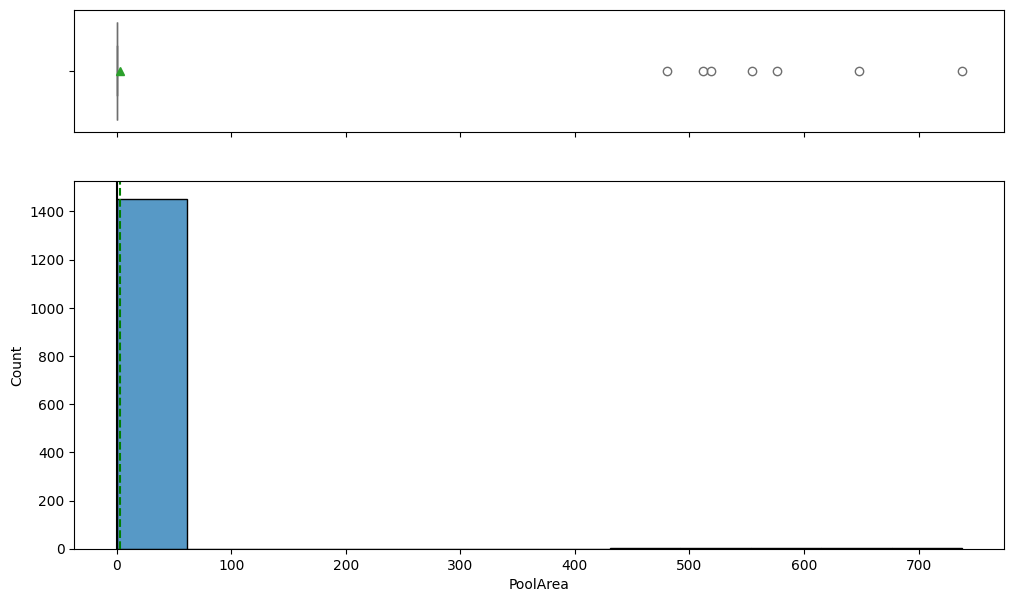

In [ ]:
histogram_boxplot(df_train,'PoolArea')

**1. Histogram Analysis:**
- The histogram indicates that the overwhelming majority of homes, nearly all in the dataset, do not have a pool, as evidenced by the tall bar at zero square feet. This suggests that pools are not a common feature in most homes.

**2. Boxplot Analysis:**
- The interquartile range is zero, centered entirely on homes without a pool, underscoring the rarity of this feature.
- The lack of visible outliers suggests that there are no extreme values or unusually large pools within the dataset, although the tail on the histogram might suggest a few homes with larger pools.

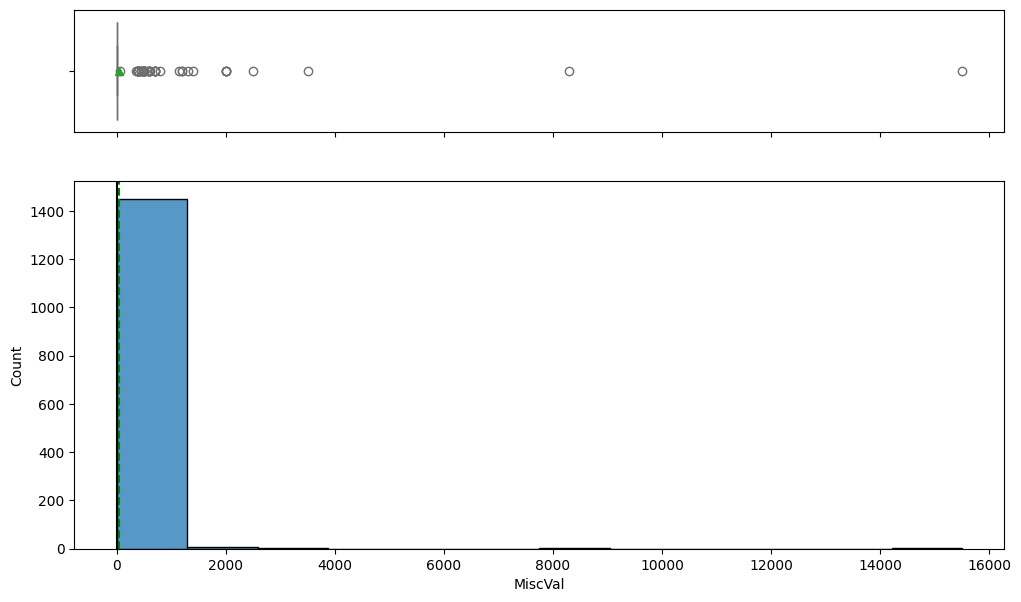

In [ ]:
histogram_boxplot(df_train,'MiscVal')

**1. Histogram Analysis:**
- The histogram demonstrates that a vast majority of homes, nearly all in the dataset, have no miscellaneous value, with the bar at zero towering over others. This indicates that miscellaneous features that add measurable value are rare in most homes.

**2. Boxplot Analysis:**
-The interquartile range is zero, concentrated entirely on homes without any miscellaneous value, reinforcing the rarity of this feature.

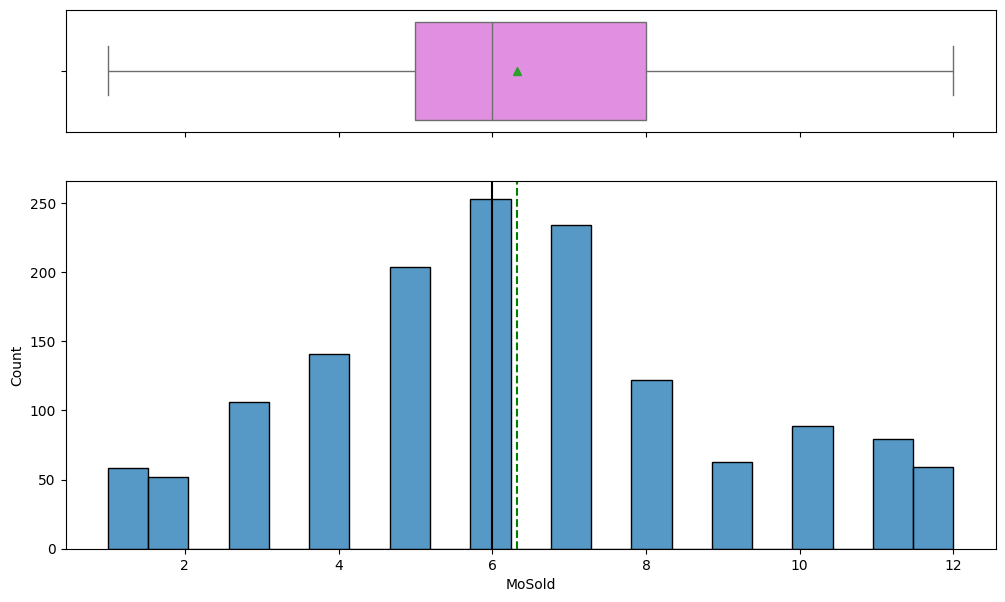

In [ ]:
histogram_boxplot(df_train,'MoSold')

**1. Histogram Analysis:**
- The histogram shows that house sales are relatively well-distributed across the months, with no single month dominating the dataset.

**2. Boxplot Analysis:**
- The interquartile range spans from March to August, indicating that a significant number of house sales occur during the spring and summer months.

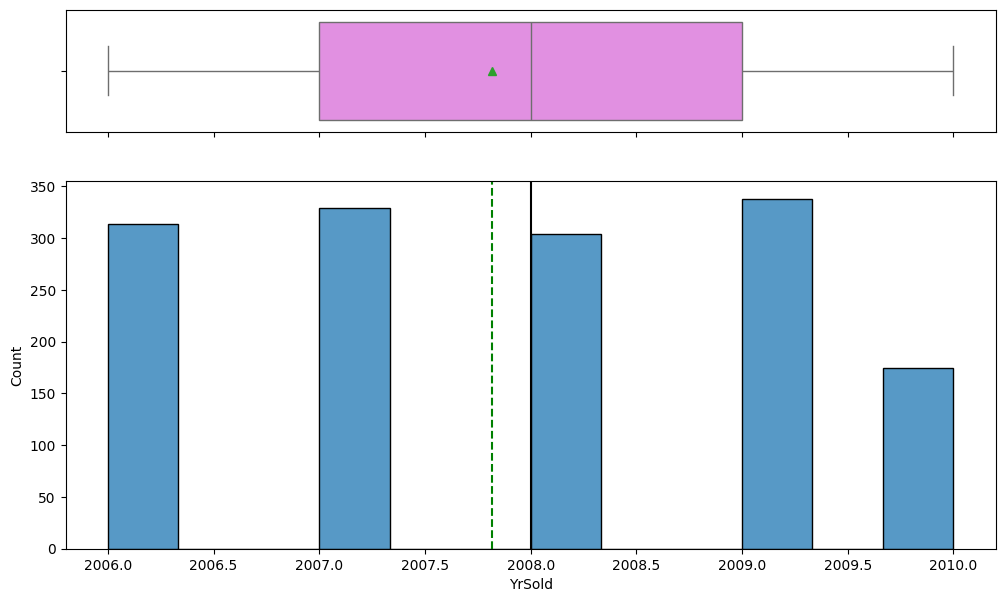

In [ ]:
histogram_boxplot(df_train,'YrSold')

**1. Histogram Analysis:**
- The histogram shows that house sales are spread across the years from 2006 to 2010, with a fairly even distribution of sales each year.

**2. Boxplot Analysis:**
- The interquartile range spans from 2007 to 2009, highlighting that a significant portion of the sales occurred within these three years.

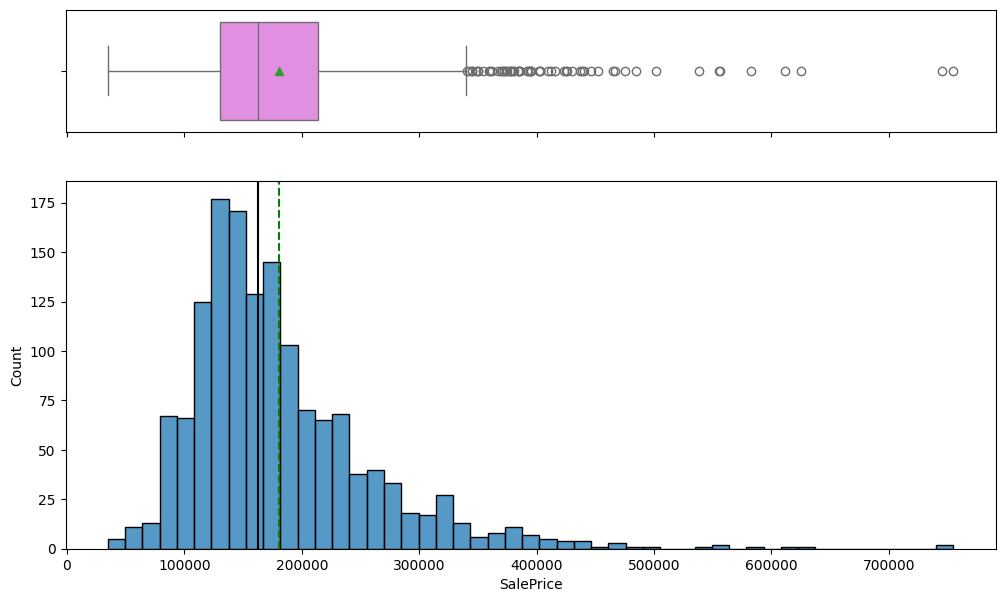

In [ ]:
histogram_boxplot(df_train,'SalePrice')

- A right-skewed distribution with most house prices clustered between $100,000 and $300,000.
- The boxplot also highlights a compact interquartile range, suggesting that the middle 50% of house prices are closely grouped, with several high-price outliers evident on the right.

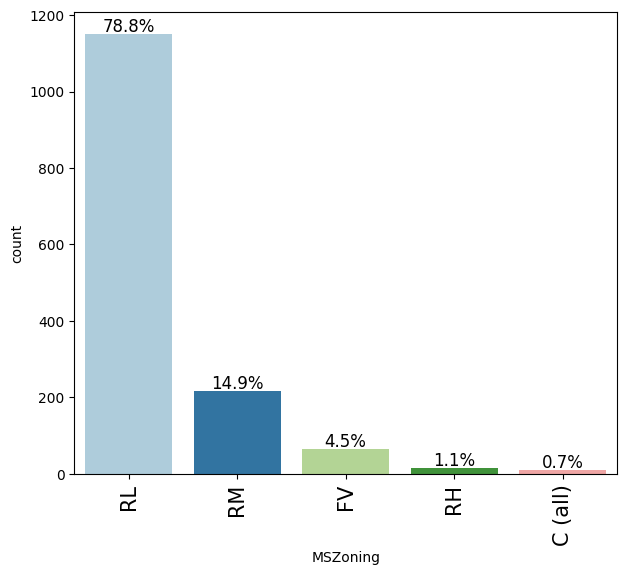

In [ ]:
labeled_barplot(df_train, 'MSZoning',perc=True)

-  78.8%, fall under the RL (Residential Low Density) zoning category, followed by 14.9% in RM (Residential Medium Density).
- (Floating Village Residential) at 4.5%
- (Residential High Density) at 1.1%, and C (all) (Commercial) at 0.7%

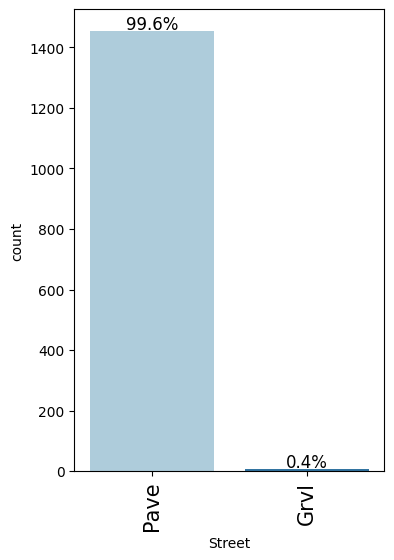

In [ ]:
labeled_barplot(df_train, 'Street',perc=True)

* 99.6%, are located on paved streets (Pave)
* Only a very small fraction, 0.4%, are on gravel streets (Grvl).

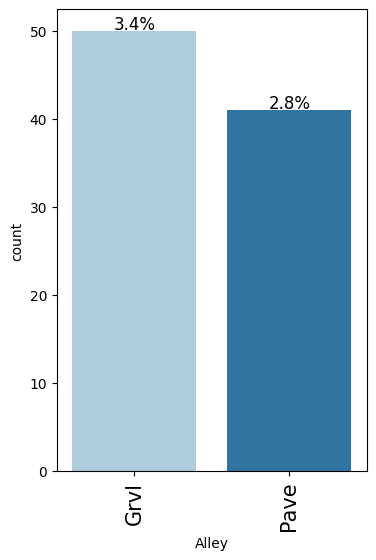

In [ ]:
labeled_barplot(df_train, 'Alley',perc=True)

* 3.4% of the properties have gravel alleys (Grvl).
* 2.8% have paved alleys (Pave).

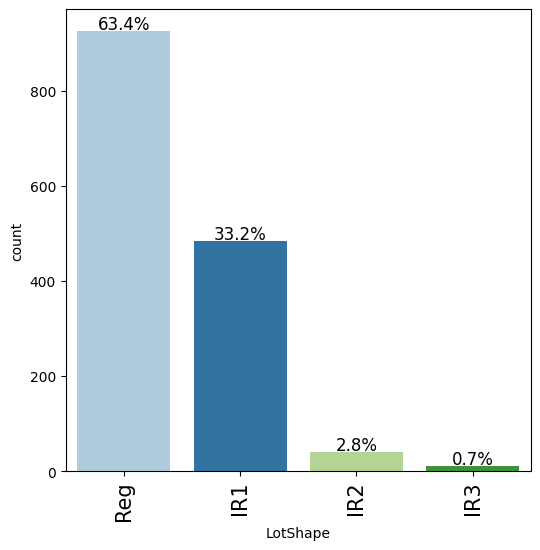

In [ ]:
labeled_barplot(df_train, 'LotShape',perc=True)

 * the majority of properties (63.4%) have a regular lot shape (Reg).
 * followed by 33.2% with an irregular but slightly more regular shape (IR1).
 * The remaining properties have more irregular lot shapes, with 2.8% categorized as IR2 and only 0.7% as IR3.

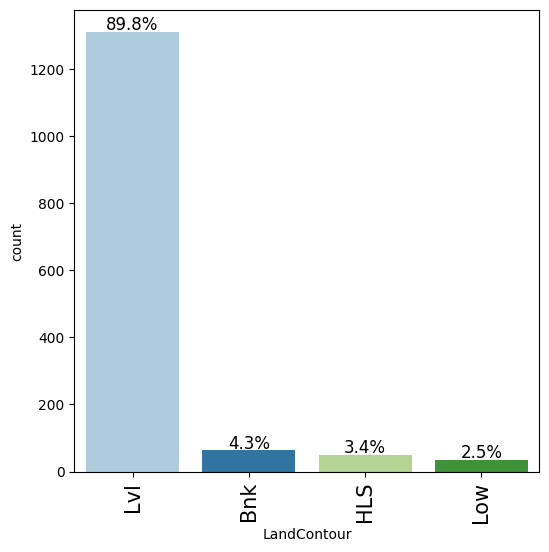

In [ ]:
labeled_barplot(df_train,'LandContour',perc=True)

* (89.8%) are situated on level land (Lvl).
* 4.3% of properties on banked land (Bnk), 3.4% on hills (HLS), and 2.5% on low land (Low).

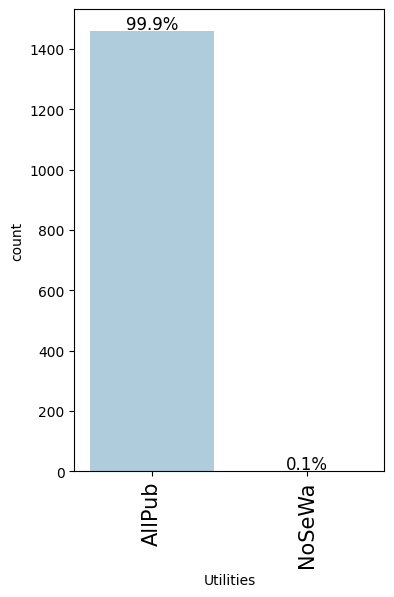

In [ ]:
labeled_barplot(df_train,'Utilities',perc=True)

* The bar chart for Utilities indicates that almost all properties (99.9%) have access to public utilities (AllPub), with a minuscule fraction (0.1%) lacking sewer and water services (NoSeWa).

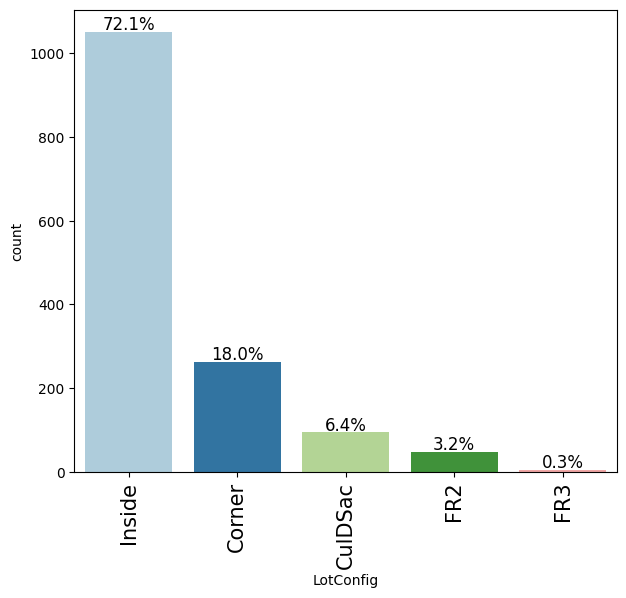

In [ ]:
labeled_barplot(df_train,'LotConfig',perc=True)

* (72.1%) are situated on inside lots.
* followed by 18.0% on corner lots.
* Cul-de-sac locations account for 6.4% of properties.
* other configurations such as FR2 (3.2%) and FR3 (0.3%) are much less common.

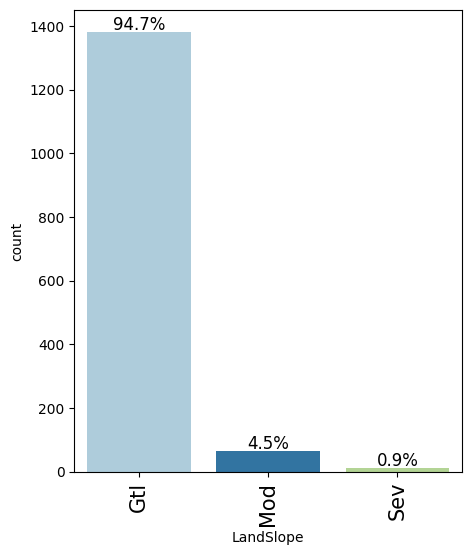

In [ ]:
labeled_barplot(df_train,'LandSlope',perc=True)

*  Majority of properties (94.7%) are situated on gentle slopes.
* While a smaller proportion (4.5%) are on moderately sloped land, and an even smaller fraction (0.9%) are on severely sloped land.

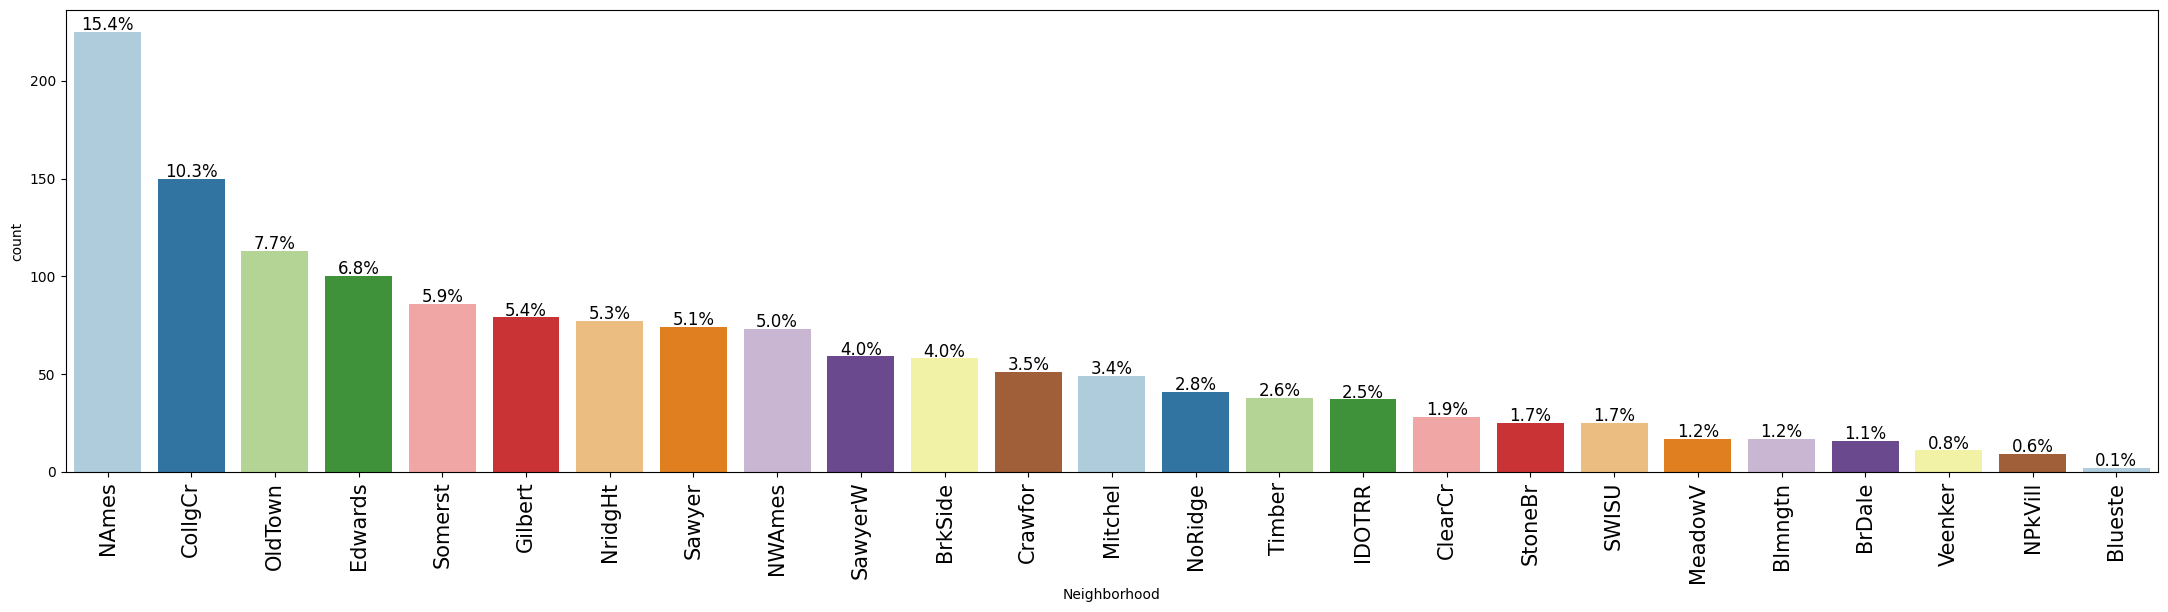

In [ ]:
labeled_barplot(df_train,'Neighborhood',perc=True)

*  The largest percentage of properties is in the NAmes neighborhood (15.4%).
* Followed by CollgCr (10.3%), and OldTown (7.7%).
* Other neighborhoods like Edwards (6.8%), Somerst (5.9%), and NridgHt (5.3%) also have a significant number of properties.
* Several neighborhoods have smaller proportions, such as Blmngtn (1.2%), Veenker (0.8%), and Blueste (0.1%).

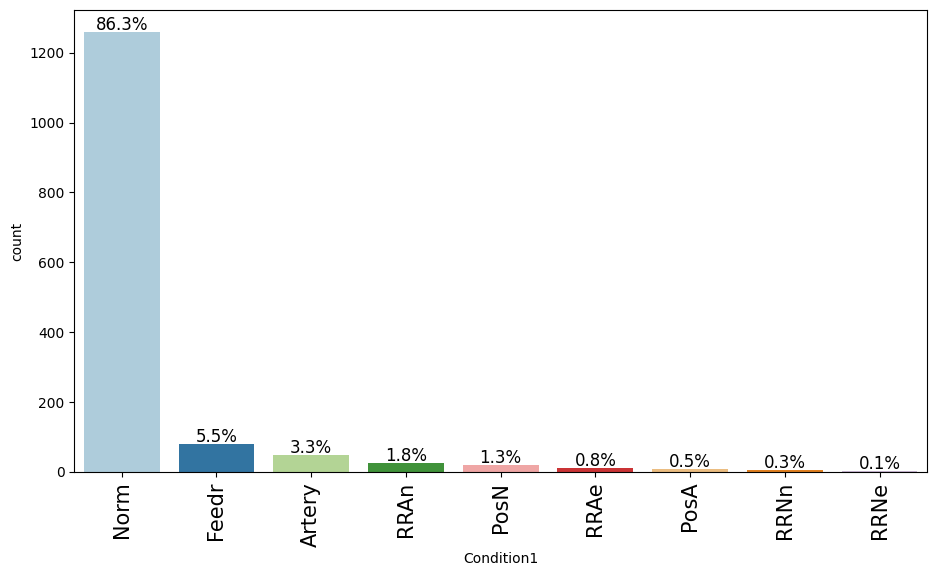

In [ ]:
labeled_barplot(df_train,'Condition1',perc=True)

* The bar chart indicates that the majority of properties (86.3%) are in a "Norm" condition.
* followed by a smaller percentage in "Feedr" (5.5%) and "Artery" (3.3%).
* The remaining categories, such as "RRAn" (1.8%), "PosN" (1.3%), "RRAe" (0.8%), "PosA" (0.5%), "RRNn" (0.3%), and "RRNe" (0.1%), represent a much smaller portion of the properties.

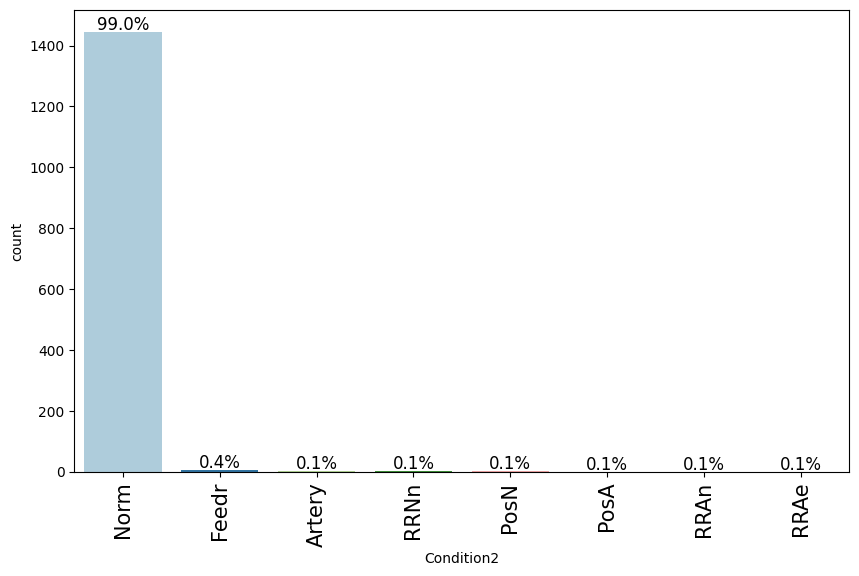

In [ ]:
labeled_barplot(df_train,'Condition2',perc=True)

* The bar chart shows that an overwhelming majority of properties (99.0%) are classified as "Norm" under Condition2.
* With very few properties in other categories such as "Feedr" (0.4%), and each of the categories "Artery," "RRNn," "PosN," "PosA," "RRAn," and "RRAe" each representing 0.1%.

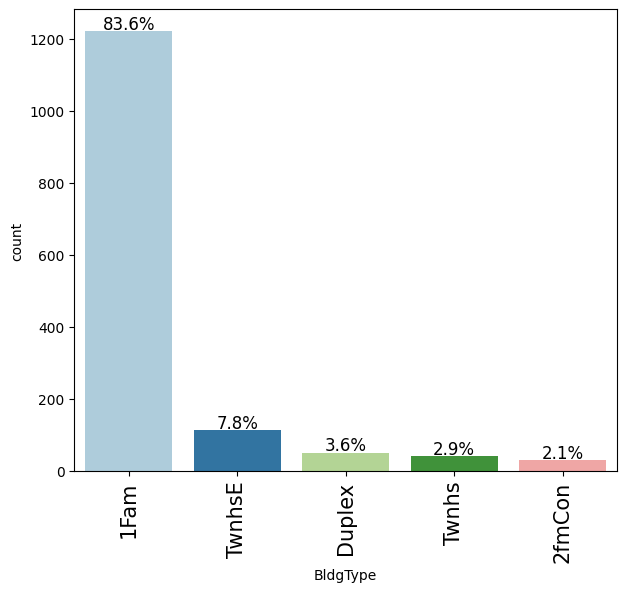

In [ ]:
labeled_barplot(df_train,'BldgType',perc=True)

* The majority of buildings are of the type "1Fam" (83.6%), indicating single-family homes dominate the dataset.
*  Other building types include "TwnhsE" (7.8%), "Duplex" (3.6%), "Twnhs" (2.9%), and "2fmCon" (2.1%).

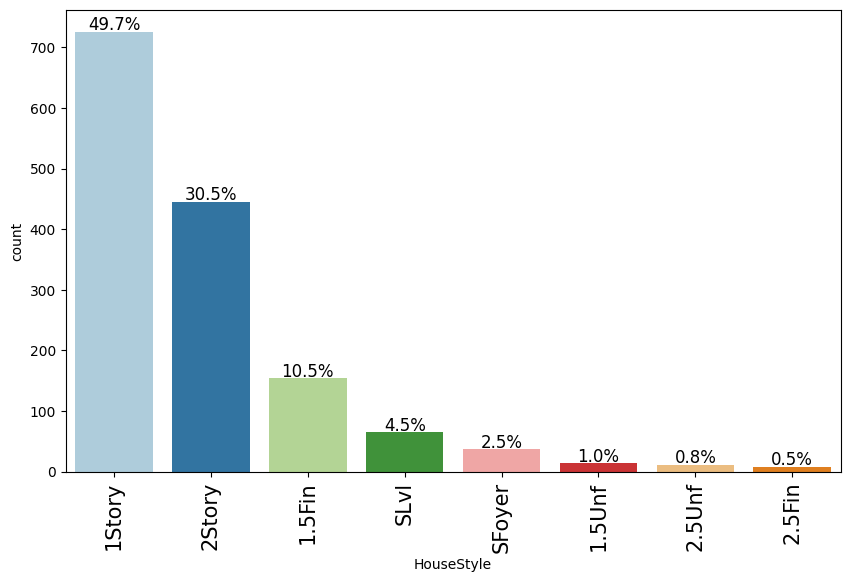

In [ ]:
labeled_barplot(df_train,'HouseStyle',perc=True)

* The most common house style is "1Story" (49.7%).
* Followed by "2Story" (30.5%) and "1.5Fin" (10.5%).
* Other styles include "SLvl" (4.5%), "SFoyer" (2.5%), "1.5Unf" (1.0%), "2.5Unf" (0.8%), and "2.5Fin" (0.5%).

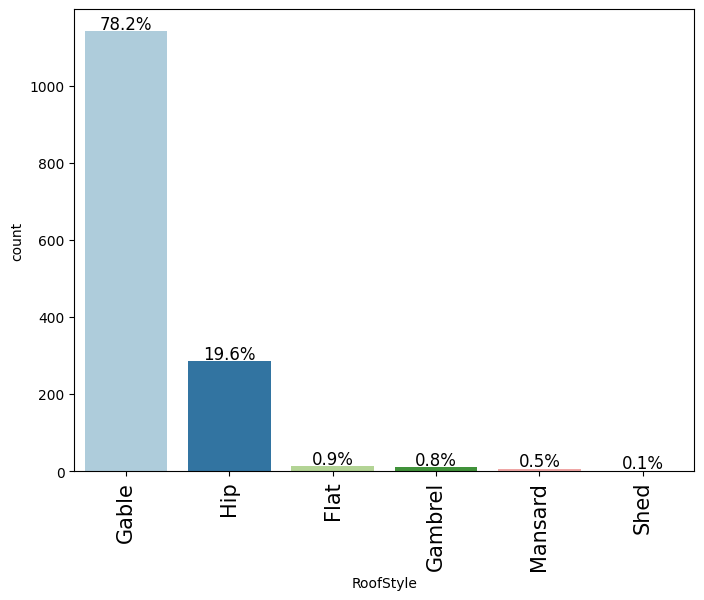

In [ ]:
labeled_barplot(df_train,'RoofStyle',perc=True)

* The majority of houses have a "Gable" roof style, making up 78.2% of the total.
* Followed by "Hip" roof styles at 19.6%.
* Other roof styles include "Flat" (0.9%), "Gambrel" (0.8%), "Mansard" (0.5%), and "Shed" (0.1%).

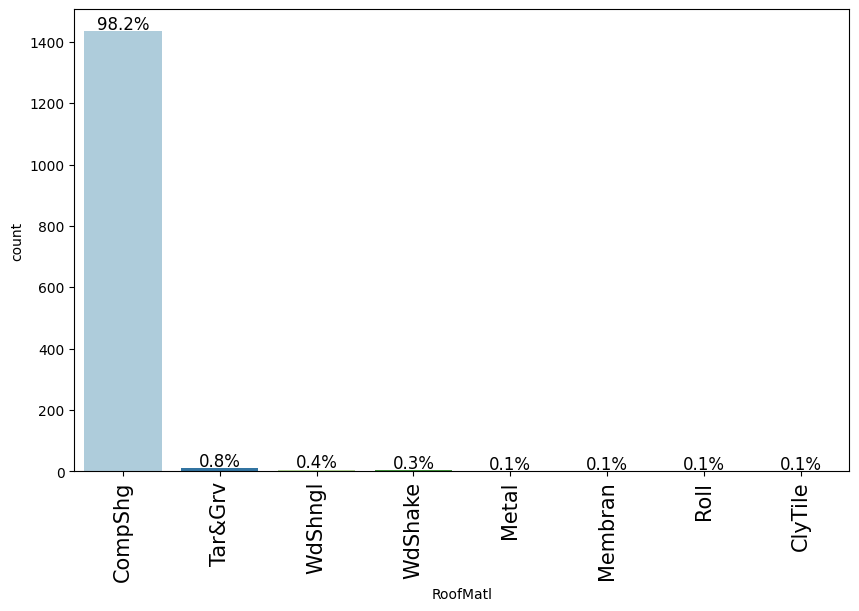

In [ ]:
labeled_barplot(df_train,'RoofMatl',perc=True)

* "CompShg" (Composition Shingle) roofs, which constitute 98.2% of the total.
* Other roof materials are much less common, with "Tar&Grv" (Tar and Gravel) at 0.8%, "WdShngl" (Wood Shingle) at 0.4%, and "WdShake" (Wood Shake) at 0.3%. Less than 0.1% of the roofs are made from materials such as "Metal," "Membran," "Roll," and "ClyTile" (Clay Tile).

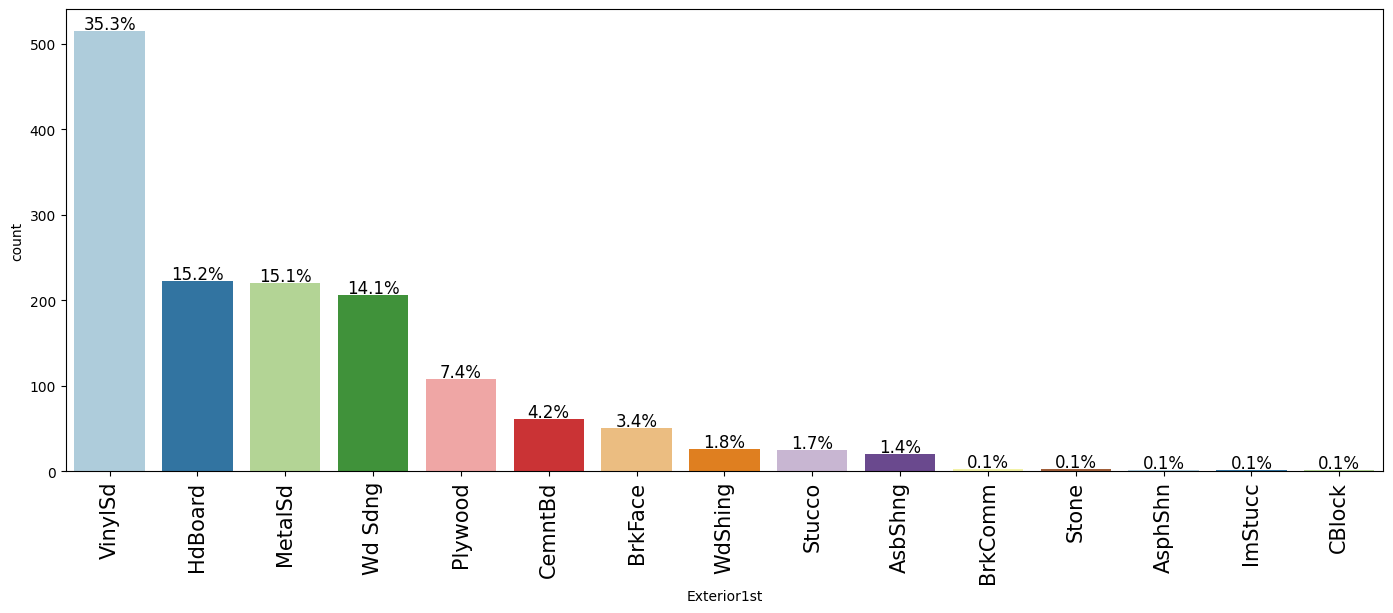

In [ ]:
labeled_barplot(df_train,'Exterior1st',perc=True)

* (Vinyl Siding) is the most common material, used in 35.3% of the homes.
* Other popular materials include "HdBoard" (Hardboard) and "MetalSd" (Metal Siding), each making up 15.2% and 15.1%, respectively.
* followed by "Wd Sdng" (Wood Siding) at 14.1%. "Plywood" is used in 7.4% of the homes.
* "CemntBd" (Cement Board) and "BrkFace" (Brick Face) account for 4.2% and 3.4% respectively.
* Less common materials include "WdShing" (Wood Shingle) at 1.8%, "Stucco" at 1.7%, and "AsbShng" (Asbestos Shingle) at 1.4%. Materials such as "BrkComm" (Brick Common), "Stone," "AsphShn" (Asphalt Shingle), "ImStucc" (Imitation Stucco), and "CBlock" (Concrete Block) each make up 0.1% of the total.

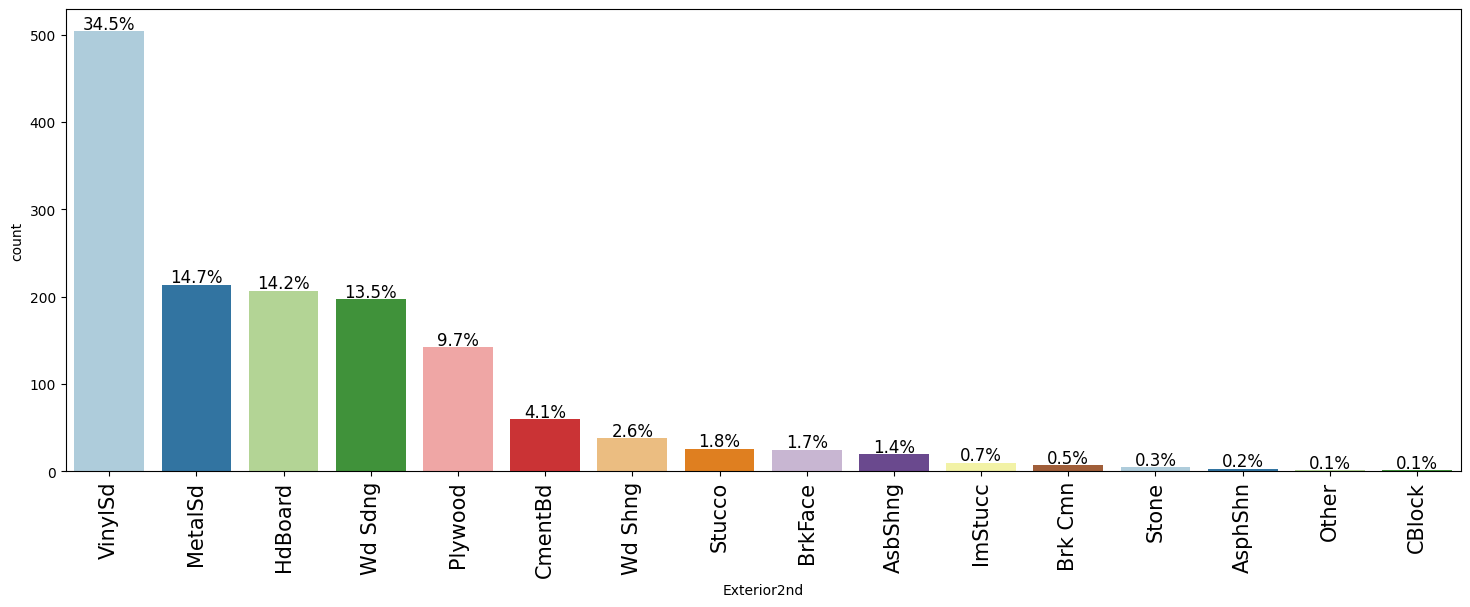

In [ ]:
labeled_barplot(df_train,'Exterior2nd',perc=True)

* "VinylSd" (Vinyl Siding) is the most common, used in 34.5% of the homes.
* Other popular materials include "MetalSd" (Metal Siding) at 14.7%, "HdBoard" (Hardboard) at 14.2%, and "Wd Sdng" (Wood Siding) at 13.5%. "Plywood" is used in 9.7% of the homes.
* "CemntBd" (Cement Board) accounts for 4.1%.
* Less common materials include "Wd Shng" (Wood Shingle) at 2.6%, "Stucco" at 1.8%, "BrkFace" (Brick Face) at 1.7%, and "AsbShng" (Asbestos Shingle) at 1.4%.
* Other materials like "ImStucc" (Imitation Stucco), "Brk Cmn" (Brick Common), "Stone," "AsphShn" (Asphalt Shingle), and "CBlock" (Concrete Block) each make up less than 1% of the total.

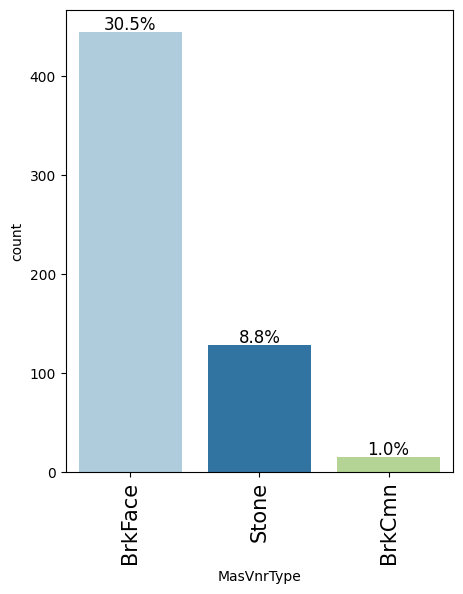

In [ ]:
labeled_barplot(df_train,'MasVnrType',perc=True)

* The most common masonry veneer type in homes is "BrkFace" (Brick Face), accounting for 30.5% of the total.
*  "Stone" is used in 8.8% of homes, while "BrkCmn" (Brick Common) is present in only 1% of homes.

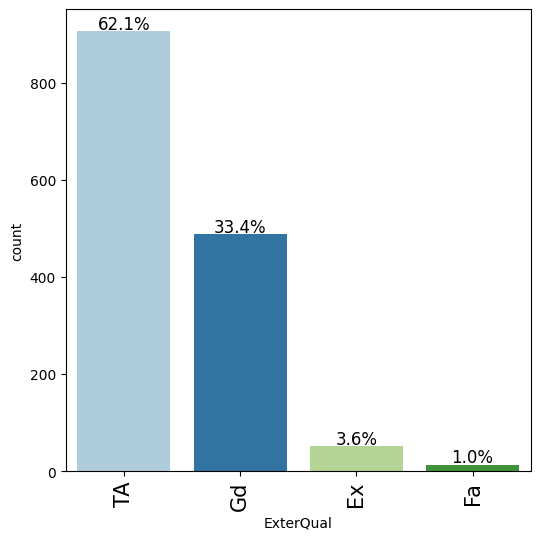

In [ ]:
labeled_barplot(df_train,'ExterQual',perc=True)

* The majority of homes have an exterior quality rated as "TA" (Typical/Average) at 62.1%.
* followed by "Gd" (Good) at 33.4%.
* A smaller percentage of homes have an "Ex" (Excellent) rating at 3.6%, and "Fa" (Fair) at 1.0%.

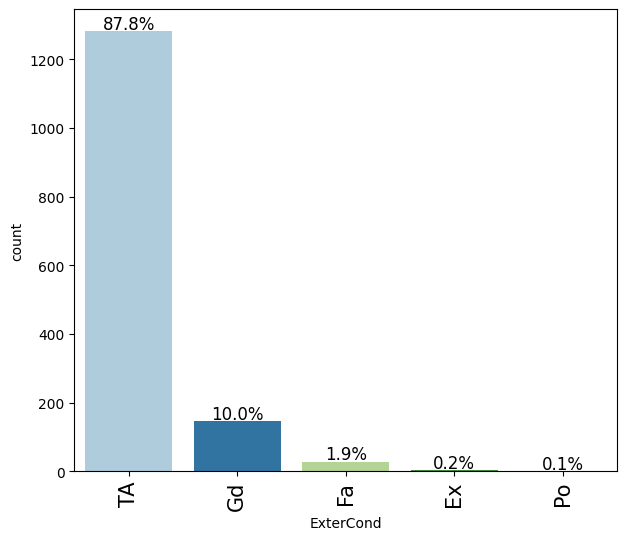

In [ ]:
labeled_barplot(df_train,'ExterCond',perc=True)

* Most homes have an exterior condition rated as "TA" (Typical/Average) at 87.8%.
* followed by "Gd" (Good) at 10.0%.
* A smaller percentage of homes are rated "Fa" (Fair) at 1.9%, "Ex" (Excellent) at 0.2%, and "Po" (Poor) at 0.1%.

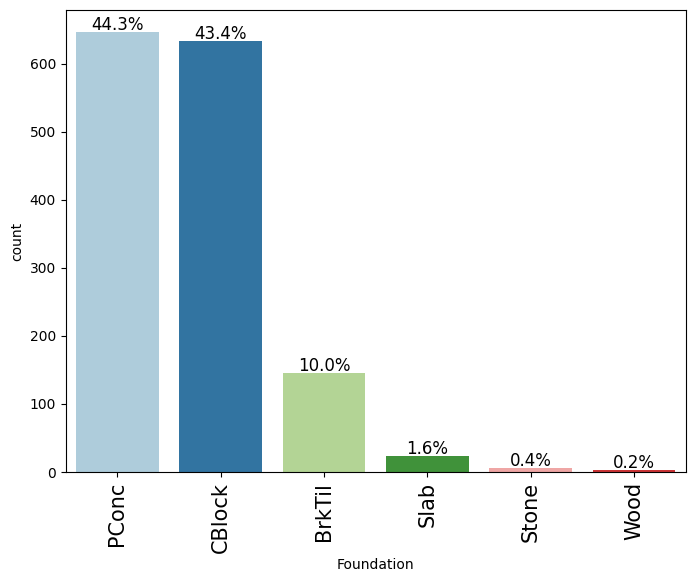

In [ ]:
labeled_barplot(df_train,'Foundation',perc=True)

* The majority of homes have either Poured Concrete (44.3%) or Cinder Block (43.4%) foundations.
* A smaller percentage use Brick & Tile (10.0%), with Slab (1.6%), Stone (0.4%), and Wood (0.2%) being the least common.



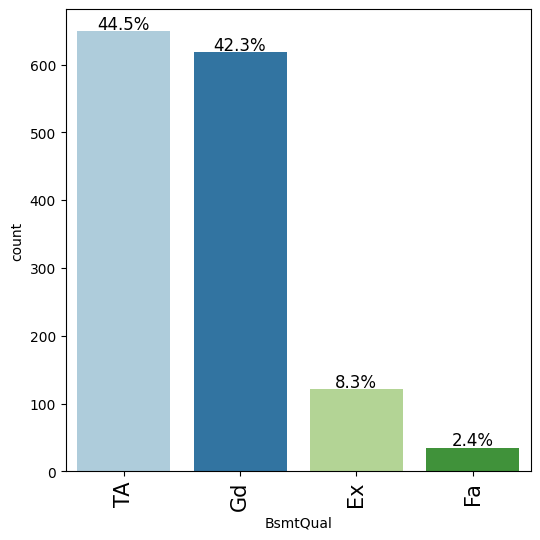

In [ ]:
labeled_barplot(df_train,'BsmtQual',perc=True)

* The majority of homes have a basement quality in typical condition (TA) at 44.5%, followed closely by good condition (Gd) at 42.3%.
* Excellent condition (Ex) accounts for 8.3%, while fair condition (Fa) makes up 2.4%.

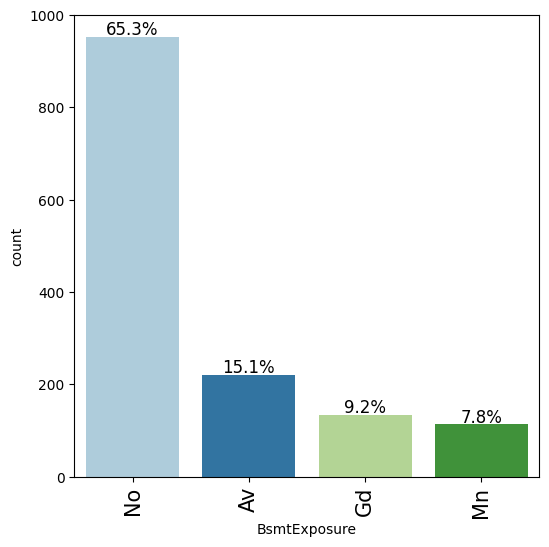

In [ ]:
labeled_barplot(df_train,'BsmtExposure',perc=True)

* The majority of homes (65.3%) do not have basement exposure, while 15.1% have average exposure.
* Good exposure is seen in 9.2% of homes, and 7.8% have minimal exposure.

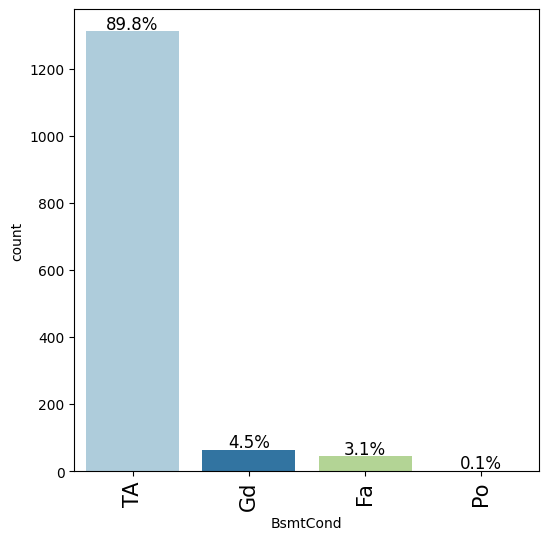

In [ ]:
labeled_barplot(df_train,'BsmtCond',perc=True)

* The vast majority of homes have a basement in typical condition (TA) at 89.8%, followed by good condition (Gd) at 4.5%, fair condition (Fa) at 3.1%, and poor condition (Po) at 0.1%.

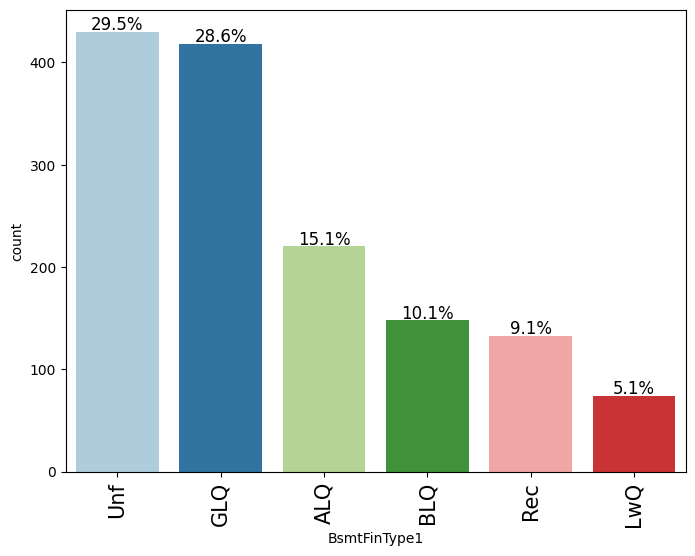

In [ ]:
labeled_barplot(df_train,'BsmtFinType1',perc=True)

* The basement finish types are predominantly unfinished (29.5%) and good living quarters (GLQ) (28.6%).
* Other types include average living quarters (ALQ) at 15.1%, below grade living quarters (BLQ) at 10.1%, recreational room (Rec) at 9.1%, and low-quality living quarters (LwQ) at 5.1%.

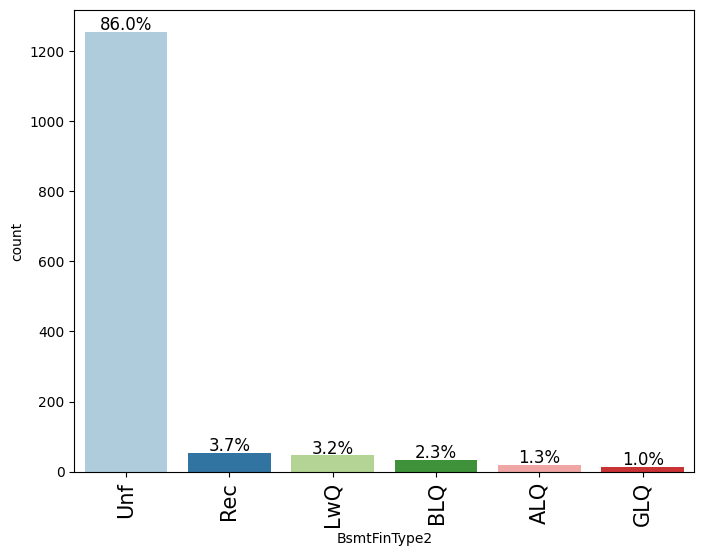

In [ ]:
labeled_barplot(df_train,'BsmtFinType2',perc=True)

* The basement second finish types are predominantly unfinished (86.0%).
* Other types include recreational rooms (Rec) at 3.7%, low-quality living quarters (LwQ) at 3.2%, below grade living quarters (BLQ) at 2.3%, average living quarters (ALQ) at 1.3%, and good living quarters (GLQ) at 1.0%.

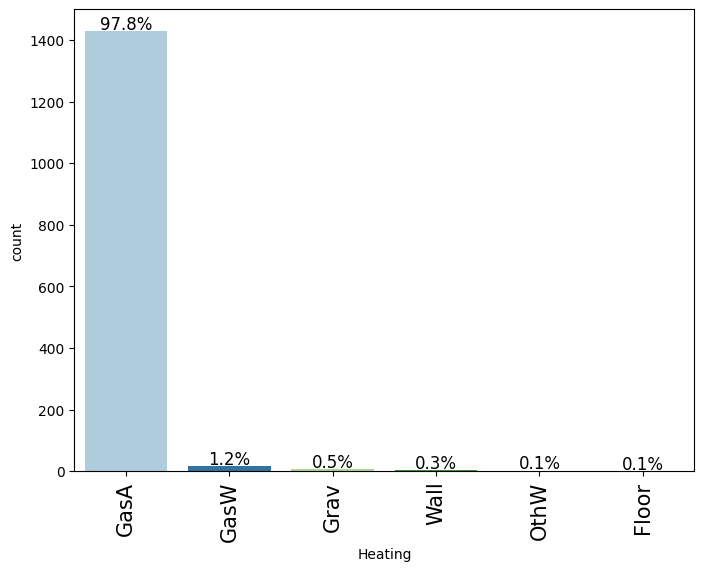

In [ ]:
labeled_barplot(df_train,'Heating',perc=True)

* The majority of homes use GasA (gas forced air heating), accounting for 97.8%.
* Other heating types include GasW (gas hot water) at 1.2%, Gravity heating at 0.5%, Wall heaters at 0.3%, OthW (other) at 0.1%, and Floor heating at 0.1%.

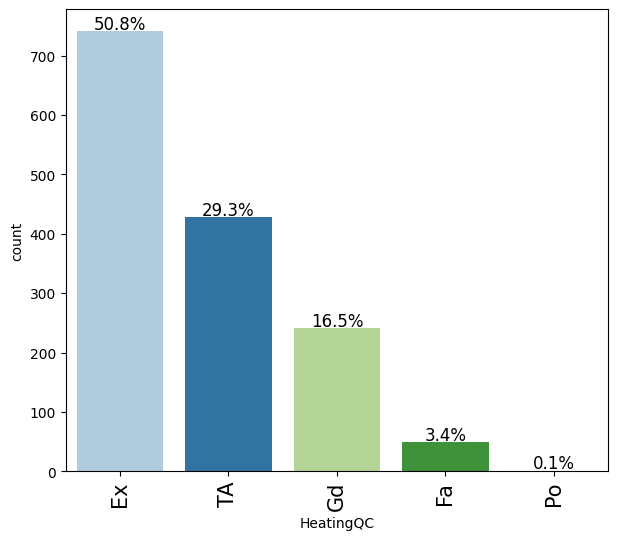

In [ ]:
labeled_barplot(df_train,'HeatingQC',perc=True)

* The majority of homes have excellent heating quality (Ex) at 50.8%, followed by typical/average heating quality (TA) at 29.3%.
* Good heating quality (Gd) at 16.5%, fair heating quality (Fa) at 3.4%, and poor heating quality (Po) at 0.1%.

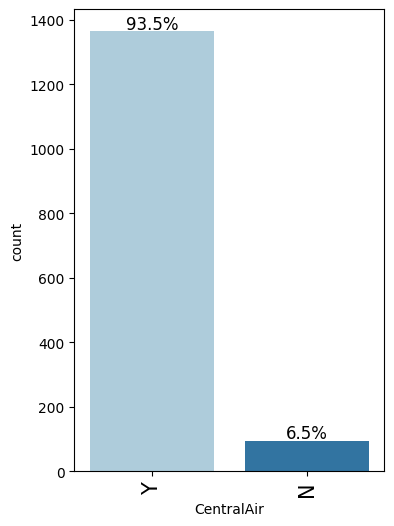

In [ ]:
labeled_barplot(df_train,'CentralAir',perc=True)

* The majority of homes (93.5%) are equipped with central air conditioning, while a smaller proportion (6.5%) do not have central air conditioning.

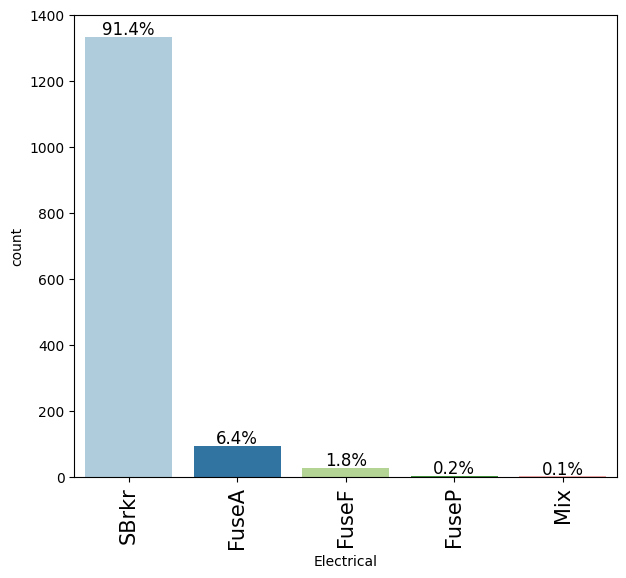

In [ ]:
labeled_barplot(df_train,'Electrical',perc=True)

* In terms of electrical systems, the vast majority of homes (91.4%) have standard circuit breakers (SBrkr).
*  followed by a smaller proportion (6.4%) with fuse boxes using FuseA type.
* Other types like FuseF (1.8%), FuseP (0.2%), and Mix (0.1%) are much less common.

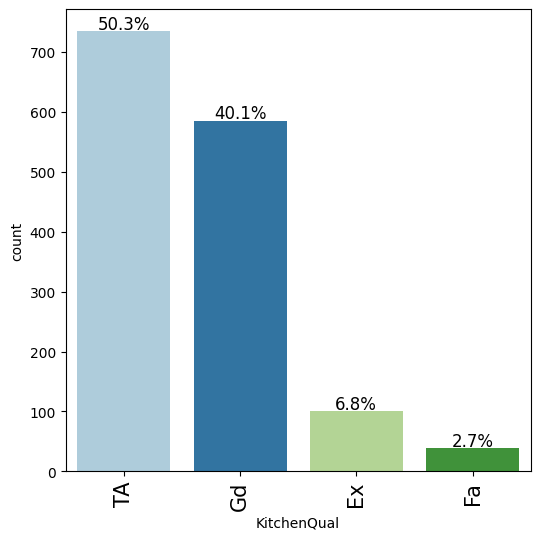

In [ ]:
labeled_barplot(df_train,'KitchenQual',perc=True)

* The quality of kitchens in the dataset shows that most homes have a typical average (TA) quality kitchen, making up 50.3% of the total.
* Good (Gd) quality kitchens are the next most common at 40.1%.
* Excellent (Ex) quality kitchens are found in 6.8% of homes, while fair (Fa) quality kitchens are the least common, present in only 2.7% of homes.

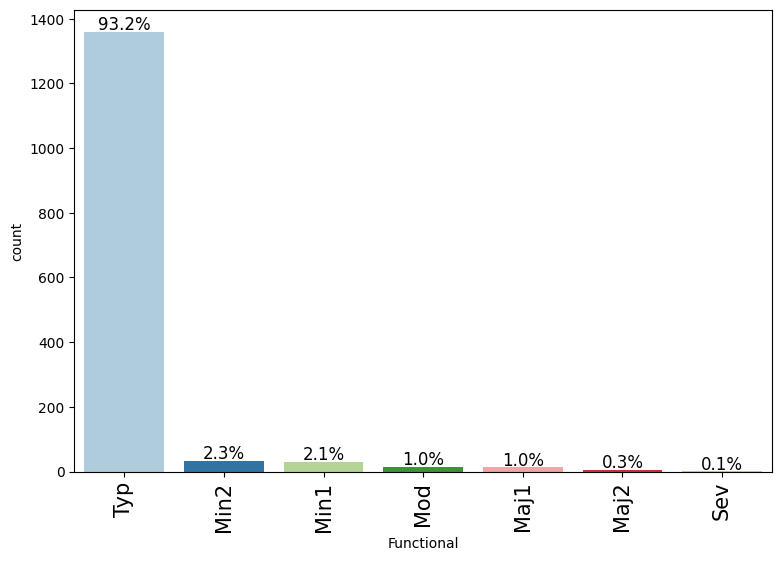

In [ ]:
labeled_barplot(df_train,'Functional',perc=True)

* 93.2%, are considered typical (Typ) with no major functional issues.
* Minor problems, categorized as Min2 and Min1, are observed in 2.3% and 2.1% of homes.
* Moderate issues (Mod) are seen in 1.0% of homes, while major issues are quite rare, with Maj1 at 1.0%, Maj2 at 0.3%, and severe issues (Sev) at only 0.1%.

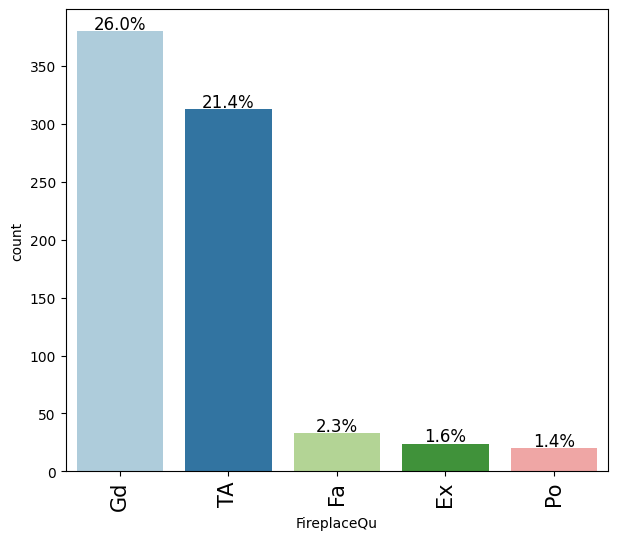

In [ ]:
labeled_barplot(df_train,'FireplaceQu',perc=True)

* The fireplace quality in the dataset shows that 26.0% of the homes have a good (Gd) rating.
* 21.4% have a typical/average (TA) rating.
* 2.3% have a fair (Fa) rating, 1.6% have an excellent (Ex) rating, and 1.4% have a poor (Po) rating.

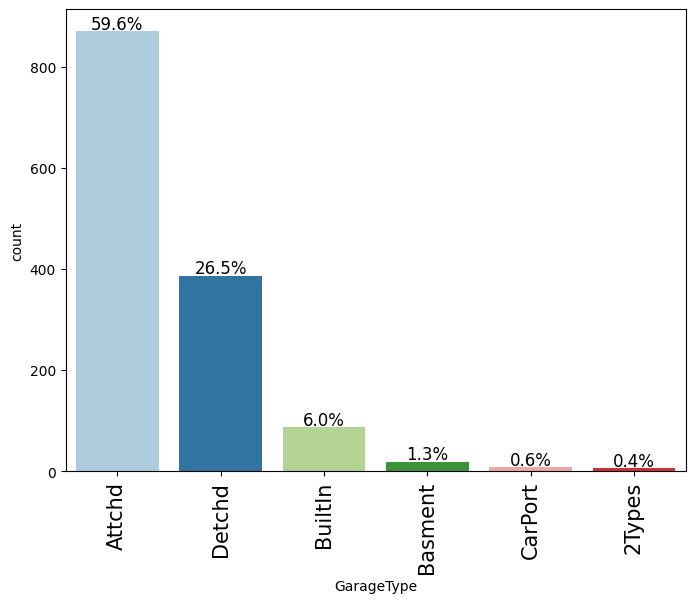

In [ ]:
labeled_barplot(df_train,'GarageType',perc=True)

* he garage type distribution in the dataset shows that 59.6% of the homes have an attached garage (Attchd).
* 26.5% have a detached garage (Detchd), 6.0% have a built-in garage (BuiltIn).
*  1.3% have a basement garage (Basement), 0.6% have a carport (CarPort), and 0.4% have two types of garages (2Types).

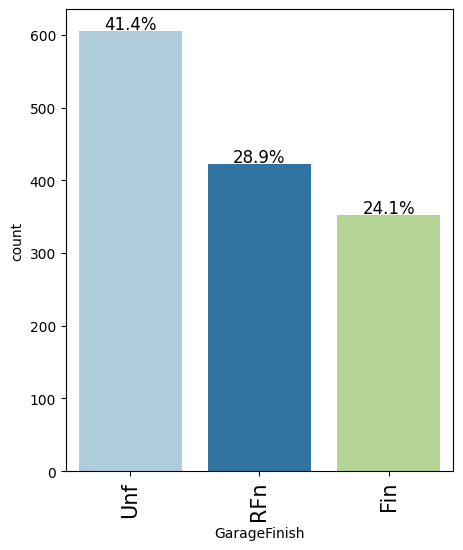

In [ ]:
labeled_barplot(df_train,'GarageFinish',perc=True)

* The garage finish distribution indicates that 41.4% of the homes have unfinished garages (Unf).
* 28.9% have garages with rudimentary finishes (RFn), and 24.1% have finished garages (Fin).


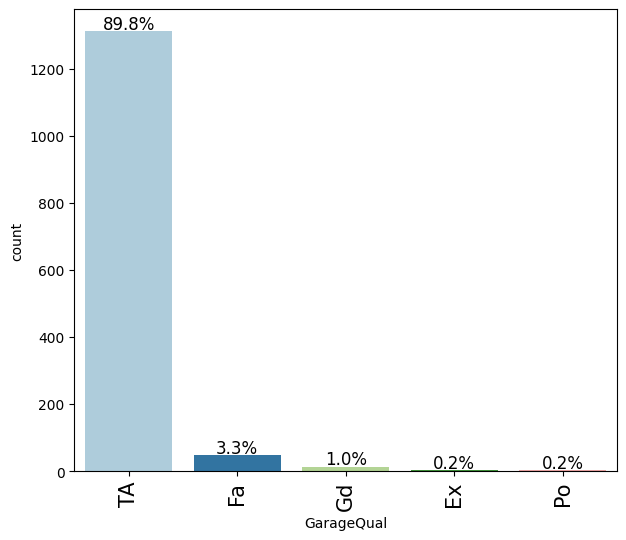

In [ ]:
labeled_barplot(df_train,'GarageQual',perc=True)

* The quality of garages in the dataset shows that 89.8% are rated as Typical/Average (TA), 3.3% as Fair (Fa), 1.0% as Good (Gd), 0.2% as Excellent (Ex), and 0.2% as Poor (Po).

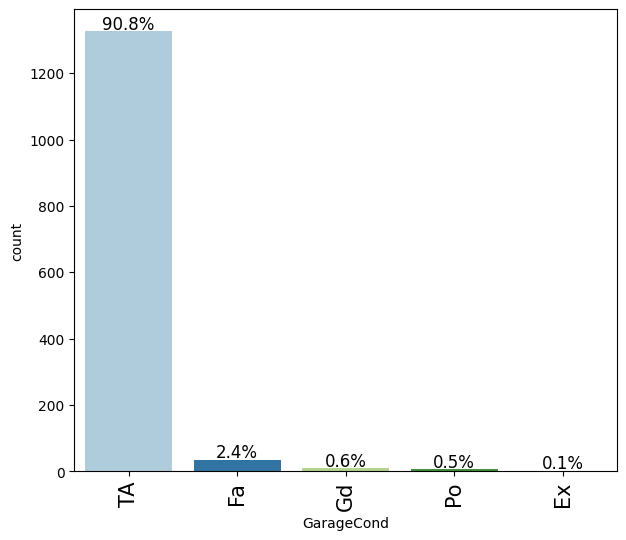

In [ ]:
labeled_barplot(df_train,'GarageCond',perc=True)

* The condition of garages in the dataset shows that 90.8% are rated as Typical/Average (TA), 2.4% as Fair (Fa), 0.6% as Good (Gd), 0.5% as Poor (Po), and 0.1% as Excellent (Ex).

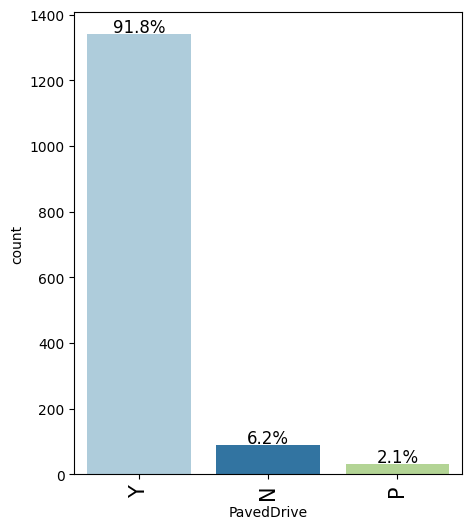

In [ ]:
labeled_barplot(df_train,'PavedDrive',perc=True)

* 91.8% of properties have a paved driveway (Y).
*  6.2% do not have a paved driveway (N), and 2.1% have a partially paved driveway (P).

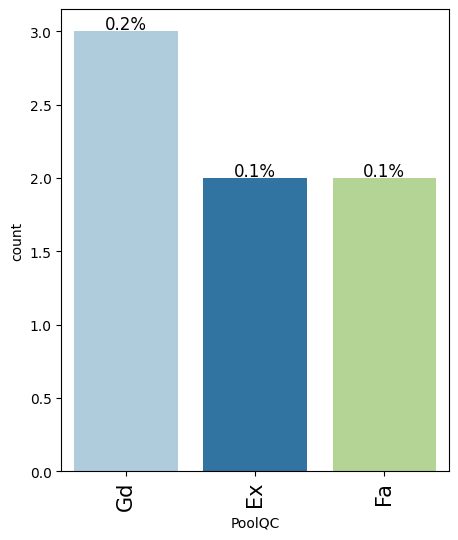

In [ ]:
labeled_barplot(df_train,'PoolQC',perc=True)

* 0.2% of properties rated as good (Gd).
*  0.1% as excellent (Ex), and another 0.1% as fair (Fa).

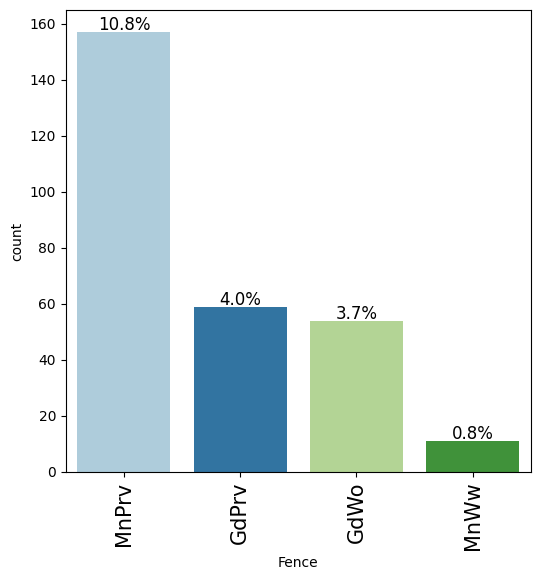

In [ ]:
labeled_barplot(df_train,'Fence',perc=True)

* The dataset indicates that 10.8% of properties have a minimum privacy fence (MnPrv).
* 4.0% have a good privacy fence (GdPrv), 3.7% have a good wood fence (GdWo), and 0.8% have a minimum wood and wire fence (MnWw).

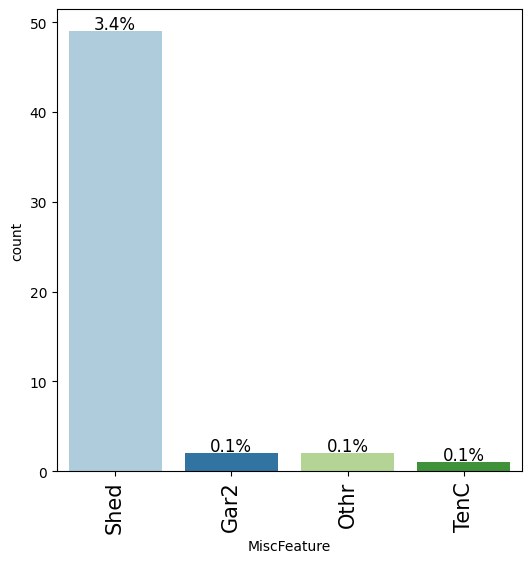

In [ ]:
labeled_barplot(df_train,'MiscFeature',perc=True)

* he dataset indicates that 3.4% of properties have a shed.
* while a small percentage (0.1% each) have a second garage (Gar2).
* another type of feature (Othr), or a tennis court (TenC).

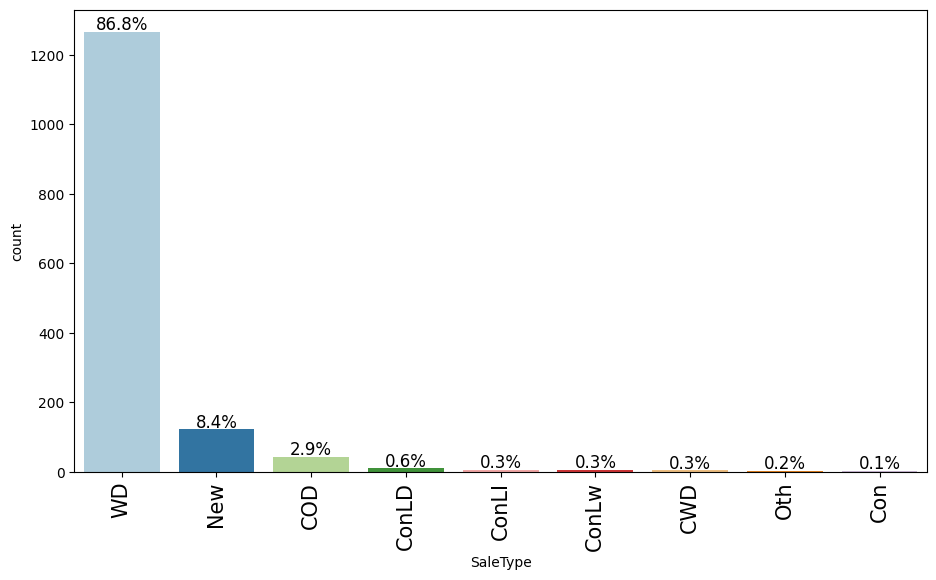

In [ ]:
labeled_barplot(df_train,'SaleType',perc=True)

* The majority of sales are of the "WD" type, making up 86.8% of the data.
*  The next most common sale types are "New" (8.4%) and "COD" (2.9%).
* other sale types such as "ConLD", "ConLI", "ConLW", "CWD", "Oth", and "Con" each representing less than 1% of the total sales.

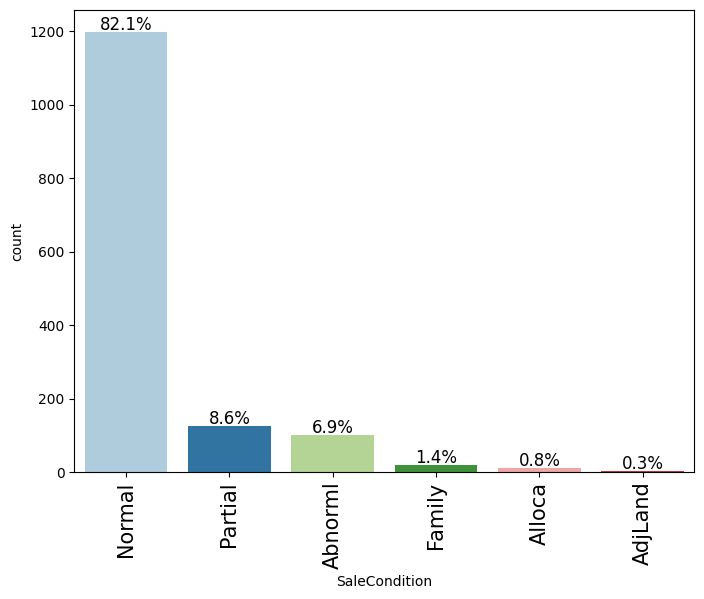

In [ ]:
labeled_barplot(df_train,'SaleCondition',perc=True)

* The SaleCondition distribution indicates that the majority of sales are classified as "Normal," comprising 82.1% of the data.
* Other sale conditions include "Partial" (8.6%), "Abnorml" (6.9%), "Family" (1.4%), "Alloca" (0.8%), and "AdjLand" (0.3%).